# Diccionario de la Data de Excel

## Del Excel "Tratatamiento de Datos"

- **INGRESO:** ID de Paciente con Digito Verificador
- **ID_INGRESO:** ID de Paciente sin Digito Verificador
- **ELEC_URG:** Dice si es Intervencion de Urgencia o Programada (ELEC, URG)
- **AMB_HOSP:** Dice si el Paciente requiere Hospitalizacion o si es Ambulatorio (HOSP, AMB)
- **DHING:** Fecha y Hora de Ingreso del Paciente
- **DHEG:** Fecha y Hora de Egreso de Paciente
- **HRSEST:** Horas entre el Ingreso y Egreso
- **HRSESTPOSTPAB:** Horas de Post Operatorio del Paciente
- **INIPAB:** Fecha y Hora de Inicio de la Cirugua
- **FINPAB:** Fecha y Hora de la Finalizacion de la Cirugia
- **DURPAB:** Duracion de la Cirugia en Horas
- **CIRUJANO:** Nombre del Cirujano a cargo del Paciente
- **STAFF:** Dice si el CIRUJANO pertenece al Staff o no (S, N)
- **ESPECIALIDAD_MEDICO:** Especialidad del Medico
- **COMUNA:** Comuna de Origen del Paciente
- **EDAD:** Edad en años del Paciente
- **ASEGURADOR:** Asegurador o Prevision del Paciente
- **IPLAN:** Plan de Isapre o Convenio del Paciente
- **CODCIRUGIA:** Codigo Interno de la Cirugia Principal a la que sometio el Paciente
- **CIRUGIA:** Nombre de la Cirugia Principal a la que se sometio el Paciente
- **ES_PQ:** Dice si la Cirugia es Paquetizada o no (PQ, AB)
- **IND_COBRO_PAQUETE:**
- **COD_PAQUETE:** Codigo Interno del Paquete de la Cirugia
- **TIPO_TECNICA:** Codigo Interno del Tipo de Tecnica Utilizado en la Cirugia
- **DESCRIPCION:** Descripcion de la Tecnica Utilizada en la Cirugia
- **COD_CIRUGIAS:** Codigos Internos de Todas las Cirugias Realizadas al Paciente en Pabellon
- **Nombre_CIRUJANO:** Nombre Completo del Cirujano a Cargo del Paciente
- **Cantidad_Cirugias:** Numero de Cirugias Hechas al Paciente en Pabellon

**Del Excel Anterior Solo se Utilizaran:**
- INGRESO
- ID_INGRESO
- ELEC_URG
- AMB_HOSP
- DURPAB
- STAFF
- ESPECIALIDAD_MEDICO
- COMUNA
- EDAD
- ASEGURADOR
- IPLAN
- CODCIRUGIA
- COD_CIRUGIAS
- Nombre_CIRUJANO
- Cantidad_Cirugias

## Del los Excel de "CONSUMOS"

En estos Excel's estan los datos de los insumos utilizados por paciente en cada cirugia desde el 2022 hasta el 2023, cada Excel tiene los datos de un trimestre, por lo tanto hay un total de 8 Archivos con Insumos por paciente.

- **ID_INGRESO:** ID de Paciente sin Digito Verificador
- **ID_LIQUIDACION:** Codigo Interno...(?)
- **DV_ID_INGRESO:** Numero Verificador del ID del Paciente
- **DESC_ITEM:** Area a la que Pertenece el Insumo
- **FECHA_CONTABLE:** Fecha y Hora en la que se registro el Insumo
- **FECHA_CONSUMO:** Fecha y Hora en la que se hizo uso del Insumo
- **ID_CONSUMO:** ID interno del Insumo
- **CODIGO_MOVIMIENTO:** Codigo Interno...(?)
- **TIPO_CONSUMO:** Categoria General en la que se dio uso el Insumo (EXA, RECETA)
- **COD_CENTRO:** Codigo Interno del Centro Medico (?)
- **COD_ISAPRE:** Codigo Interno de....(?)
- **NOMBRE_GRUPO_ABA:** Nombre de la Categoria del Insumo
- **NOMBRE_TIPO_ABA:** Nombre de la Sub Categoria del Insumo
- **COD_PRODUCTO:** Codigo Interno del Insumo (Solo para los Insumos del tipo 'RECETA')
- **COD_PRESTACION:** Codigo Interno de....(?)
- **NOMBRE:** Nombre del Insumo
- **NOMBRE_EMBALAJE:** Formato y Unidad de Medida del Insumo
- **AFECTO:** Costos sin IVA (los insumos simpre son afectos)
- **EXENTO:** 
- **IVA:** (?)
- **TOTAL:** Afecto + IVA
- **CANTIDAD:** (?)
- **COSTO:** (?)
- **RECARGO:** (?)


**De los Excel's anteriores se utilizarán solamente los siguientes atributos:**
- ID_INGRESO
- DV_ID_INGRESO
- DESC_ITEM
- ID_CONSUMO
- TIPO_CONSUMO
- NOMBRE_GRUPO_ABA
- NOMBRE_TIPO_ABA
- NOMBRE
- NOMBRE_EMBALAJE
- CANTIDAD


***Se Utilizará ID_INGRESO para el cruce de todos los archivos**

## Importar Archivos EXCEL y Diagramas

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Removes the limit for the number of displayed rows
pd.set_option("display.max_rows", None)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [3]:
#Importar Tratamiento de Datos
Trat_Dat = pd.read_excel('Tratamiento de Datos.xlsx', sheet_name= "Tabla Consolidada Filtrada")

#Extraer Solo las Columnas deseadas:
columnas_deseadas = ["INGRESO", "ID_INGRESO", "ELEC_URG", "AMB_HOSP", "DURPAB", "STAFF", "ESPECIALIDAD_MEDICO", "COMUNA", "EDAD", "ASEGURADOR", "IPLAN", "CODCIRUGIA", "COD_CIRUGIAS", "Nombre_CIRUJANO", "Cantidad_Cirugias"]

# Seleccionar solo las columnas deseadas de Trat_Dat
Trat_Dat_Final = Trat_Dat.loc[:, columnas_deseadas]


In [5]:
# Guarda el DataFrame Trat_Dat_Final como un archivo CSV

Trat_Datcsv = "Trat_Dat.csv"

Trat_Dat_Final.to_csv(Trat_Datcsv, index=False)

In [15]:
# Sacando los datos de "Trat_Dat_Final" para definir el top 10 de 'COD_CIRUGIA' y su correspondiente promedio, min, max y devest de "DURPAB"
#Se utilizará 'CODCIRUGIA' debido a que esta es la cirugia principal y no incluye las cirugias secundarias a diferencia de 'COD_CIRUGIAS'


# Top 10 'CODCIRUGIA' más frecuentes
top_10_cirugias = Trat_Dat_Final['CODCIRUGIA'].value_counts().head(10).sort_values(ascending=False)

# Filtro del DataFrame original para obtener solo las filas del top 10 cirugías más frecuentes
datos_top_10 = Trat_Dat_Final[Trat_Dat_Final['CODCIRUGIA'].isin(top_10_cirugias.index.tolist())]

# Promedio, mínimo, máximo, la desviación estándar y la frecuencia de 'DURPAB' para estas top 10 cirugías
top_10_stats = datos_top_10.groupby('CODCIRUGIA')['DURPAB'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index().sort_values(by='count', ascending=False)

# Cambiando el nombre de las columnas con sus respectivos estadisticos
top_10_stats.columns = ['CODCIRUGIA', 'Promedio_DURPAB', 'Min_DURPAB', 'Max_DURPAB', 'Desviacion_Estandar_DURPAB', 'Frecuencia']

# Guardado de resultados en un DataFrame 'Top_10_Cirugias'
Top_10_Cirugias = top_10_stats.copy()

#print(Top_10_Cirugias)

#Para una tabla bonita:

from tabulate import tabulate

print(tabulate(top_10_stats, headers='keys', tablefmt='pretty', showindex=False))

+--------------+--------------------+------------+------------+----------------------------+------------+
|  CODCIRUGIA  |  Promedio_DURPAB   | Min_DURPAB | Max_DURPAB | Desviacion_Estandar_DURPAB | Frecuencia |
+--------------+--------------------+------------+------------+----------------------------+------------+
| 18-02-081-00 | 63.186794092093834 |     0      |    480     |     34.19983622731848      |    4604    |
| 18-02-001-00 | 78.52120859965136  |     0      |    675     |     43.03390711083682      |    3442    |
| 19-02-076-00 | 32.965415019762844 |     0      |    322     |     19.030942089718945     |    2024    |
| 17-03-027-00 | 74.75260896255371  |     0      |    640     |     38.55400263012109      |    1629    |
| 21-04-159-00 | 66.74397394136808  |     0      |    418     |     37.060808252349844     |    1535    |
| 13-02-029-00 | 43.56818181818182  |     0      |    244     |     25.557477297045445     |    1496    |
| 19-02-082-00 | 54.50915492957746  |     0   

In [115]:
# Filtrar el DataFrame original para obtener solo las filas donde 'Cantidad_Cirugias' es igual a 1
filtro_cantidad_cirugias = Trat_Dat_Final[Trat_Dat_Final['Cantidad_Cirugias'] == 1]

# Top 10 'CODCIRUGIA' más frecuentes entre las cirugías filtradas
top_10_cirugias = filtro_cantidad_cirugias['CODCIRUGIA'].value_counts().head(10).sort_values(ascending=False)

# Filtro del DataFrame original filtrado para obtener solo las filas del top 10 cirugías más frecuentes
datos_top_10 = filtro_cantidad_cirugias[filtro_cantidad_cirugias['CODCIRUGIA'].isin(top_10_cirugias.index.tolist())]

# Promedio, mínimo, máximo, la desviación estándar y la frecuencia de 'DURPAB' para estas top 10 cirugías
top_10_stats = datos_top_10.groupby('CODCIRUGIA')['DURPAB'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index().sort_values(by='count', ascending=False)

# Cambiando el nombre de las columnas con sus respectivos estadísticos
top_10_stats.columns = ['CODCIRUGIA', 'Promedio_DURPAB', 'Min_DURPAB', 'Max_DURPAB', 'Desviacion_Estandar_DURPAB', 'Frecuencia']

# Guardado de resultados en un DataFrame 'Top_10_Cirugias'
Top_10_Cirugias = top_10_stats.copy()

# Para una tabla bonita:

from tabulate import tabulate

print(tabulate(top_10_stats, headers='keys', tablefmt='pretty', showindex=False))


+--------------+--------------------+------------+------------+----------------------------+------------+
|  CODCIRUGIA  |  Promedio_DURPAB   | Min_DURPAB | Max_DURPAB | Desviacion_Estandar_DURPAB | Frecuencia |
+--------------+--------------------+------------+------------+----------------------------+------------+
| 18-02-081-00 | 58.90658959537572  |     0      |    360     |     25.29506841598595      |    4325    |
| 18-02-001-00 | 62.05174963035979  |     0      |    675     |      33.4546085241385      |    2029    |
| 19-02-076-00 | 31.184517497348885 |     0      |    151     |     15.633158460594924     |    1886    |
| 20-04-006-00 | 47.298850574712645 |     7      |    750     |     34.14029580105948      |    1392    |
| 13-02-029-00 | 39.09006928406467  |     0      |    242     |     19.080852661368997     |    1299    |
| 19-02-082-00 |      51.5888       |     0      |    230     |     22.560844574756988     |    1250    |
| 21-04-159-00 | 52.73723404255319  |     0   

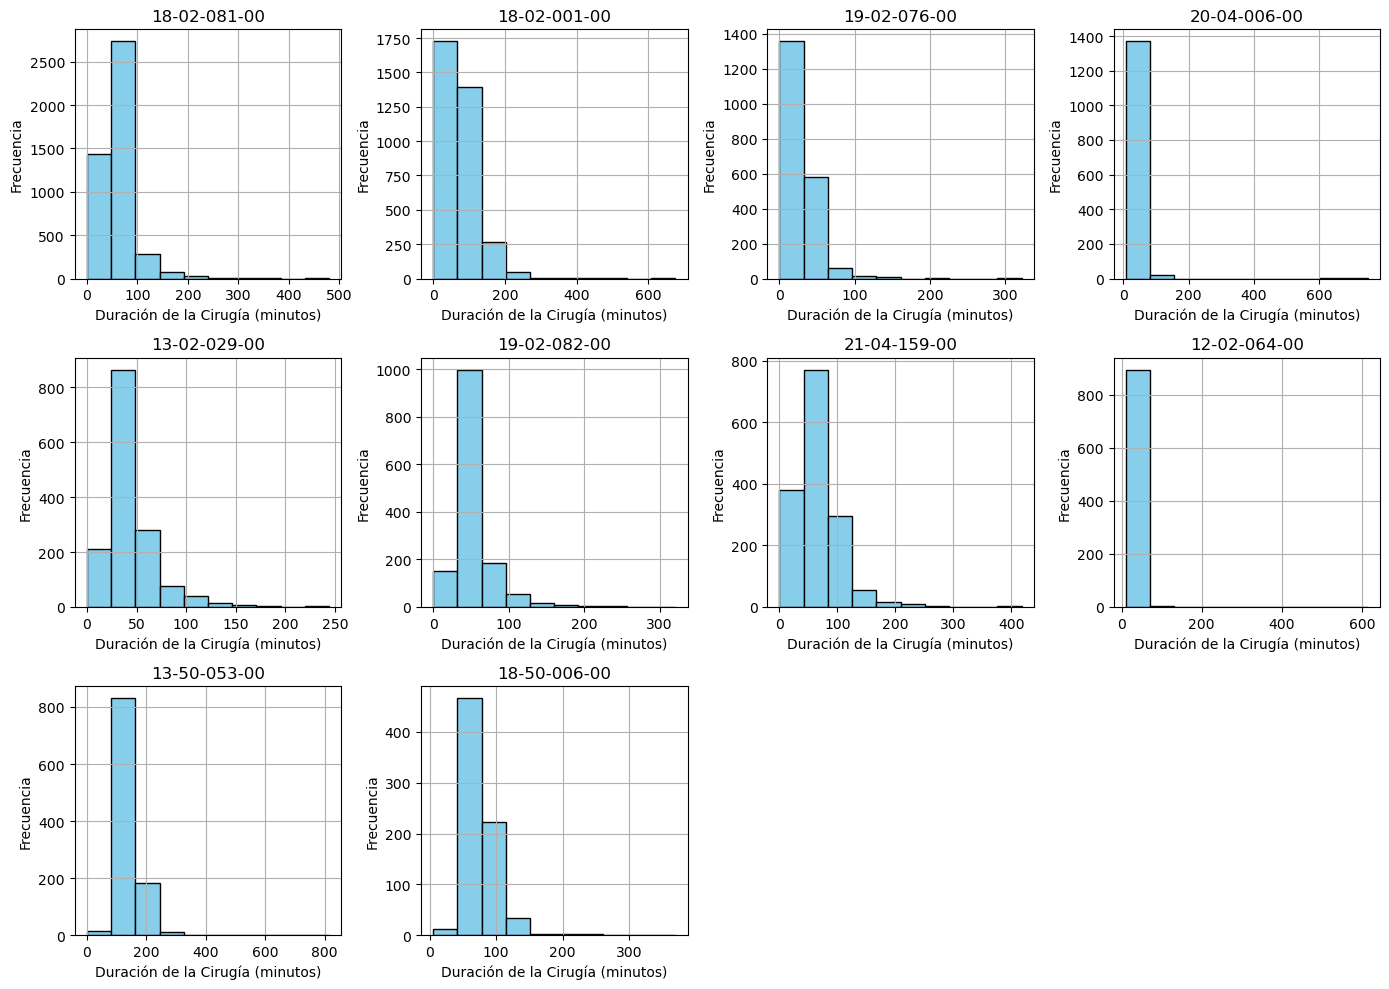

In [117]:
#Histograma top10 cirugias:
top_10_cirugias = top_10_stats['CODCIRUGIA']

#cirugías top10:
cirugias_mas_frecuentes = Trat_Dat_Final[Trat_Dat_Final['CODCIRUGIA'].isin(top_10_cirugias)]

# Crear histogramas para cada cirugía más frecuente en el top 10:
plt.figure(figsize=(14, 10))
for i, cirugia in enumerate(top_10_cirugias):
    plt.subplot(3, 4, i + 1)
    datos_cirugia = cirugias_mas_frecuentes[cirugias_mas_frecuentes['CODCIRUGIA'] == cirugia]
    plt.hist(datos_cirugia['DURPAB'], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel('Duración de la Cirugía (minutos)')
    plt.ylabel('Frecuencia')
    plt.title(f'{cirugia}')
    plt.grid(True)

plt.tight_layout()
plt.show()

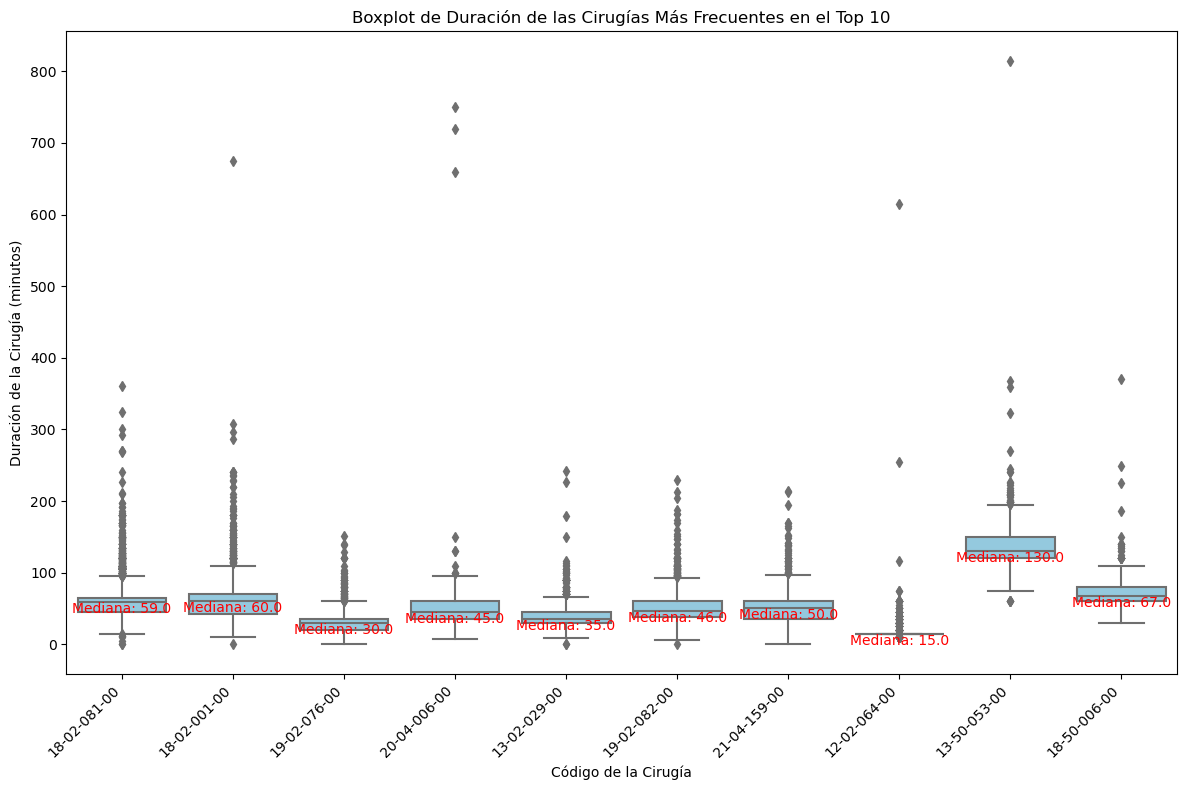

In [139]:
# Boxplot 10 cirugías más frecuentes:

# Filtrar el DataFrame original para obtener solo las filas donde 'Cantidad_Cirugias' es igual a 1
filtro_cantidad_cirugias = Trat_Dat_Final[Trat_Dat_Final['Cantidad_Cirugias'] == 1]

# frecuencia por categoría:
frecuencia_cirugias = filtro_cantidad_cirugias['CODCIRUGIA'].value_counts()

# Ordenar las categorías:
top_10_cirugias = frecuencia_cirugias.index[:10]

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x='CODCIRUGIA', y='DURPAB', data=filtro_cantidad_cirugias,
            color='skyblue', order=top_10_cirugias)

# Añadir etiqueta de la mediana
for i, cod_cirugia in enumerate(top_10_cirugias):
    median = filtro_cantidad_cirugias.loc[filtro_cantidad_cirugias['CODCIRUGIA'] == cod_cirugia, 'DURPAB'].median()
    plt.text(i, median, f'Mediana: {median}', ha='center', va='top', color='red', fontsize=10)

plt.xlabel('Código de la Cirugía')
plt.ylabel('Duración de la Cirugía (minutos)')
plt.title('Boxplot de Duración de las Cirugías Más Frecuentes en el Top 10')

# Rotar etiquetas del eje x (Codigos Cirugias):
plt.xticks(rotation=45, ha='right')

# Mostrar el boxplot
plt.tight_layout()
plt.show()


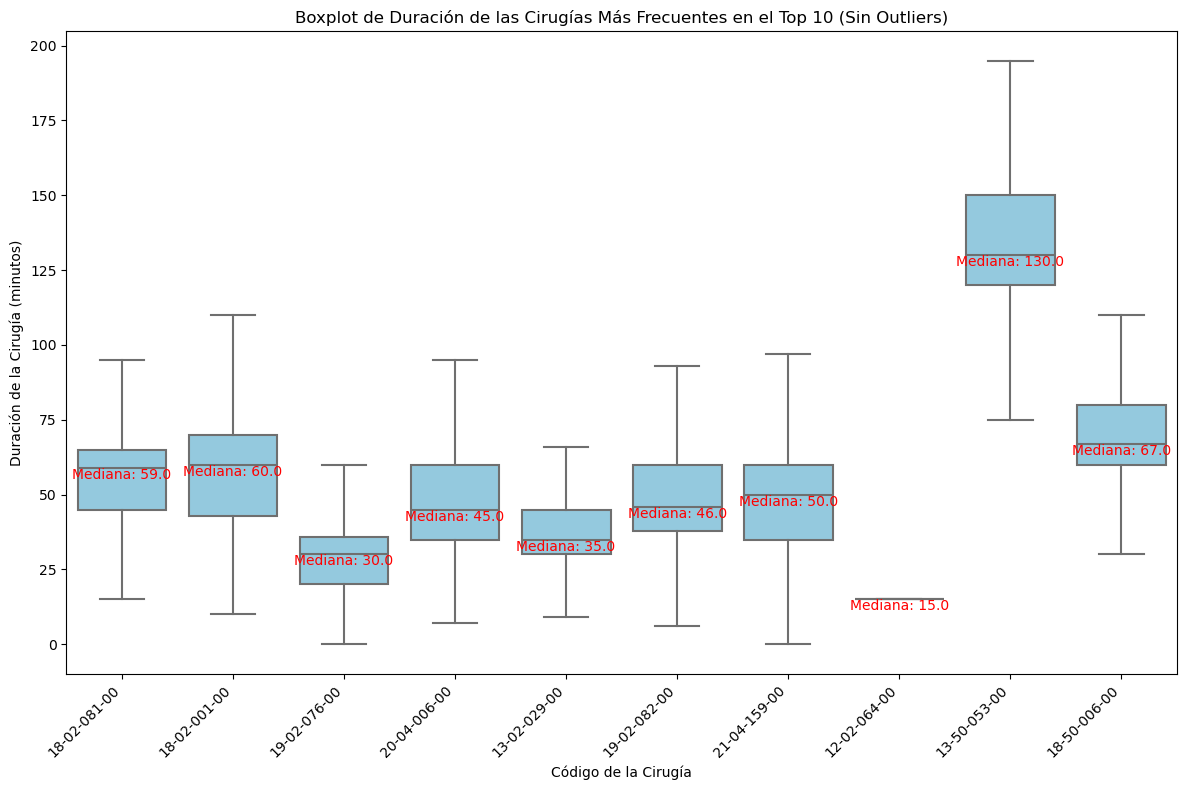

In [141]:
# Filtrar el DataFrame original para obtener solo las filas donde 'Cantidad_Cirugias' es igual a 1
filtro_cantidad_cirugias = Trat_Dat_Final[Trat_Dat_Final['Cantidad_Cirugias'] == 1]

# frecuencia por categoría:
frecuencia_cirugias = filtro_cantidad_cirugias['CODCIRUGIA'].value_counts()

# Ordenar las categorías:
top_10_cirugias = frecuencia_cirugias.index[:10]

# boxplot sin outliers:
plt.figure(figsize=(12, 8))
sns.boxplot(x='CODCIRUGIA', y='DURPAB', data=filtro_cantidad_cirugias,
            color='skyblue', order=top_10_cirugias, showfliers=False)

# Añadir etiqueta de la mediana
for i, cod_cirugia in enumerate(top_10_cirugias):
    median = filtro_cantidad_cirugias.loc[filtro_cantidad_cirugias['CODCIRUGIA'] == cod_cirugia, 'DURPAB'].median()
    plt.text(i, median, f'Mediana: {median}', ha='center', va='top', color='red', fontsize=10)

plt.xlabel('Código de la Cirugía')
plt.ylabel('Duración de la Cirugía (minutos)')
plt.title('Boxplot de Duración de las Cirugías Más Frecuentes en el Top 10 (Sin Outliers)')

# Rotar etiquetas del eje x (Codigos Cirugias):
plt.xticks(rotation=45, ha='right')

# Mostrar el boxplot
plt.tight_layout()
plt.show()


In [129]:
#Insumos Colecistectomia (18-02-081-00):

# Tabla Dinamica:

#!pip install pivottablejs
from pivottablejs import pivot_ui

#cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Filtrar solo coles "18-02-081-00"
Colecistectomia = cruce_final[cruce_final['CODCIRUGIA'] == '18-02-081-00']

# Crear tabla dinámica con filtros interactivos
pivot_ui(Colecistectomia, 
         rows=['ID_INGRESO'], 
         cols=['NOMBRE'], 
         aggregatorName='Count', 
         rendererName='Table', 
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',
#         filter=['TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']
         outfile_path='tabla_dinamica_colecistectomia.html'
        )


In [125]:
numero_valores_unicos = Colecistectomia['INGRESO'].nunique()
print(f"El número total de valores únicos en la columna 'INGRESO' es: {numero_valores_unicos}")


El número total de valores únicos en la columna 'INGRESO' es: 979


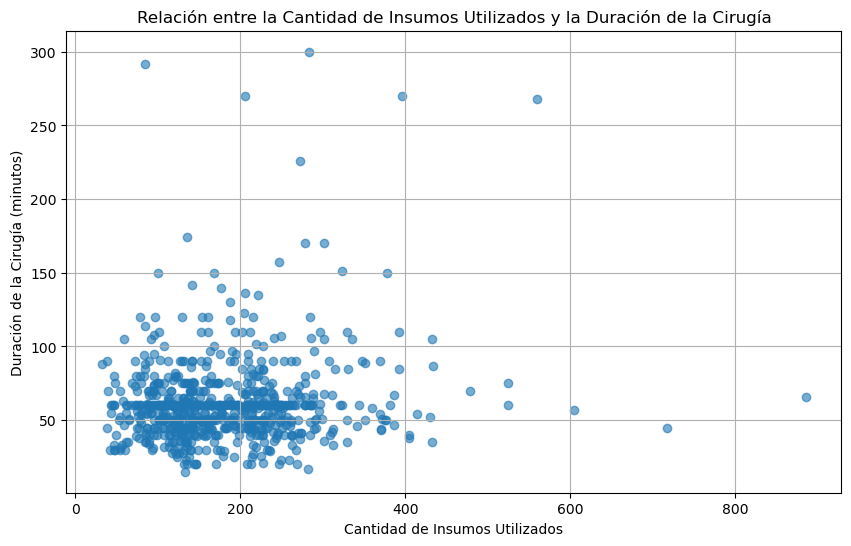

In [101]:
#Grafico dispersion DURPAB vs INSUMOS por paciente:

#colecistectomia = cruce_final[cruce_final['CODCIRUGIA'] == '18-02-081-00']
colecistectomia = cruce_final[(cruce_final['COD_CIRUGIAS'] == '18-02-081-00|-1|-1|-1') & 
                              (cruce_final['CODCIRUGIA'] == '18-02-081-00')]
# Eliminar las filas donde NOMBRE_GRUPO_ABA es ' '
colecistectomia = colecistectomia[colecistectomia['NOMBRE_GRUPO_ABA'] != ' ']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = colecistectomia.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') por 'ID_INGRESO'
durpab_pacientes = colecistectomia[['ID_INGRESO', 'DURPAB']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos_combined['Cantidad_Insumos'], datos_combined['DURPAB'], alpha=0.6)
plt.xlabel('Cantidad de Insumos Utilizados')
plt.ylabel('Duración de la Cirugía (minutos)')
plt.title('Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía')
plt.grid(True)
plt.show()

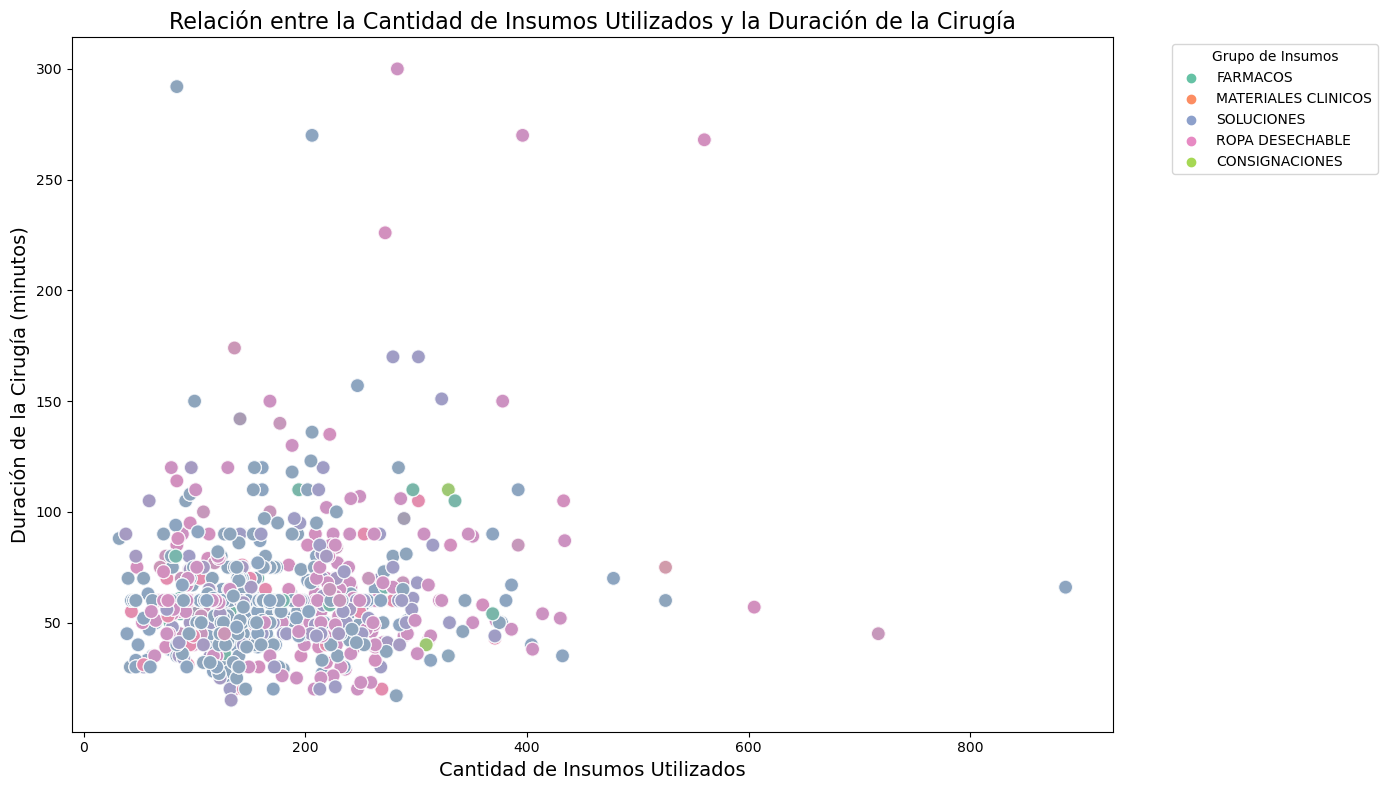

In [79]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# Filtrar los datos de colecistectomia específicos
#colecistectomia = cruce_final[cruce_final['CODCIRUGIA'] == '18-02-081-00']
#colecistectomia = cruce_final[cruce_final['COD_CIRUGIAS'] == '18-02-081-00|-1|-1|-1']
colecistectomia = cruce_final[(cruce_final['COD_CIRUGIAS'] == '18-02-081-00|-1|-1|-1') & 
                              (cruce_final['CODCIRUGIA'] == '18-02-081-00')]

# Eliminar las filas donde NOMBRE_GRUPO_ABA es ' '
colecistectomia = colecistectomia[colecistectomia['NOMBRE_GRUPO_ABA'] != ' ']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = colecistectomia.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') y el grupo de insumos ('NOMBRE_GRUPO_ABA') por 'ID_INGRESO'
durpab_pacientes = colecistectomia[['ID_INGRESO', 'DURPAB', 'NOMBRE_GRUPO_ABA']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión con colores según 'NOMBRE_GRUPO_ABA'
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Cantidad_Insumos', y='DURPAB', hue='NOMBRE_GRUPO_ABA', data=datos_combined, palette='Set2', s=100, alpha=0.7, edgecolor='w')

# Configurar el título y etiquetas del gráfico
plt.title('Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía', fontsize=16)
plt.xlabel('Cantidad de Insumos Utilizados', fontsize=14)
plt.ylabel('Duración de la Cirugía (minutos)', fontsize=14)

# Ajustar leyenda
plt.legend(title='Grupo de Insumos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()




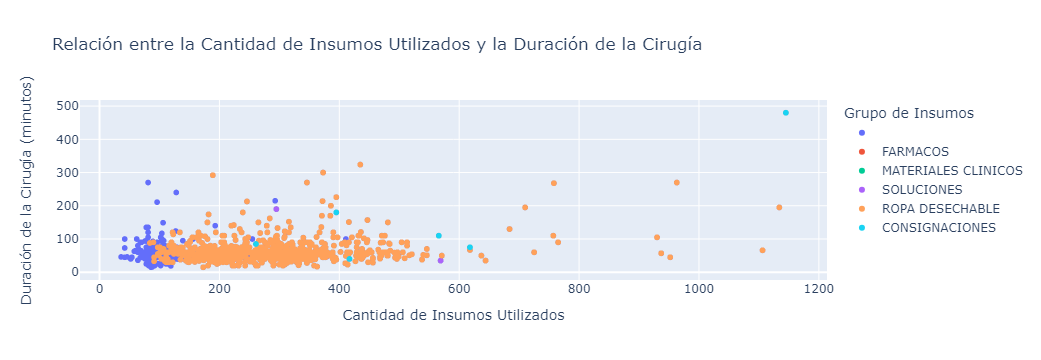

In [73]:
#Para el mismo grafico pero didactico:

import plotly.express as px
import pandas as pd

# Filtrar los datos de colecistectomia específicos
colecistectomia = cruce_final[cruce_final['COD_CIRUGIAS'] == '18-02-081-00|-1|-1|-1']
colecistectomia = cruce_final[cruce_final['CODCIRUGIA'] == '18-02-081-00']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = colecistectomia.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') y el grupo de insumos ('NOMBRE_GRUPO_ABA') por 'ID_INGRESO'
durpab_pacientes = colecistectomia[['ID_INGRESO', 'DURPAB', 'NOMBRE_GRUPO_ABA']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión interactivo con Plotly
fig = px.scatter(datos_combined, 
                 x='Cantidad_Insumos', 
                 y='DURPAB', 
                 color='NOMBRE_GRUPO_ABA', 
                 title='Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía',
                 labels={
                     'Cantidad_Insumos': 'Cantidad de Insumos Utilizados',
                     'DURPAB': 'Duración de la Cirugía (minutos)',
                     'NOMBRE_GRUPO_ABA': 'Grupo de Insumos'
                 },
                 hover_data=['ID_INGRESO'])

# Mostrar el gráfico
fig.show()


In [107]:
#Promedio de uso de insumos en Cole por medico:

# Filtrar los datos de colecistectomia específicos
colecistectomia = cruce_final[cruce_final['CODCIRUGIA'] == '18-02-081-00']

# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
cantidad_insumos = colecistectomia.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','COD_CIRUGIAS']).size().reset_index(name='Cantidad_Insumos')

# Calcular el promedio de insumos por cirujano, insumo, grupo y tipo de insumo
promedios = cantidad_insumos.groupby(['Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','COD_CIRUGIAS'])['Cantidad_Insumos'].mean().reset_index()

# Crear la tabla dinámica usando pivottablejs
pivot_ui(promedios, 
         rows=['Nombre_CIRUJANO'], 
         cols=['NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA'], 
         vals=['Cantidad_Insumos'], 
         aggregatorName='Average', 
         rendererName='Table',
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',  outfile_path='Promedio_Insumos_colecistectomia.html')



In [77]:
#Insumos HERNIA DIAFRAGMATICA (18-02-001-00):

# Tabla Dinamica:

#!pip install pivottablejs
from pivottablejs import pivot_ui

#cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Filtrar solo coles "18-02-001-00"
Hernia_Dia = cruce_final[cruce_final['CODCIRUGIA'] == '18-02-001-00']

# Crear tabla dinámica con filtros interactivos
pivot_ui(Hernia_Dia, 
         rows=['ID_INGRESO'], 
         cols=['NOMBRE'], 
         aggregatorName='Count', 
         rendererName='Table', 
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',
#         filter=['TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']
         outfile_path='tabla_dinamica_Hernia_Diafragmatica.html'
        )


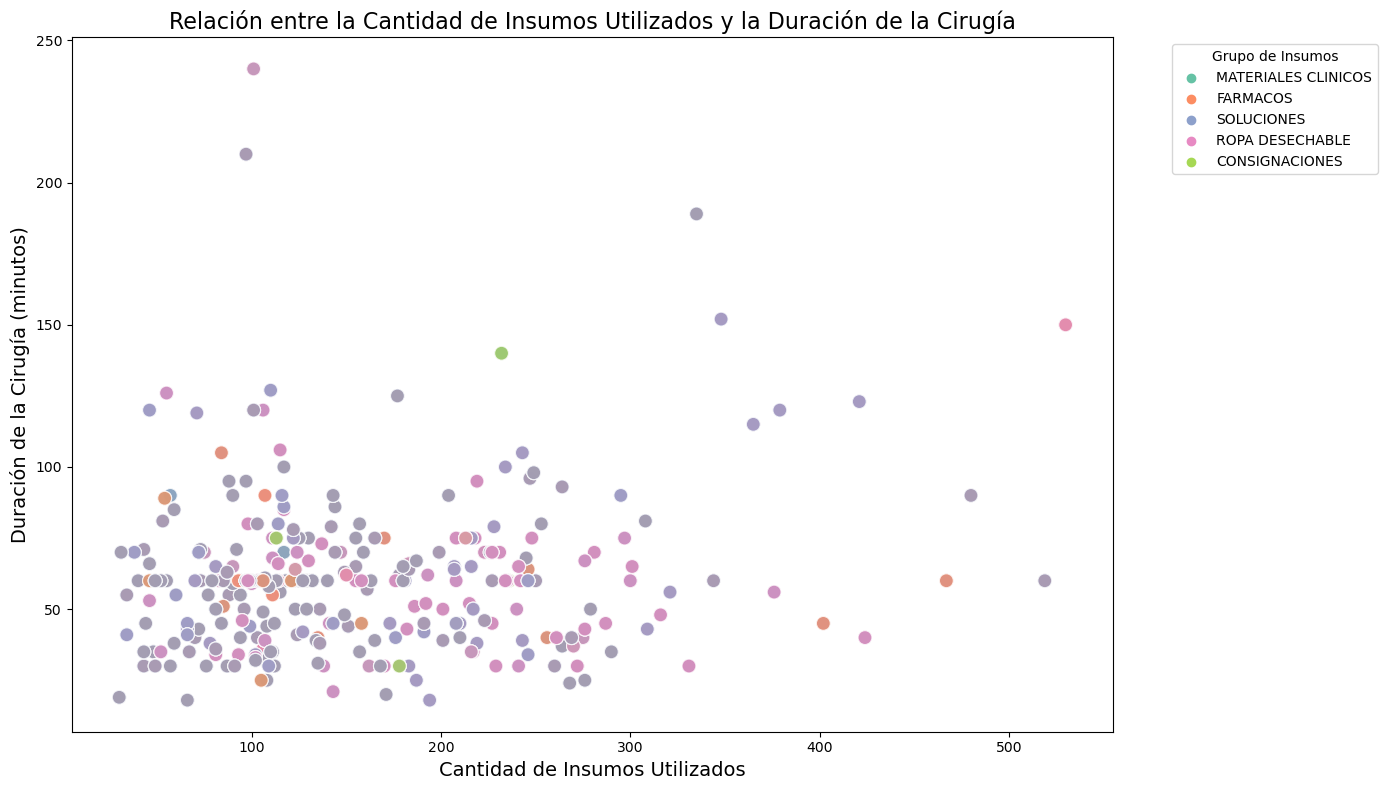

In [81]:
# Filtrar los datos de Hernia_Dia específicos
#Hernia_Dia = cruce_final[cruce_final['CODCIRUGIA'] == '18-02-001-00']
#Hernia_Dia = cruce_final[cruce_final['COD_CIRUGIAS'] == '18-02-001-00|-1|-1|-1']
Hernia_Dia = cruce_final[(cruce_final['COD_CIRUGIAS'] == '18-02-001-00|-1|-1|-1') & 
                              (cruce_final['CODCIRUGIA'] == '18-02-001-00')]
# Eliminar las filas donde NOMBRE_GRUPO_ABA es ' '
Hernia_Dia = Hernia_Dia[Hernia_Dia['NOMBRE_GRUPO_ABA'] != ' ']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = Hernia_Dia.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') y el grupo de insumos ('NOMBRE_GRUPO_ABA') por 'ID_INGRESO'
durpab_pacientes = Hernia_Dia[['ID_INGRESO', 'DURPAB', 'NOMBRE_GRUPO_ABA']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión con colores según 'NOMBRE_GRUPO_ABA'
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Cantidad_Insumos', y='DURPAB', hue='NOMBRE_GRUPO_ABA', data=datos_combined, palette='Set2', s=100, alpha=0.7, edgecolor='w')

# Configurar el título y etiquetas del gráfico
plt.title('Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía', fontsize=16)
plt.xlabel('Cantidad de Insumos Utilizados', fontsize=14)
plt.ylabel('Duración de la Cirugía (minutos)', fontsize=14)

# Ajustar leyenda
plt.legend(title='Grupo de Insumos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [105]:
#Promedio de uso de insumos en Hernia por medico:

# Filtrar los datos de Hernia_Dia específicos
Hernia_Dia = cruce_final[cruce_final['CODCIRUGIA'] == '18-02-001-00']

# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
cantidad_insumos = Hernia_Dia.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','COD_CIRUGIAS']).size().reset_index(name='Cantidad_Insumos')

# Calcular el promedio de insumos por cirujano, insumo, grupo y tipo de insumo
promedios = cantidad_insumos.groupby(['Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','COD_CIRUGIAS'])['Cantidad_Insumos'].mean().reset_index()

# Crear la tabla dinámica usando pivottablejs
pivot_ui(promedios, 
         rows=['Nombre_CIRUJANO'], 
         cols=['NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA'], 
         vals=['Cantidad_Insumos'], 
         aggregatorName='Average', 
         rendererName='Table',
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',  outfile_path='Promedio_Insumos_Hernia_Diafragmatica.html')

In [89]:
#Insumos VASECTOMIA (19-02-076-00):

# Tabla Dinamica:

#!pip install pivottablejs
from pivottablejs import pivot_ui

#cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Filtrar solo coles "19-02-076-00"
Vasectomia = cruce_final[cruce_final['CODCIRUGIA'] == '19-02-076-00']

# Crear tabla dinámica con filtros interactivos
pivot_ui(Vasectomia, 
         rows=['ID_INGRESO'], 
         cols=['NOMBRE'], 
         aggregatorName='Count', 
         rendererName='Table', 
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',
#         filter=['TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']
         outfile_path='tabla_dinamica_Vasectomia.html'
        )

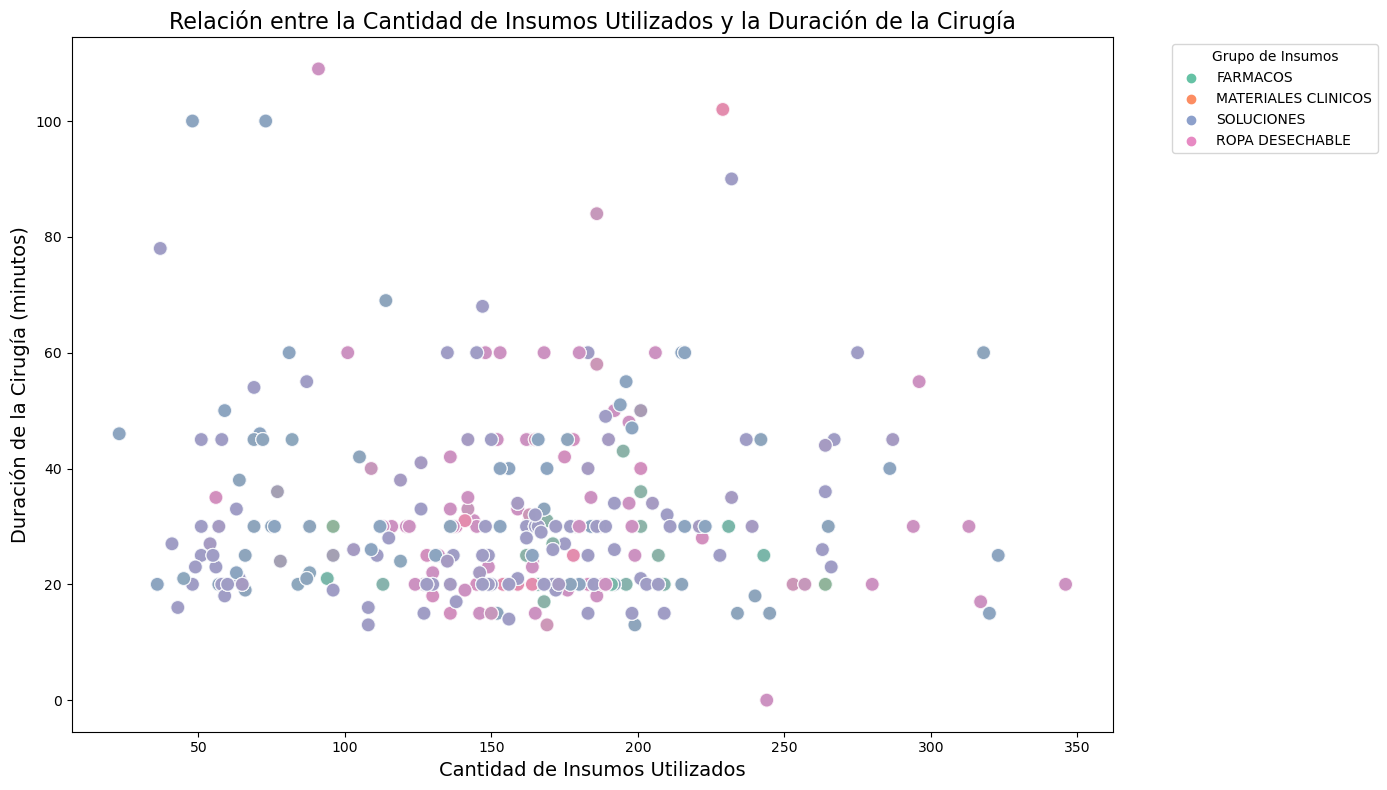

In [83]:
# Filtrar los datos de VASECTOMIA específicos
#Vasectomia = cruce_final[cruce_final['CODCIRUGIA'] == '19-02-076-00']
#Vasectomia = cruce_final[cruce_final['COD_CIRUGIAS'] == '19-02-076-00|-1|-1|-1']
Vasectomia = cruce_final[(cruce_final['COD_CIRUGIAS'] == '19-02-076-00|-1|-1|-1') & 
                              (cruce_final['CODCIRUGIA'] == '19-02-076-00')]
# Eliminar las filas donde NOMBRE_GRUPO_ABA es ' '
Vasectomia = Vasectomia[Vasectomia['NOMBRE_GRUPO_ABA'] != ' ']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = Vasectomia.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') y el grupo de insumos ('NOMBRE_GRUPO_ABA') por 'ID_INGRESO'
durpab_pacientes = Vasectomia[['ID_INGRESO', 'DURPAB', 'NOMBRE_GRUPO_ABA']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión con colores según 'NOMBRE_GRUPO_ABA'
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Cantidad_Insumos', y='DURPAB', hue='NOMBRE_GRUPO_ABA', data=datos_combined, palette='Set2', s=100, alpha=0.7, edgecolor='w')

# Configurar el título y etiquetas del gráfico
plt.title('Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía', fontsize=16)
plt.xlabel('Cantidad de Insumos Utilizados', fontsize=14)
plt.ylabel('Duración de la Cirugía (minutos)', fontsize=14)

# Ajustar leyenda
plt.legend(title='Grupo de Insumos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [103]:
#Promedio de uso de insumos en VASECTOMIA por medico:

# Filtrar los datos de VASECTOMIA específicos
Vasectomia = cruce_final[cruce_final['CODCIRUGIA'] == '19-02-076-00']

# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
cantidad_insumos = Vasectomia.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','COD_CIRUGIAS']).size().reset_index(name='Cantidad_Insumos')

# Calcular el promedio de insumos por cirujano, insumo, grupo y tipo de insumo
promedios = cantidad_insumos.groupby(['Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','COD_CIRUGIAS'])['Cantidad_Insumos'].mean().reset_index()

# Crear la tabla dinámica usando pivottablejs
pivot_ui(promedios, 
         rows=['Nombre_CIRUJANO'], 
         cols=['NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA'], 
         vals=['Cantidad_Insumos'], 
         aggregatorName='Average', 
         rendererName='Table',
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',  outfile_path='Promedio_Insumos_Vasectomia.html')

In [131]:
#Insumos CESAREA (20-04-006-00):

# Tabla Dinamica:

#!pip install pivottablejs
from pivottablejs import pivot_ui

#cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Filtrar solo Cesarea "20-04-006-00"
Cesarea = cruce_final[cruce_final['CODCIRUGIA'] == '20-04-006-00']

# Crear tabla dinámica con filtros interactivos
pivot_ui(Cesarea, 
         rows=['ID_INGRESO'], 
         cols=['NOMBRE'], 
         aggregatorName='Count', 
         rendererName='Table', 
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',
#         filter=['TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']
         outfile_path='tabla_dinamica_Cesarea.html'
        )

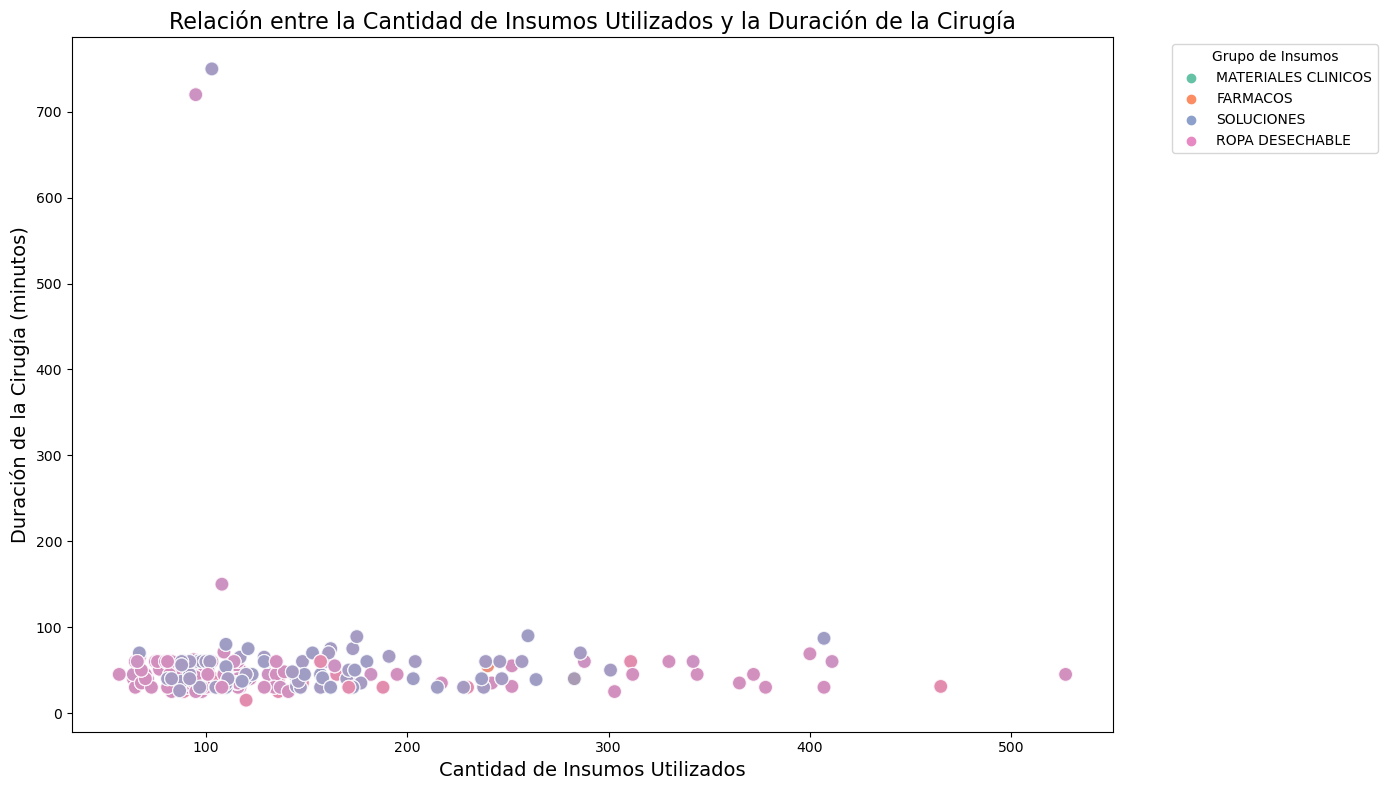

In [85]:
# Filtrar los datos de Cesarea específicos
#Cesarea = cruce_final[cruce_final['CODCIRUGIA'] == '20-04-006-00']
#Cesarea = cruce_final[cruce_final['COD_CIRUGIAS'] == '20-04-006-00|-1|-1|-1']
Cesarea = cruce_final[(cruce_final['COD_CIRUGIAS'] == '20-04-006-00|-1|-1|-1') & 
                              (cruce_final['CODCIRUGIA'] == '20-04-006-00')]
# Eliminar las filas donde NOMBRE_GRUPO_ABA es ' '
Cesarea = Cesarea[Cesarea['NOMBRE_GRUPO_ABA'] != ' ']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = Cesarea.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') y el grupo de insumos ('NOMBRE_GRUPO_ABA') por 'ID_INGRESO'
durpab_pacientes = Cesarea[['ID_INGRESO', 'DURPAB', 'NOMBRE_GRUPO_ABA']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión con colores según 'NOMBRE_GRUPO_ABA'
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Cantidad_Insumos', y='DURPAB', hue='NOMBRE_GRUPO_ABA', data=datos_combined, palette='Set2', s=100, alpha=0.7, edgecolor='w')

# Configurar el título y etiquetas del gráfico
plt.title('Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía', fontsize=16)
plt.xlabel('Cantidad de Insumos Utilizados', fontsize=14)
plt.ylabel('Duración de la Cirugía (minutos)', fontsize=14)

# Ajustar leyenda
plt.legend(title='Grupo de Insumos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [137]:
#Promedio de uso de insumos en Cesarea por medico:

# Filtrar los datos de Cesarea específicos
Cesarea = cruce_final[cruce_final['CODCIRUGIA'] == '20-04-006-00']

# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
cantidad_insumos = Cesarea.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS']).size().reset_index(name='Cantidad_Insumos')

# Calcular el promedio de insumos por cirujano, insumo, grupo y tipo de insumo
promedios = cantidad_insumos.groupby(['Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS','ID_INGRESO'])['Cantidad_Insumos'].mean().reset_index()

# Crear la tabla dinámica usando pivottablejs
pivot_ui(promedios, 
         rows=['Nombre_CIRUJANO'], 
         cols=['NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA'], 
         vals=['Cantidad_Insumos'], 
         aggregatorName='Average', 
         rendererName='Table',
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',  outfile_path='Promedio_Insumos_Cesarea.html')

In [143]:
#Insumos AMIGDALECTOMIA C/S ADENOIDECTOMIA (13-02-029-00):

# Tabla Dinamica:

#!pip install pivottablejs
from pivottablejs import pivot_ui

#cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Filtrar solo Amigdaletomia "13-02-029-00"
Amigdalectomia = cruce_final[cruce_final['CODCIRUGIA'] == '13-02-029-00']

# Crear tabla dinámica con filtros interactivos
pivot_ui(Amigdalectomia, 
         rows=['ID_INGRESO'], 
         cols=['NOMBRE'], 
         aggregatorName='Count', 
         rendererName='Table', 
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',
#         filter=['TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']
         outfile_path='tabla_dinamica_Amigdalectomia.html'
        )

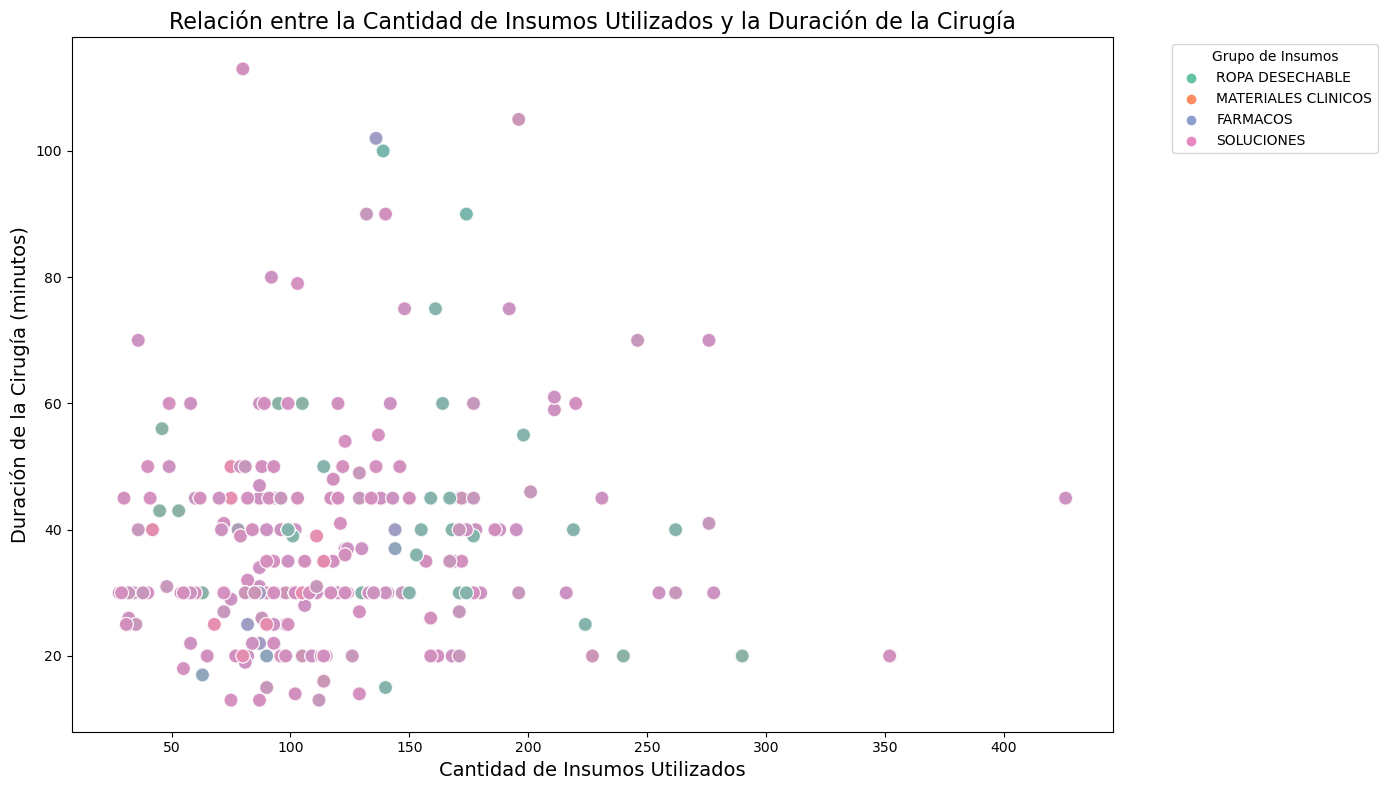

In [87]:
# Filtrar los datos de AMIGDALECTOMIA C/S ADENOIDECTOMIA específicos
#Amigdalectomia = cruce_final[cruce_final['CODCIRUGIA'] == '13-02-029-00']
#Amigdalectomia = cruce_final[cruce_final['COD_CIRUGIAS'] == '13-02-029-00|-1|-1|-1']
Amigdalectomia = cruce_final[(cruce_final['COD_CIRUGIAS'] == '13-02-029-00|-1|-1|-1') & 
                              (cruce_final['CODCIRUGIA'] == '13-02-029-00')]
# Eliminar las filas donde NOMBRE_GRUPO_ABA es ' '
Amigdalectomia = Amigdalectomia[Amigdalectomia['NOMBRE_GRUPO_ABA'] != ' ']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = Amigdalectomia.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') y el grupo de insumos ('NOMBRE_GRUPO_ABA') por 'ID_INGRESO'
durpab_pacientes = Amigdalectomia[['ID_INGRESO', 'DURPAB', 'NOMBRE_GRUPO_ABA']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión con colores según 'NOMBRE_GRUPO_ABA'
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Cantidad_Insumos', y='DURPAB', hue='NOMBRE_GRUPO_ABA', data=datos_combined, palette='Set2', s=100, alpha=0.7, edgecolor='w')

# Configurar el título y etiquetas del gráfico
plt.title('Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía', fontsize=16)
plt.xlabel('Cantidad de Insumos Utilizados', fontsize=14)
plt.ylabel('Duración de la Cirugía (minutos)', fontsize=14)

# Ajustar leyenda
plt.legend(title='Grupo de Insumos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [147]:
#Promedio de uso de insumos en AMIGDALECTOMIA C/S ADENOIDECTOMIA por medico:

# Filtrar los datos de Amigdalectomia específicos
Amigdalectomia = cruce_final[cruce_final['CODCIRUGIA'] == '13-02-029-00']

# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
cantidad_insumos = Amigdalectomia.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS']).size().reset_index(name='Cantidad_Insumos')

# Calcular el promedio de insumos por cirujano, insumo, grupo y tipo de insumo
promedios = cantidad_insumos.groupby(['Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS','ID_INGRESO'])['Cantidad_Insumos'].mean().reset_index()

# Crear la tabla dinámica usando pivottablejs
pivot_ui(promedios, 
         rows=['Nombre_CIRUJANO'], 
         cols=['NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA'], 
         vals=['Cantidad_Insumos'], 
         aggregatorName='Average', 
         rendererName='Table',
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',  outfile_path='Promedio_Insumos_Amigdalectomia.html')

In [13]:
#Insumos CIRCUNCISION (19-02-082-00):

# Tabla Dinamica:

#!pip install pivottablejs
from pivottablejs import pivot_ui

#cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Filtrar solo Circuncision "19-02-082-00"
Circuncision = cruce_final[cruce_final['CODCIRUGIA'] == '19-02-082-00']
Circuncision = cruce_final[cruce_final['COD_CIRUGIAS'] == '19-02-082-00|-1|-1|-1']
# Crear tabla dinámica con filtros interactivos
pivot_ui(Circuncision, 
         rows=['ID_INGRESO'], 
         cols=['NOMBRE'], 
         aggregatorName='Count', 
         rendererName='Table', 
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',
#         filter=['TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']
         outfile_path='tabla_dinamica_Circuncision.html'
        )

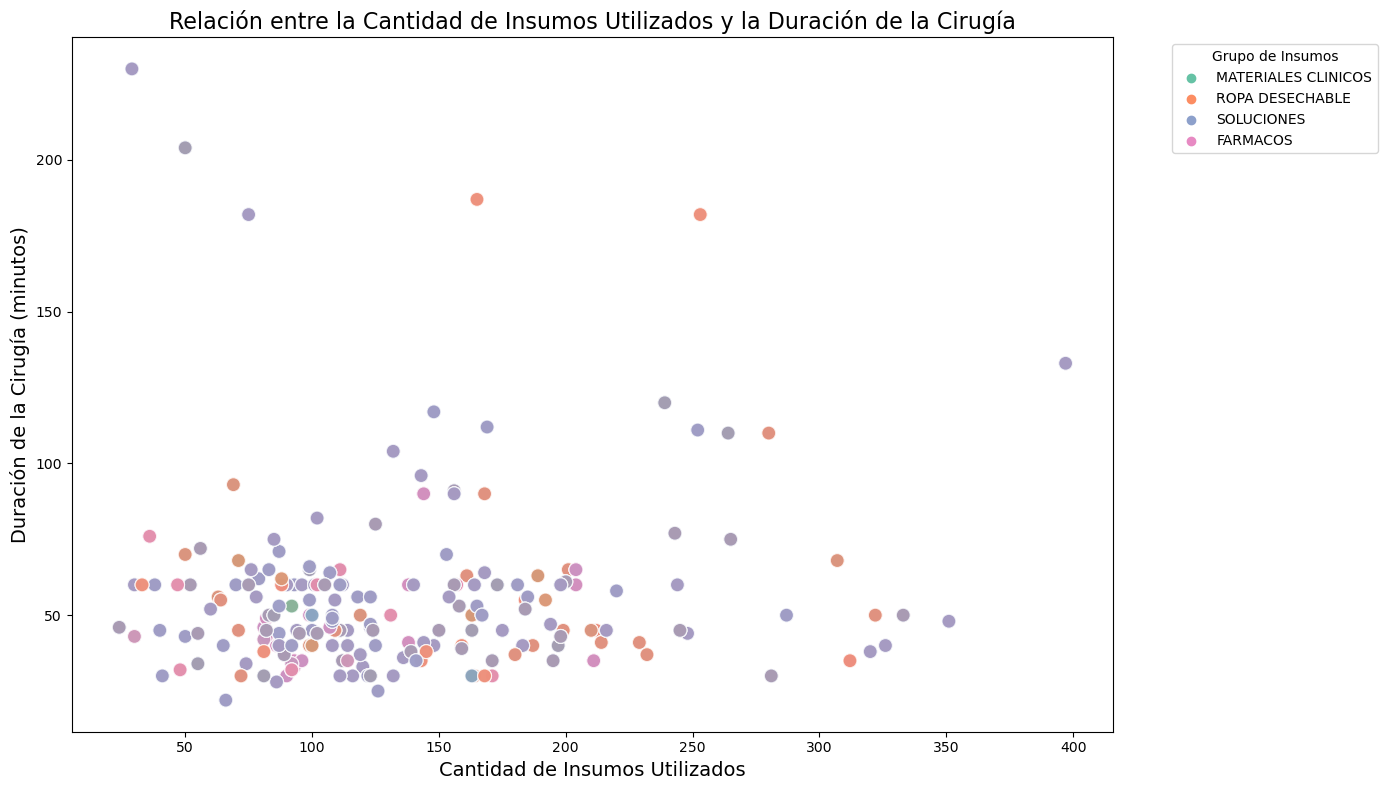

In [89]:
# Filtrar los datos de Circuncision específicos
#Circuncision = cruce_final[cruce_final['CODCIRUGIA'] == '19-02-082-00']
#Circuncision = cruce_final[cruce_final['COD_CIRUGIAS'] == '19-02-082-00|-1|-1|-1'] 
Circuncision = cruce_final[(cruce_final['COD_CIRUGIAS'] == '19-02-082-00|-1|-1|-1') & 
                              (cruce_final['CODCIRUGIA'] == '19-02-082-00')]
# Eliminar las filas donde NOMBRE_GRUPO_ABA es ' '
Circuncision = Circuncision[Circuncision['NOMBRE_GRUPO_ABA'] != ' ']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = Circuncision.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') y el grupo de insumos ('NOMBRE_GRUPO_ABA') por 'ID_INGRESO'
durpab_pacientes = Circuncision[['ID_INGRESO', 'DURPAB', 'NOMBRE_GRUPO_ABA']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión con colores según 'NOMBRE_GRUPO_ABA'
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Cantidad_Insumos', y='DURPAB', hue='NOMBRE_GRUPO_ABA', data=datos_combined, palette='Set2', s=100, alpha=0.7, edgecolor='w')

# Configurar el título y etiquetas del gráfico
plt.title('Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía', fontsize=16)
plt.xlabel('Cantidad de Insumos Utilizados', fontsize=14)
plt.ylabel('Duración de la Cirugía (minutos)', fontsize=14)

# Ajustar leyenda
plt.legend(title='Grupo de Insumos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [11]:
#Promedio de uso de insumos en Circuncision por medico:
from pivottablejs import pivot_ui
# Filtrar los datos de Circuncision específicos
Circuncision = cruce_final[cruce_final['CODCIRUGIA'] == '19-02-082-00']
Circuncision = cruce_final[cruce_final['COD_CIRUGIAS'] == '19-02-082-00|-1|-1|-1']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
cantidad_insumos = Circuncision.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS']).size().reset_index(name='Cantidad_Insumos')

# Calcular el promedio de insumos por cirujano, insumo, grupo y tipo de insumo
promedios = cantidad_insumos.groupby(['Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS','ID_INGRESO'])['Cantidad_Insumos'].mean().reset_index()

# Crear la tabla dinámica usando pivottablejs
pivot_ui(promedios, 
         rows=['Nombre_CIRUJANO'], 
         cols=['NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA'], 
         vals=['Cantidad_Insumos'], 
         aggregatorName='Average', 
         rendererName='Table',
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',  outfile_path='Promedio_Insumos_Circuncision.html')

In [155]:
#Insumos MENISCECTOMIA (21-04-159-00):

# Tabla Dinamica:

#!pip install pivottablejs
from pivottablejs import pivot_ui

#cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Filtrar solo Meniscectomia "21-04-159-00"
Meniscectomia = cruce_final[cruce_final['CODCIRUGIA'] == '21-04-159-00']

# Crear tabla dinámica con filtros interactivos
pivot_ui(Meniscectomia, 
         rows=['ID_INGRESO'], 
         cols=['NOMBRE'], 
         aggregatorName='Count', 
         rendererName='Table', 
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',
#         filter=['TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']
         outfile_path='tabla_dinamica_Meniscectomia.html'
        )

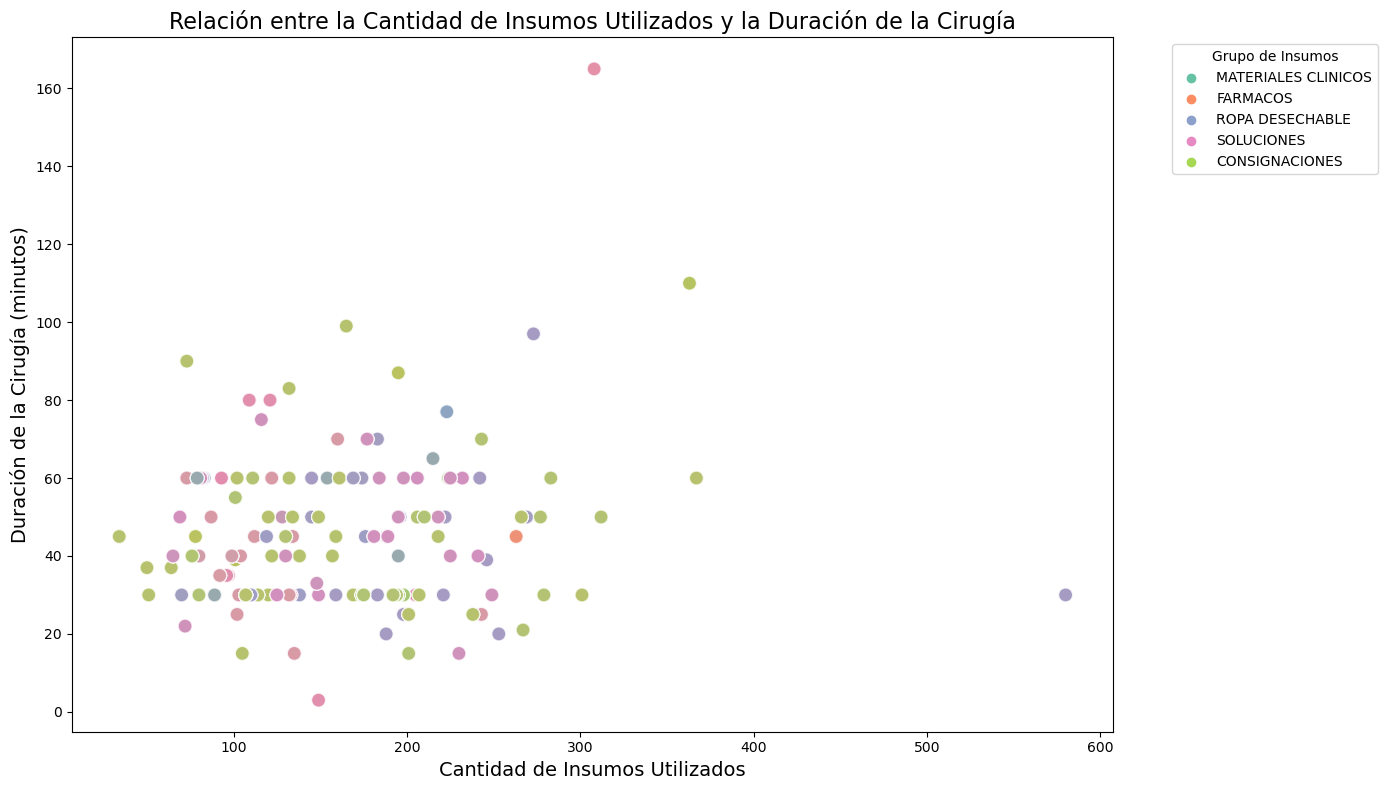

In [91]:
# Filtrar los datos de Meniscectomia específicos
#Meniscectomia = cruce_final[cruce_final['CODCIRUGIA'] == '21-04-159-00']
#Meniscectomia = cruce_final[cruce_final['COD_CIRUGIAS'] == '21-04-159-00|-1|-1|-1']
Meniscectomia = cruce_final[(cruce_final['COD_CIRUGIAS'] == '21-04-159-00|-1|-1|-1') & 
                              (cruce_final['CODCIRUGIA'] == '21-04-159-00')]
# Eliminar las filas donde NOMBRE_GRUPO_ABA es ' '
Meniscectomia = Meniscectomia[Meniscectomia['NOMBRE_GRUPO_ABA'] != ' ']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = Meniscectomia.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') y el grupo de insumos ('NOMBRE_GRUPO_ABA') por 'ID_INGRESO'
durpab_pacientes = Meniscectomia[['ID_INGRESO', 'DURPAB', 'NOMBRE_GRUPO_ABA']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión con colores según 'NOMBRE_GRUPO_ABA'
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Cantidad_Insumos', y='DURPAB', hue='NOMBRE_GRUPO_ABA', data=datos_combined, palette='Set2', s=100, alpha=0.7, edgecolor='w')

# Configurar el título y etiquetas del gráfico
plt.title('Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía', fontsize=16)
plt.xlabel('Cantidad de Insumos Utilizados', fontsize=14)
plt.ylabel('Duración de la Cirugía (minutos)', fontsize=14)

# Ajustar leyenda
plt.legend(title='Grupo de Insumos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [159]:
#Promedio de uso de insumos en Meniscectomia por medico:

# Filtrar los datos de Meniscectomia específicos
Meniscectomia = cruce_final[cruce_final['CODCIRUGIA'] == '21-04-159-00']

# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
cantidad_insumos = Meniscectomia.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS']).size().reset_index(name='Cantidad_Insumos')

# Calcular el promedio de insumos por cirujano, insumo, grupo y tipo de insumo
promedios = cantidad_insumos.groupby(['Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS','ID_INGRESO'])['Cantidad_Insumos'].mean().reset_index()

# Crear la tabla dinámica usando pivottablejs
pivot_ui(promedios, 
         rows=['Nombre_CIRUJANO'], 
         cols=['NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA'], 
         vals=['Cantidad_Insumos'], 
         aggregatorName='Average', 
         rendererName='Table',
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',  outfile_path='Promedio_Insumos_Meniscectomia.html')

In [163]:
#Insumos FACOERESIS EXTRACAPSULAR (12-02-064-00):

# Tabla Dinamica:

#!pip install pivottablejs
from pivottablejs import pivot_ui

#cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Filtrar solo Facoeresis "12-02-064-00"
Facoeresis = cruce_final[cruce_final['CODCIRUGIA'] == '12-02-064-00']

# Crear tabla dinámica con filtros interactivos
pivot_ui(Facoeresis, 
         rows=['ID_INGRESO'], 
         cols=['NOMBRE'], 
         aggregatorName='Count', 
         rendererName='Table', 
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',
#         filter=['TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']
         outfile_path='tabla_dinamica_Facoeresis.html'
        )

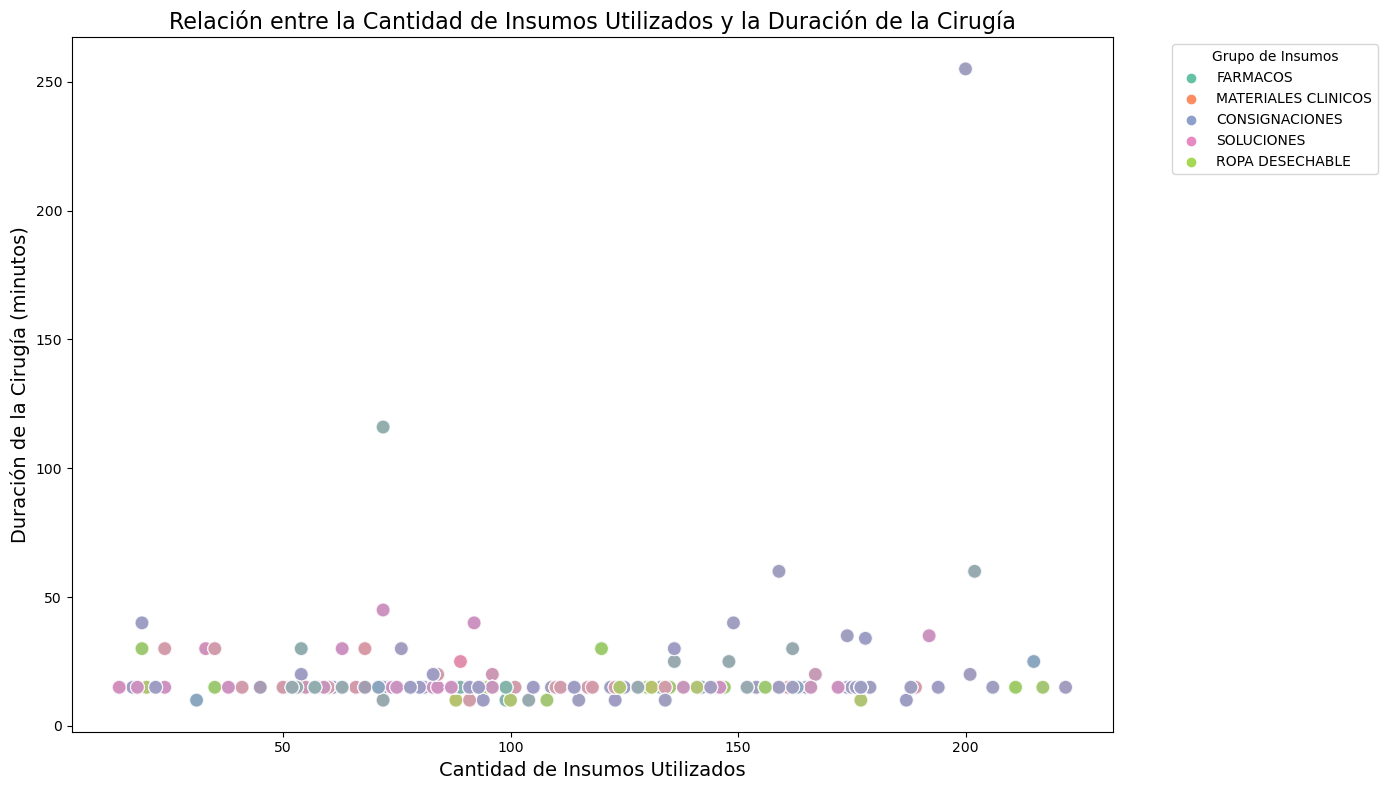

In [93]:
# Filtrar los datos de Facoeresis específicos
#Facoeresis = cruce_final[cruce_final['CODCIRUGIA'] == '12-02-064-00']
#Facoeresis = cruce_final[cruce_final['COD_CIRUGIAS'] == '12-02-064-00|-1|-1|-1']
Facoeresis = cruce_final[(cruce_final['COD_CIRUGIAS'] == '12-02-064-00|-1|-1|-1') & 
                              (cruce_final['CODCIRUGIA'] == '12-02-064-00')]
# Eliminar las filas donde NOMBRE_GRUPO_ABA es ' '
Facoeresis = Facoeresis[Facoeresis['NOMBRE_GRUPO_ABA'] != ' ']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = Facoeresis.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') y el grupo de insumos ('NOMBRE_GRUPO_ABA') por 'ID_INGRESO'
durpab_pacientes = Facoeresis[['ID_INGRESO', 'DURPAB', 'NOMBRE_GRUPO_ABA']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión con colores según 'NOMBRE_GRUPO_ABA'
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Cantidad_Insumos', y='DURPAB', hue='NOMBRE_GRUPO_ABA', data=datos_combined, palette='Set2', s=100, alpha=0.7, edgecolor='w')

# Configurar el título y etiquetas del gráfico
plt.title('Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía', fontsize=16)
plt.xlabel('Cantidad de Insumos Utilizados', fontsize=14)
plt.ylabel('Duración de la Cirugía (minutos)', fontsize=14)

# Ajustar leyenda
plt.legend(title='Grupo de Insumos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [167]:
#Promedio de uso de insumos en Facoeresis por medico:

# Filtrar los datos de Facoeresis específicos
Facoeresis = cruce_final[cruce_final['CODCIRUGIA'] == '12-02-064-00']

# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
cantidad_insumos = Facoeresis.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS']).size().reset_index(name='Cantidad_Insumos')

# Calcular el promedio de insumos por cirujano, insumo, grupo y tipo de insumo
promedios = cantidad_insumos.groupby(['Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS','ID_INGRESO'])['Cantidad_Insumos'].mean().reset_index()

# Crear la tabla dinámica usando pivottablejs
pivot_ui(promedios, 
         rows=['Nombre_CIRUJANO'], 
         cols=['NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA'], 
         vals=['Cantidad_Insumos'], 
         aggregatorName='Average', 
         rendererName='Table',
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',  outfile_path='Promedio_Insumos_Facoeresis.html')

In [169]:
#Insumos RINOPLASTIA Y/O SEPTOPLASTIA (13-02-052-00):

# Tabla Dinamica:

#!pip install pivottablejs
from pivottablejs import pivot_ui

#cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Filtrar solo Rinoplastia "13-02-052-00"
Rinoplastia = cruce_final[cruce_final['CODCIRUGIA'] == '13-02-052-00']

# Crear tabla dinámica con filtros interactivos
pivot_ui(Rinoplastia, 
         rows=['ID_INGRESO'], 
         cols=['NOMBRE'], 
         aggregatorName='Count', 
         rendererName='Table', 
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',
#         filter=['TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']
         outfile_path='tabla_dinamica_Rinoplastia.html'
        )

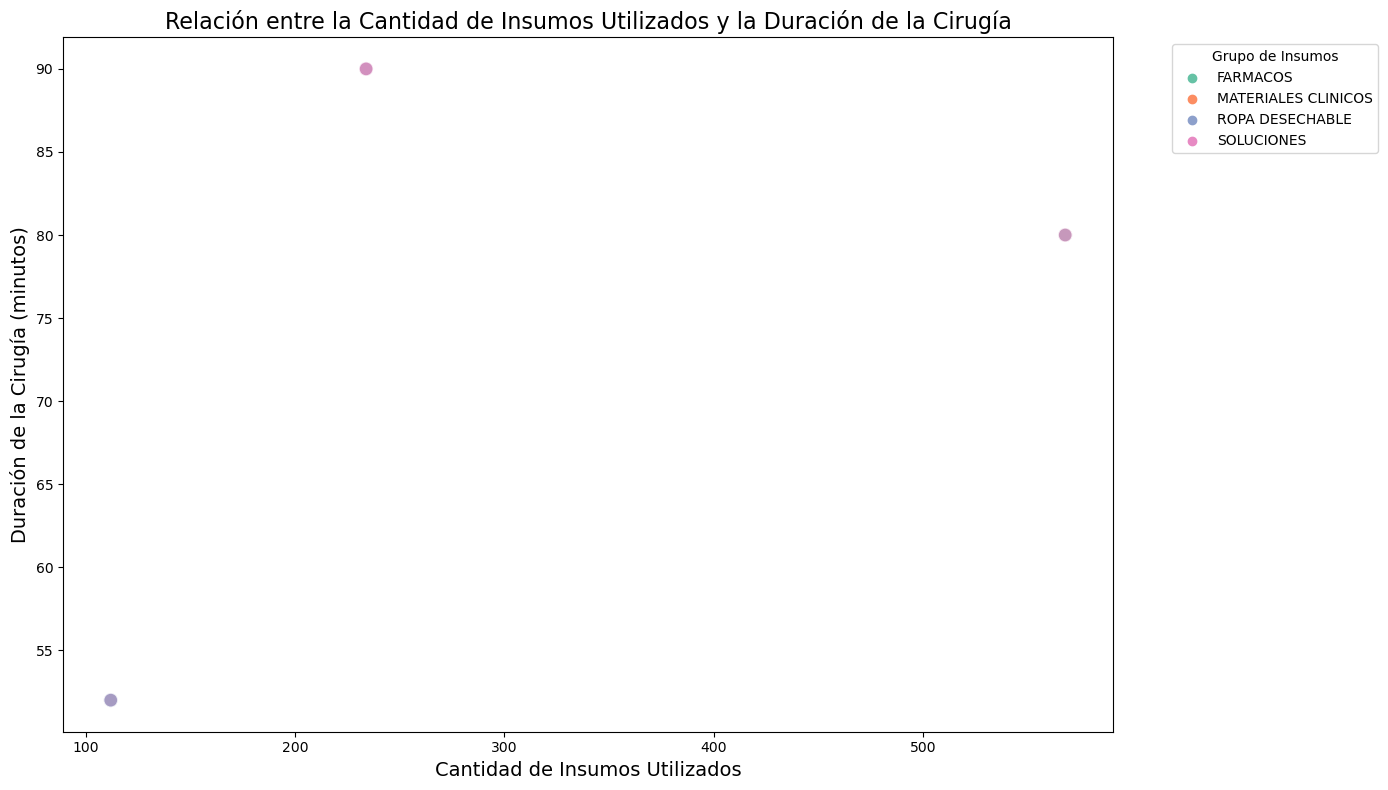

In [95]:
# Filtrar los datos de Rinoplastia específicos
#Rinoplastia = cruce_final[cruce_final['CODCIRUGIA'] == '13-02-052-00']
#Rinoplastia = cruce_final[cruce_final['COD_CIRUGIAS'] == '13-02-052-00|-1|-1|-1']
Rinoplastia = cruce_final[(cruce_final['COD_CIRUGIAS'] == '13-02-052-00|-1|-1|-1') & 
                              (cruce_final['CODCIRUGIA'] == '13-02-052-00')]
# Eliminar las filas donde NOMBRE_GRUPO_ABA es ' '
Rinoplastia = Rinoplastia[Rinoplastia['NOMBRE_GRUPO_ABA'] != ' ']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = Rinoplastia.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') y el grupo de insumos ('NOMBRE_GRUPO_ABA') por 'ID_INGRESO'
durpab_pacientes = Rinoplastia[['ID_INGRESO', 'DURPAB', 'NOMBRE_GRUPO_ABA']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión con colores según 'NOMBRE_GRUPO_ABA'
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Cantidad_Insumos', y='DURPAB', hue='NOMBRE_GRUPO_ABA', data=datos_combined, palette='Set2', s=100, alpha=0.7, edgecolor='w')

# Configurar el título y etiquetas del gráfico
plt.title('Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía', fontsize=16)
plt.xlabel('Cantidad de Insumos Utilizados', fontsize=14)
plt.ylabel('Duración de la Cirugía (minutos)', fontsize=14)

# Ajustar leyenda
plt.legend(title='Grupo de Insumos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [173]:
#Promedio de uso de insumos en Rinoplastia por medico:

# Filtrar los datos de Rinoplastia específicos
Rinoplastia = cruce_final[cruce_final['CODCIRUGIA'] == '13-02-052-00']

# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
cantidad_insumos = Rinoplastia.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS']).size().reset_index(name='Cantidad_Insumos')

# Calcular el promedio de insumos por cirujano, insumo, grupo y tipo de insumo
promedios = cantidad_insumos.groupby(['Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS','ID_INGRESO'])['Cantidad_Insumos'].mean().reset_index()

# Crear la tabla dinámica usando pivottablejs
pivot_ui(promedios, 
         rows=['Nombre_CIRUJANO'], 
         cols=['NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA'], 
         vals=['Cantidad_Insumos'], 
         aggregatorName='Average', 
         rendererName='Table',
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',  outfile_path='Promedio_Insumos_Rinoplastia.html')

In [177]:
#Insumos MANGA GASTRICA (18-50-006-00):

# Tabla Dinamica:

#!pip install pivottablejs
from pivottablejs import pivot_ui

#cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Filtrar solo Manga_Gastrica "18-50-006-00"
Manga_Gastrica = cruce_final[cruce_final['CODCIRUGIA'] == '18-50-006-00']

# Crear tabla dinámica con filtros interactivos
pivot_ui(Manga_Gastrica, 
         rows=['ID_INGRESO'], 
         cols=['NOMBRE'], 
         aggregatorName='Count', 
         rendererName='Table', 
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',
#         filter=['TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']
         outfile_path='tabla_dinamica_Manga_Gastrica.html'
        )

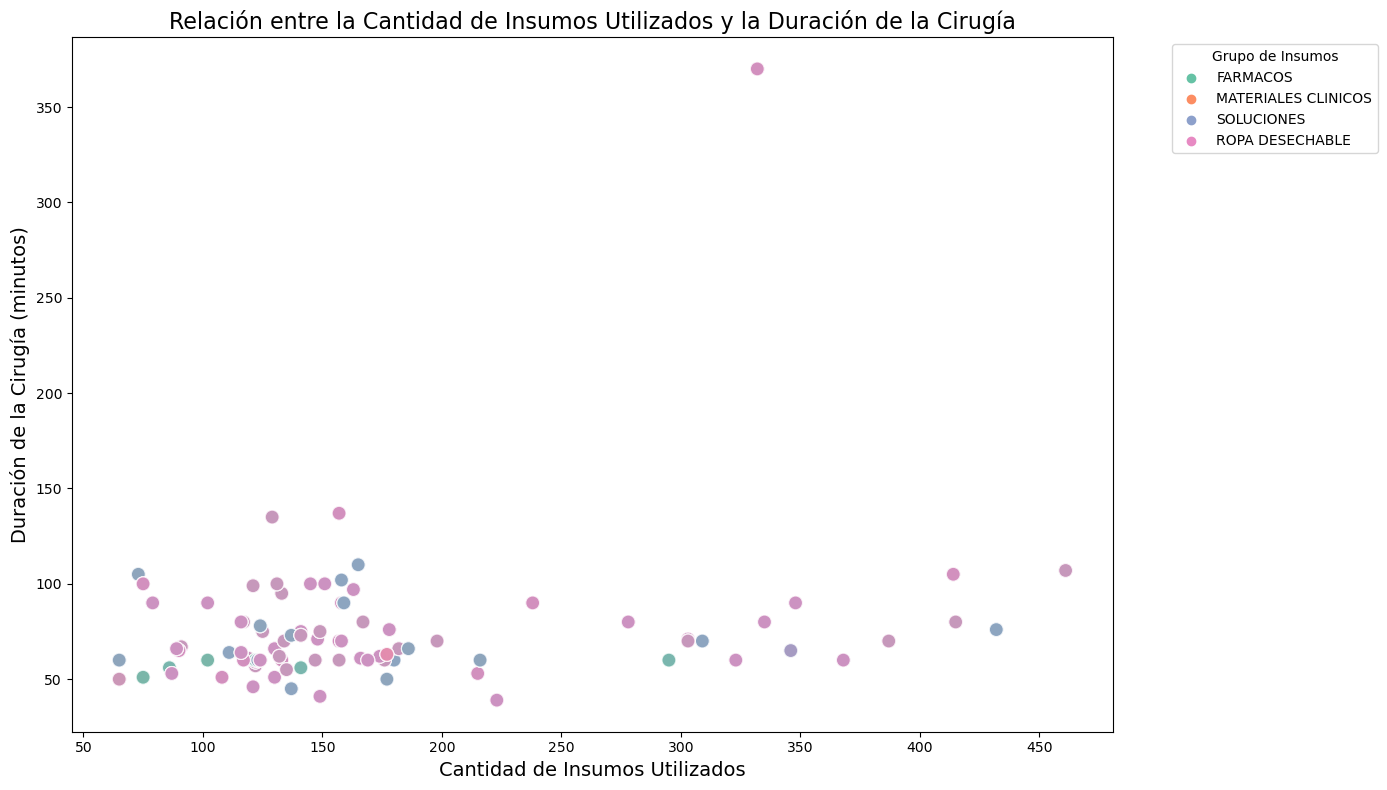

In [97]:
# Filtrar los datos de Manga_Gastrica específicos
#Manga_Gastrica = cruce_final[cruce_final['CODCIRUGIA'] == '18-50-006-00']
#Manga_Gastrica = cruce_final[cruce_final['COD_CIRUGIAS'] == '18-50-006-00|-1|-1|-1']
Manga_Gastrica = cruce_final[(cruce_final['COD_CIRUGIAS'] == '18-50-006-00|-1|-1|-1') & 
                              (cruce_final['CODCIRUGIA'] == '18-50-006-00')]
# Eliminar las filas donde NOMBRE_GRUPO_ABA es ' '
Manga_Gastrica = Manga_Gastrica[Manga_Gastrica['NOMBRE_GRUPO_ABA'] != ' ']
# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
insumos_pacientes = Manga_Gastrica.groupby('ID_INGRESO')['NOMBRE'].count().reset_index()
insumos_pacientes.columns = ['ID_INGRESO', 'Cantidad_Insumos']

# Obtener la duración de la cirugía ('DURPAB') y el grupo de insumos ('NOMBRE_GRUPO_ABA') por 'ID_INGRESO'
durpab_pacientes = Manga_Gastrica[['ID_INGRESO', 'DURPAB', 'NOMBRE_GRUPO_ABA']].drop_duplicates()

# Unir los datos contados con la duración de la cirugía
datos_combined = pd.merge(durpab_pacientes, insumos_pacientes, on='ID_INGRESO')

# Crear el gráfico de dispersión con colores según 'NOMBRE_GRUPO_ABA'
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Cantidad_Insumos', y='DURPAB', hue='NOMBRE_GRUPO_ABA', data=datos_combined, palette='Set2', s=100, alpha=0.7, edgecolor='w')

# Configurar el título y etiquetas del gráfico
plt.title('Relación entre la Cantidad de Insumos Utilizados y la Duración de la Cirugía', fontsize=16)
plt.xlabel('Cantidad de Insumos Utilizados', fontsize=14)
plt.ylabel('Duración de la Cirugía (minutos)', fontsize=14)

# Ajustar leyenda
plt.legend(title='Grupo de Insumos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [185]:
#Promedio de uso de insumos en Manga_Gastrica por medico:

# Filtrar los datos de Manga_Gastrica específicos
Manga_Gastrica = cruce_final[cruce_final['CODCIRUGIA'] == '18-50-006-00']

# Contar la cantidad de insumos ('NOMBRE') por 'ID_INGRESO'
cantidad_insumos = Manga_Gastrica.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS']).size().reset_index(name='Cantidad_Insumos')

# Calcular el promedio de insumos por cirujano, insumo, grupo y tipo de insumo
promedios = cantidad_insumos.groupby(['Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'COD_CIRUGIAS','ID_INGRESO'])['Cantidad_Insumos'].mean().reset_index()

# Crear la tabla dinámica usando pivottablejs
pivot_ui(promedios, 
         rows=['Nombre_CIRUJANO'], 
         cols=['NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA'], 
         vals=['Cantidad_Insumos'], 
         aggregatorName='Average', 
         rendererName='Table',
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',  outfile_path='Promedio_Insumos_Manga_Gastrica.html')

## Mapas de Calor (intentos):

In [3]:
#Leyendo Cruce Final
import pandas as pd
cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

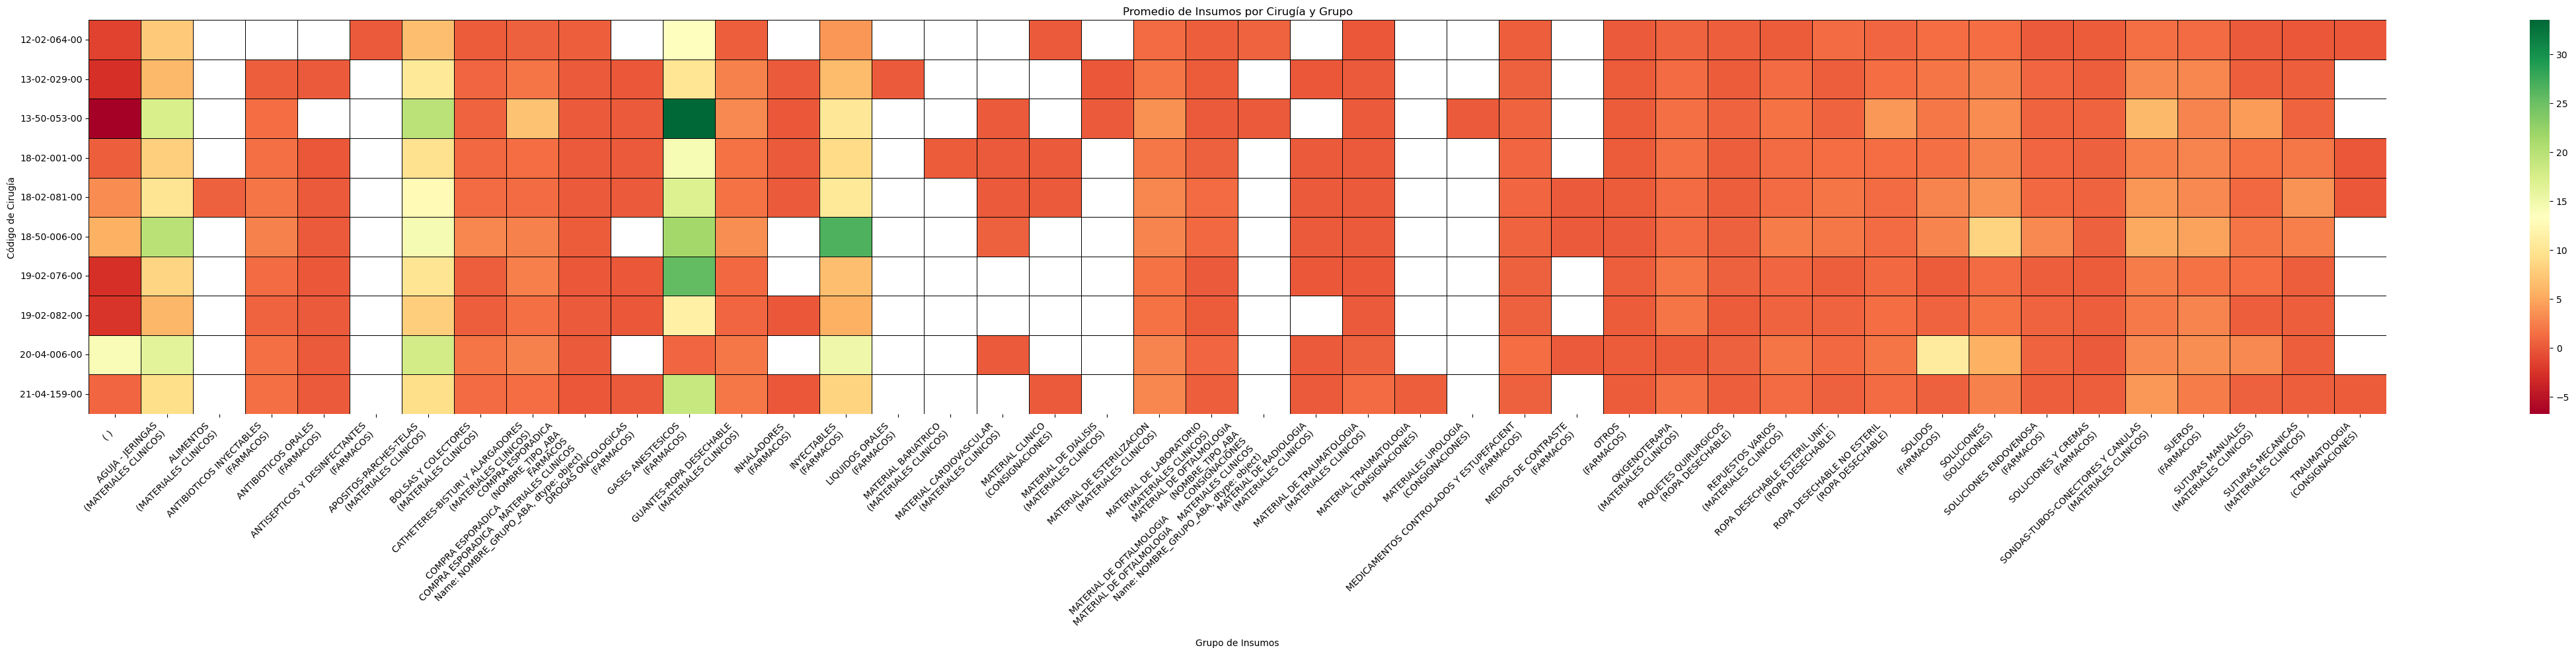

In [344]:
#Mapa de calor con todas las cirugias por GRUPO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de códigos de cirugía
codigos_cirugias = ['18-02-081-00', '18-02-001-00', '19-02-076-00', '20-04-006-00', '13-02-029-00', 
                    '19-02-082-00', '21-04-159-00', '12-02-064-00', '13-50-053-00', '18-50-006-00']

# DataFrame para almacenar los promedios de insumos por cirugía y grupo
promedios_insumos = pd.DataFrame()

for codigo in codigos_cirugias:
    # Filtrar por cirugía
    cirugias_filtradas = cruce_final[
        (cruce_final['CODCIRUGIA'] == codigo) & 
        (cruce_final['COD_CIRUGIAS'] == f'{codigo}|-1|-1|-1')
    ]
    
    # Sumar la cantidad de insumos por paciente y por insumo
    cantidad_insumos_paciente = cirugias_filtradas.groupby(
        ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
    )['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

    # Unir la cantidad de insumos de nuevo a cirugias_filtradas
    cirugias_filtradas = cirugias_filtradas.merge(
        cantidad_insumos_paciente, 
        on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
    )

    # Contar la cantidad de pacientes únicos por cirugía
    cantidad_pacientes = cirugias_filtradas['ID_INGRESO'].nunique()

    # Calcular las estadísticas por cirugía a nivel de paciente
    estadisticas = cantidad_insumos_paciente.groupby(
        ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA']
    )['cantidad_insumos'].agg(
        valor_minimo='min',
        valor_maximo='max',
        valor_promedio='mean',
        sum_insumos='sum',
        coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
    ).reset_index()

    # Calcular el promedio_insumo utilizando la cantidad de pacientes únicos por cirugía
    estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / cantidad_pacientes

    # Añadir el promedio_insumo al DataFrame de promedios_insumos
    promedios_insumos = pd.concat([promedios_insumos, estadisticas[['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','promedio_insumo']]])

# Eliminar duplicados si es necesario
promedios_insumos = promedios_insumos.drop_duplicates(subset=['CODCIRUGIA', 'NOMBRE_TIPO_ABA'])

# Crear la tabla dinámica
pivot_table = promedios_insumos.pivot(index='CODCIRUGIA', columns='NOMBRE_TIPO_ABA', values='promedio_insumo')

# Rellenar los valores nulos con 0 para asegurar que todos los rectángulos tengan anotaciones
#pivot_table = pivot_table.fillna(0)

# Obtener la relación entre NOMBRE_TIPO_ABA y NOMBRE_GRUPO_ABA
tipo_a_grupo = promedios_insumos[['NOMBRE_TIPO_ABA', 'NOMBRE_GRUPO_ABA']].drop_duplicates().set_index('NOMBRE_TIPO_ABA')

# Configurar el tamaño del gráfico
plt.figure(figsize=(45, 10))

# Crear el mapa de calor
ax = sns.heatmap(pivot_table, annot=False, fmt='.2f', cmap='RdYlGn', linewidths=0.5, linecolor='black', cbar=True, annot_kws={'size': 8, 'fontweight': 'bold'})

# Configurar el título y los ejes
plt.title('Promedio de Insumos por Cirugía y Grupo')
plt.xlabel('Grupo de Insumos')
plt.ylabel('Código de Cirugía')

# Añadir etiquetas de grupo en el eje X
new_labels = []
for tick in ax.get_xticklabels():
    tipo = tick.get_text()
    grupo = tipo_a_grupo.loc[tipo]['NOMBRE_GRUPO_ABA']
    new_labels.append(f'{tipo}\n({grupo})')
ax.set_xticklabels(new_labels, rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

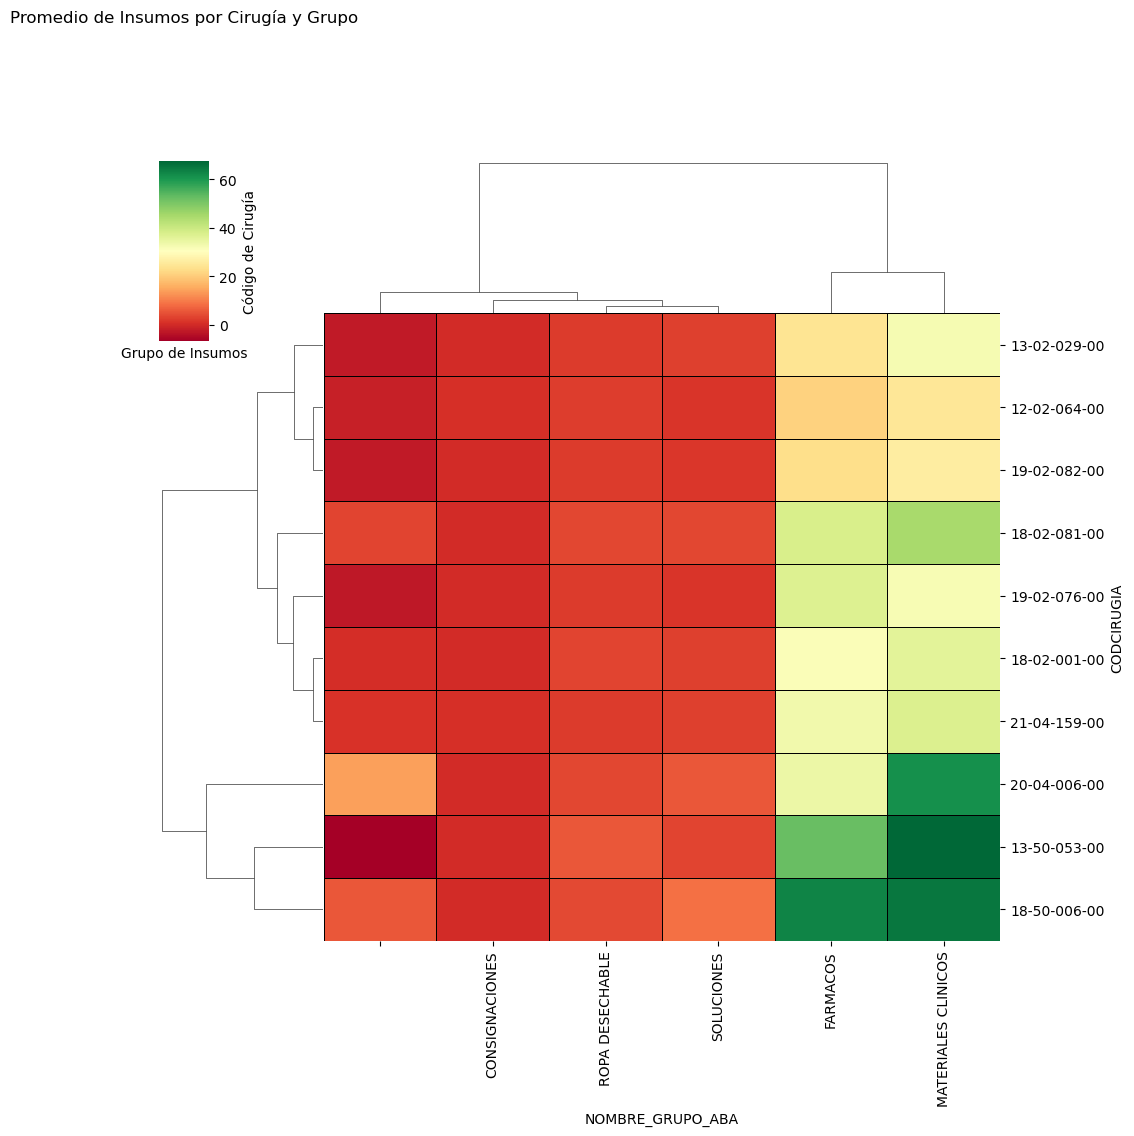

In [296]:
#mapa cluster:

# Lista de códigos de cirugía
codigos_cirugias = ['18-02-081-00', '18-02-001-00', '19-02-076-00', '20-04-006-00', '13-02-029-00', 
                    '19-02-082-00', '21-04-159-00', '12-02-064-00', '13-50-053-00', '18-50-006-00']

# DataFrame para almacenar los promedios de insumos por cirugía y grupo
promedios_insumos = pd.DataFrame()

for codigo in codigos_cirugias:
    # Filtrar por cirugía
    cirugias_filtradas = cruce_final[
        (cruce_final['CODCIRUGIA'] == codigo) & 
        (cruce_final['COD_CIRUGIAS'] == f'{codigo}|-1|-1|-1')
    ]
    
    # Sumar la cantidad de insumos por paciente y por insumo
    cantidad_insumos_paciente = cirugias_filtradas.groupby(
        ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
    )['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

    # Unir la cantidad de insumos de nuevo a cirugias_filtradas
    cirugias_filtradas = cirugias_filtradas.merge(
        cantidad_insumos_paciente, 
        on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
    )

    # Contar la cantidad de pacientes únicos por cirugía
    cantidad_pacientes = cirugias_filtradas['ID_INGRESO'].nunique()

    # Calcular las estadísticas por cirugía a nivel de paciente
    estadisticas = cantidad_insumos_paciente.groupby(
        ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA']
    )['cantidad_insumos'].agg(
        valor_minimo='min',
        valor_maximo='max',
        valor_promedio='mean',
        sum_insumos='sum',
        coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
    ).reset_index()

    # Calcular el promedio_insumo utilizando la cantidad de pacientes únicos por cirugía
    estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / cantidad_pacientes

    # Añadir el promedio_insumo al DataFrame de promedios_insumos
    promedios_insumos = pd.concat([promedios_insumos, estadisticas[['CODCIRUGIA', 'NOMBRE_GRUPO_ABA','promedio_insumo']]])

# Eliminar duplicados si es necesario
promedios_insumos = promedios_insumos.drop_duplicates(subset=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA'])

# Crear la tabla dinámica
pivot_table = promedios_insumos.pivot(index='CODCIRUGIA', columns='NOMBRE_GRUPO_ABA', values='promedio_insumo')

# Rellenar los valores nulos con 0 para asegurar que todos los rectángulos tengan anotaciones
pivot_table = pivot_table.fillna(0)

# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 10))

# Crear el clustermap
g = sns.clustermap(pivot_table, annot=False, fmt='.2f', cmap='RdYlGn', linewidths=0.5, linecolor='black', annot_kws={'size': 8, 'fontweight': 'bold'})

# Configurar el título y los ejes
plt.title('Promedio de Insumos por Cirugía y Grupo', pad=100)
plt.xlabel('Grupo de Insumos')
plt.ylabel('Código de Cirugía')

# Mostrar el gráfico
plt.show()


## ACP y kmean

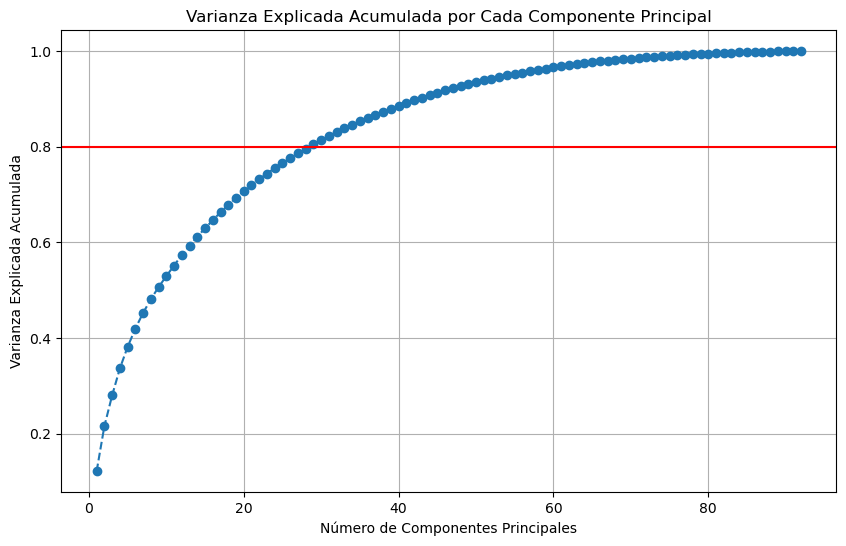

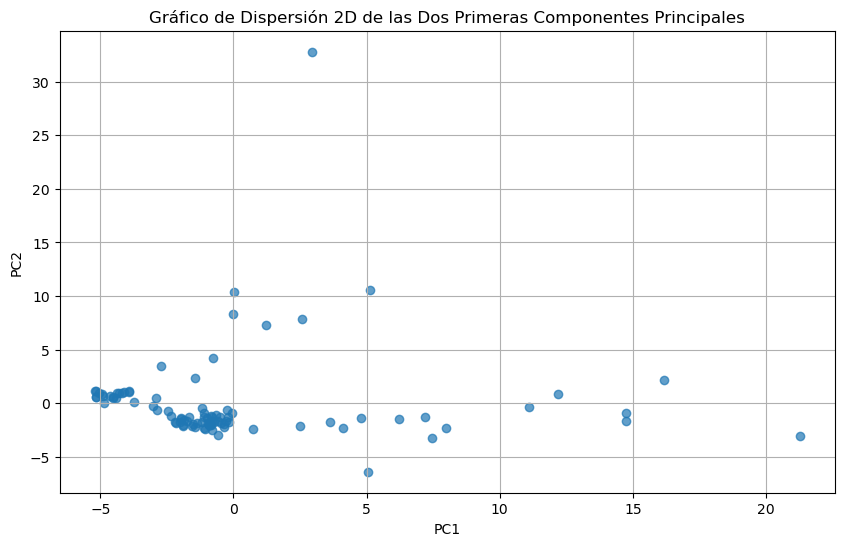

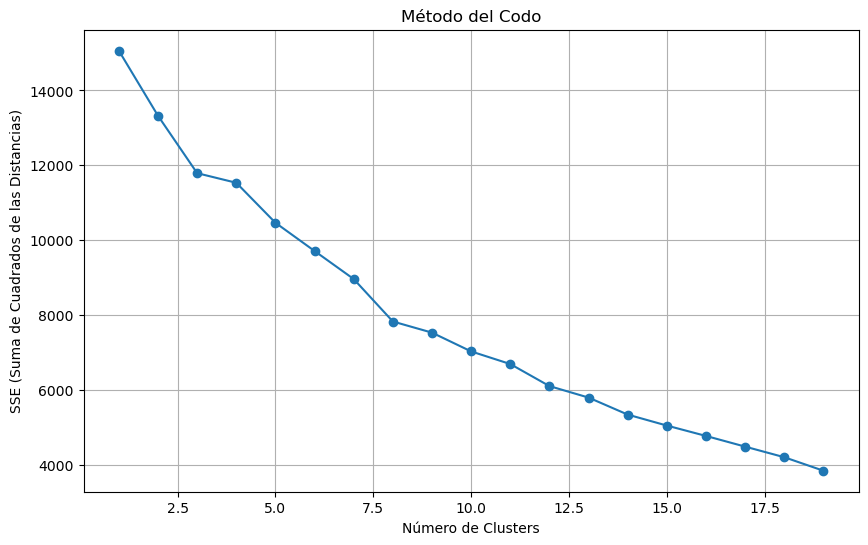

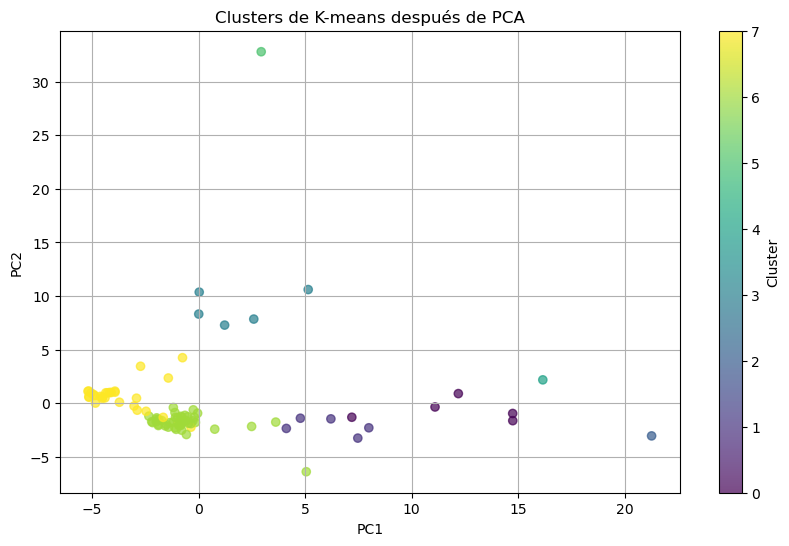

In [594]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# df de manga gastrica
df = pd.read_csv("C:/Users/Ignacio/Tesis Ignacio/Cirugias tipo panel/Manga_Gastrica.csv", sep=';')

# Separar variables categóricas y numéricas
categorical_features = ['INGRESO','AMB_HOSP', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO']
numerical_features = [col for col in df.columns if col not in categorical_features]

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Aplicar preprocesamiento
df_preprocessed = preprocessor.fit_transform(df)

# Realizar PCA con todos los componentes
pca = PCA()
principal_components = pca.fit_transform(df_preprocessed)

# Calcular la varianza explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Cada Componente Principal')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.grid(True)
plt.show()

# Selección de componentes para alcanzar el 80% de la varianza explicada
n_components = np.argmax(explained_variance >= 0.80) + 1

# Aplicar PCA con el número óptimo de componentes
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_preprocessed)

# Crear DataFrame con componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Gráfico de dispersión 2D con las dos primeras componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gráfico de Dispersión 2D de las Dos Primeras Componentes Principales')
plt.grid(True)
plt.show()

# Determinar el número óptimo de clusters utilizando el método del codo
sse = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Suma de Cuadrados de las Distancias)')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

# Elegir el número óptimo de clusters basado en los gráficos
n_clusters = 8  # Este valor debe ser elegido basado en los gráficos anteriores

# Realizar clustering con k-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_df)
pca_df['Cluster'] = clusters

# Gráfico de dispersión 2D coloreando los puntos según su pertenencia a los clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters de K-means después de PCA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [566]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# df de manga gastrica
df = pd.read_csv("C:/Users/Ignacio/Tesis Ignacio/Cirugias tipo panel/Manga_Gastrica.csv", sep=';')
# Separar variables categóricas y numéricas
categorical_features = ['INGRESO','AMB_HOSP', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO']
numerical_features = [col for col in df.columns if col not in categorical_features]

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Aplicar preprocesamiento
df_preprocessed = preprocessor.fit_transform(df)

# Convertir los datos preprocesados a un DataFrame
df_preprocessed = pd.DataFrame(df_preprocessed)

# Verificar el DataFrame preprocesado
#print(df_preprocessed.head())


El punto en el eje x donde el valor en el eje y es 0.8 es: 28.45


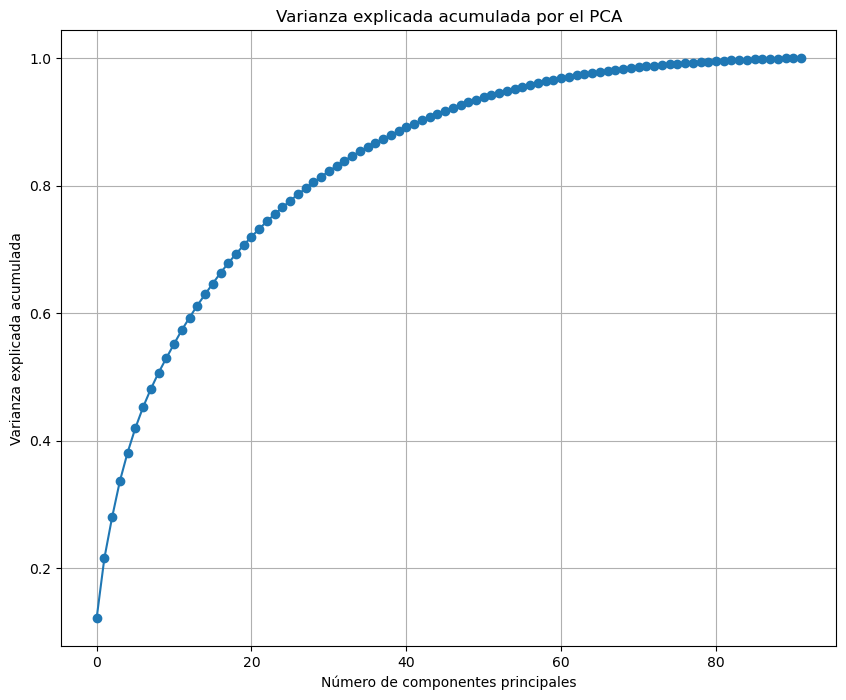

In [568]:
# Realizar PCA sin especificar el número de componentes
pca = PCA()
pca.fit(df_preprocessed)

# Calcular la varianza explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 8))
plt.plot(explained_variance, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por el PCA')
plt.grid(True)
y_target = 0.8
x_target = np.interp(y_target, explained_variance, np.arange(num_components) + 1)
print(f"El punto en el eje x donde el valor en el eje y es {y_target} es: {x_target:.2f}")
plt.show()

In [570]:
# Realizar PCA
pca = PCA(n_components=8)
principal_components = pca.fit_transform(df_preprocessed)

# Crear DataFrame con componentes principales
column_names = [f'PC{i+1}' for i in range(8)]
pca_df = pd.DataFrame(data=principal_components, columns=column_names)

# Verificar el DataFrame con componentes principales
print(pca_df.head())


         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   7.983792 -2.275003  4.822737 -2.704226 -5.892273  1.087496 -0.454467   
1  -0.256814 -0.601070  1.961701 -0.139677  1.434703 -0.881846 -0.902472   
2  14.740427 -1.611292  0.207876  1.450664 -2.041582 -7.671231  4.842605   
3  -0.156724 -1.775987  0.657451 -0.021322  0.782035 -0.071579 -0.562614   
4  -0.273843 -1.630755  1.020411  0.661645  1.963817 -0.973912  0.518236   

        PC8  
0 -2.740131  
1 -0.838474  
2 -0.359372  
3 -0.022792  
4  2.282084  


In [576]:
# Realizar clustering con k-means
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Añadir la asignación de clusters al DataFrame
pca_df['Cluster'] = clusters

# Verificar el DataFrame con clusters
print(pca_df.head())


         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   7.983792 -2.275003  4.822737 -2.704226 -5.892273  1.087496 -0.454467   
1  -0.256814 -0.601070  1.961701 -0.139677  1.434703 -0.881846 -0.902472   
2  14.740427 -1.611292  0.207876  1.450664 -2.041582 -7.671231  4.842605   
3  -0.156724 -1.775987  0.657451 -0.021322  0.782035 -0.071579 -0.562614   
4  -0.273843 -1.630755  1.020411  0.661645  1.963817 -0.973912  0.518236   

        PC8  Cluster  
0 -2.740131        1  
1 -0.838474        6  
2 -0.359372        5  
3 -0.022792        6  
4  2.282084        6  


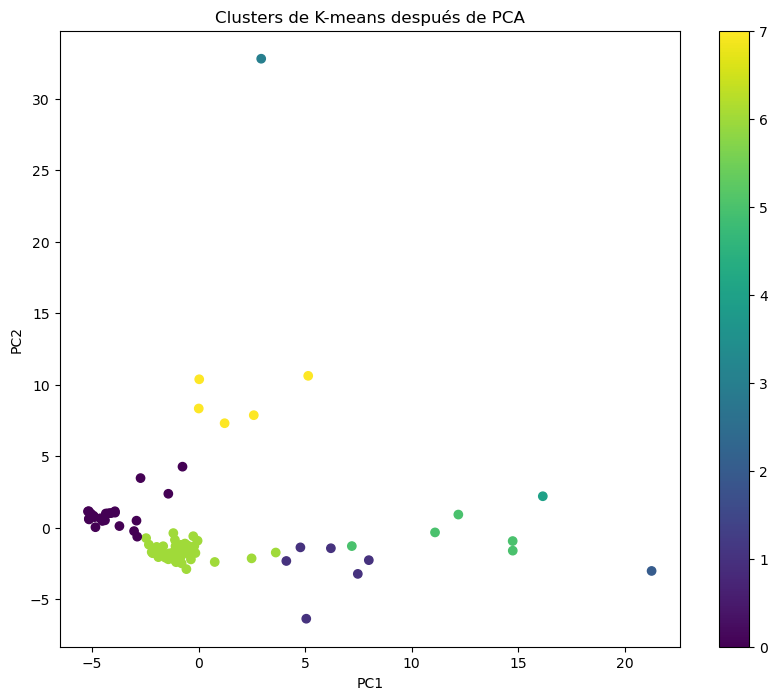

In [582]:
import matplotlib.pyplot as plt

# Visualizar clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters de K-means después de PCA')
plt.colorbar()
plt.show()


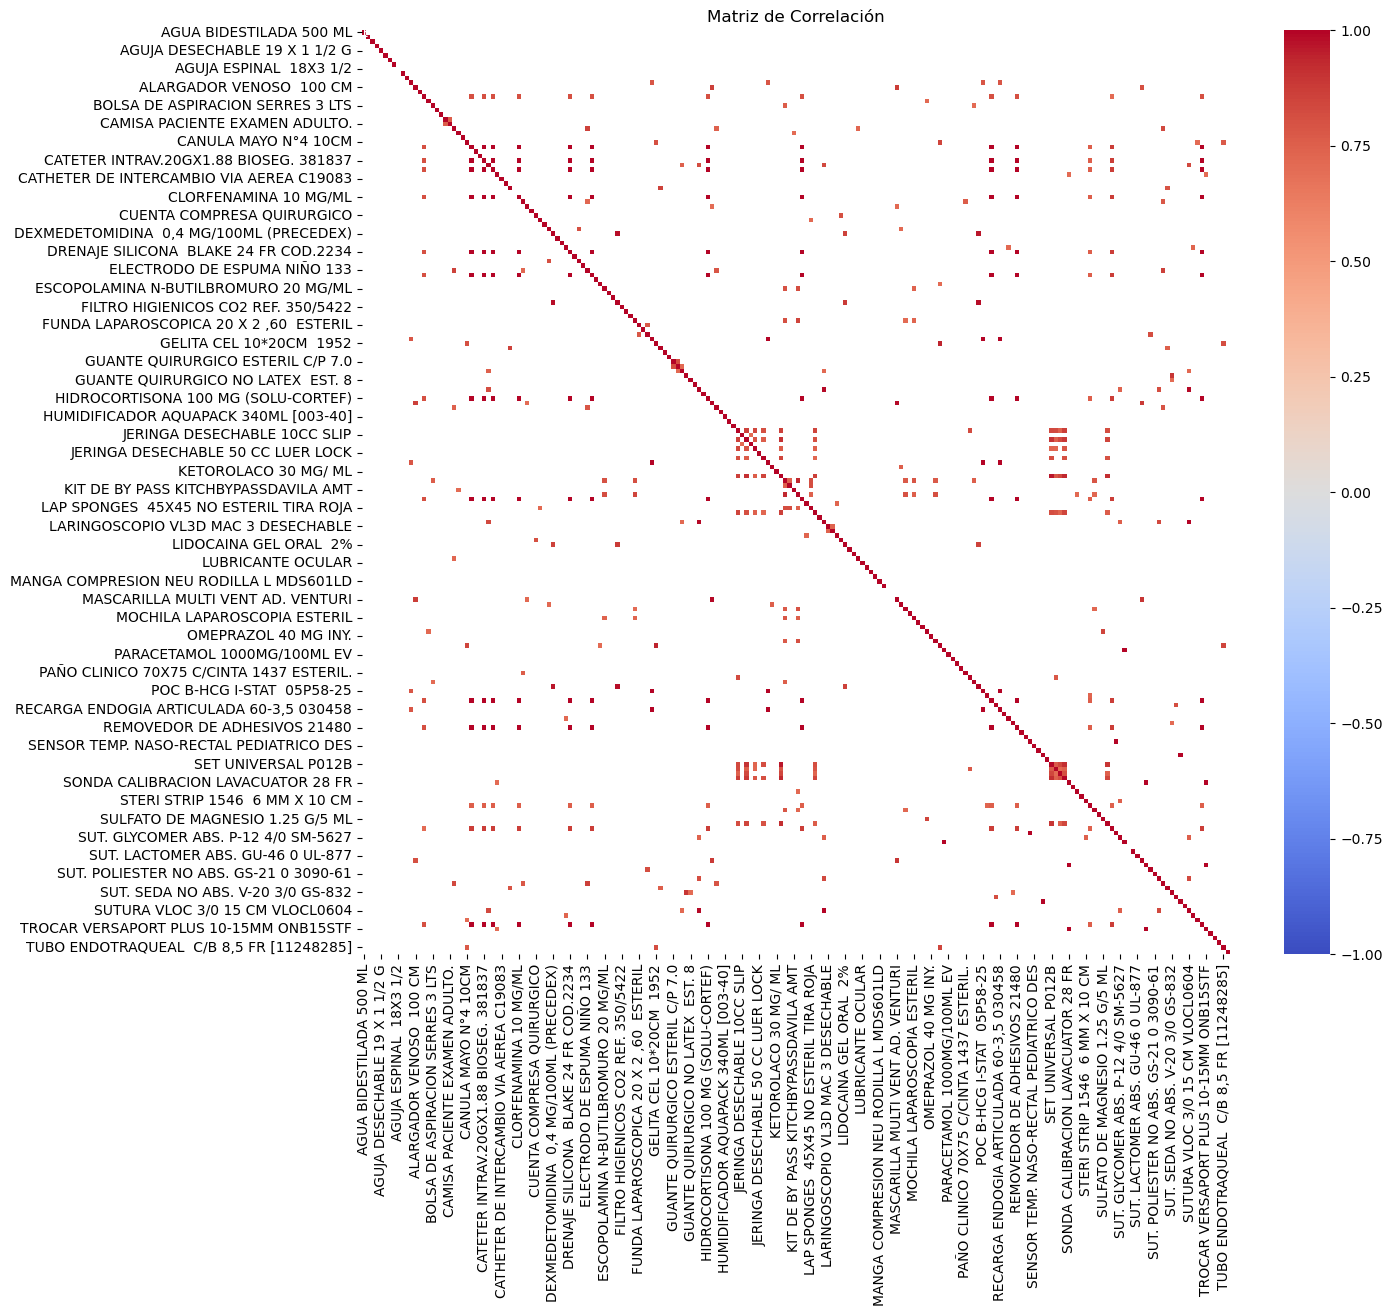

In [695]:
# df de manga gastrica
df = pd.read_csv("C:/Users/Ignacio/Tesis Ignacio/Cirugias tipo panel/Manga_Gastrica.csv", sep=';')
bla = ['INGRESO','AMB_HOSP','DURPAB','STAFF','ESPECIALIDAD_MEDICO','COMUNA','EDAD','ASEGURADOR','IPLAN','Nombre_CIRUJANO']
df1=df.drop(columns=bla)
#df1.head()
#matriz correlacion
corr=df1.corr()

# Filtrar valores mayores a 0.7
high_corr = corr[corr > 0.7]

# Crear un DataFrame vacío para almacenar la tabla resumen
resumen_df = pd.DataFrame(columns=['Columna', 'Correlaciones', 'Num_Correlaciones'])

# Iterar sobre las columnas de la matriz de correlación
for col in high_corr.columns:
    # Obtener las correlaciones mayores a 0.7 para la columna actual
    correlaciones = high_corr[col].dropna()[high_corr[col].dropna() != 1.0]
    
    # Si hay correlaciones mayores a 0.7
    if not correlaciones.empty:
        # Crear una cadena con las correlaciones separadas por punto y coma
        correlaciones_str = ";".join([f"{col2}({corr:.2f})" for col2, corr in correlaciones.items()])
        
        # Contar el número de correlaciones
        num_correlaciones = len(correlaciones)
        
        # Agregar la fila al DataFrame resumen
        resumen_df.loc[len(resumen_df)] = {'Columna': col, 'Correlaciones': correlaciones_str, 'Num_Correlaciones': num_correlaciones}

# Guardar el DataFrame resumen en un archivo CSV
resumen_df.to_csv('correlaciones_manga.csv', index=False, sep=';')

plt.figure(figsize=(14, 12))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

## Prueba 1

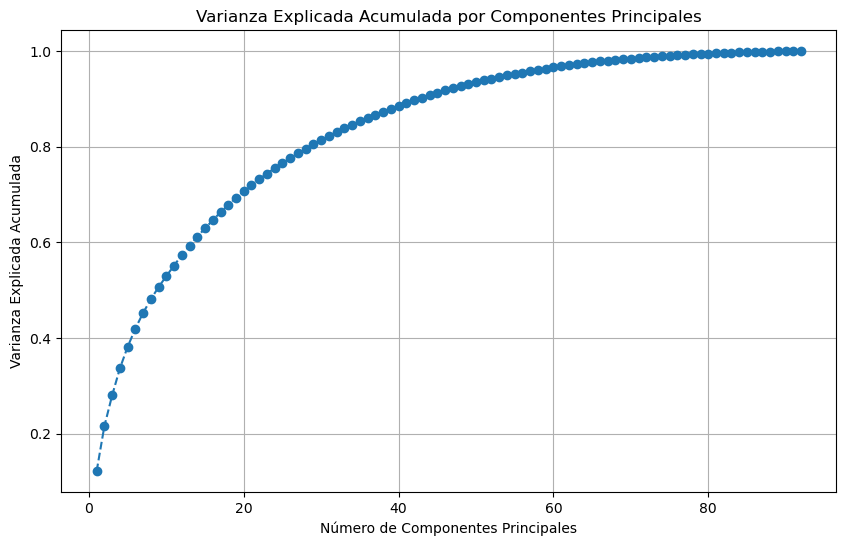

Número de componentes para explicar el 80% de la varianza: 29


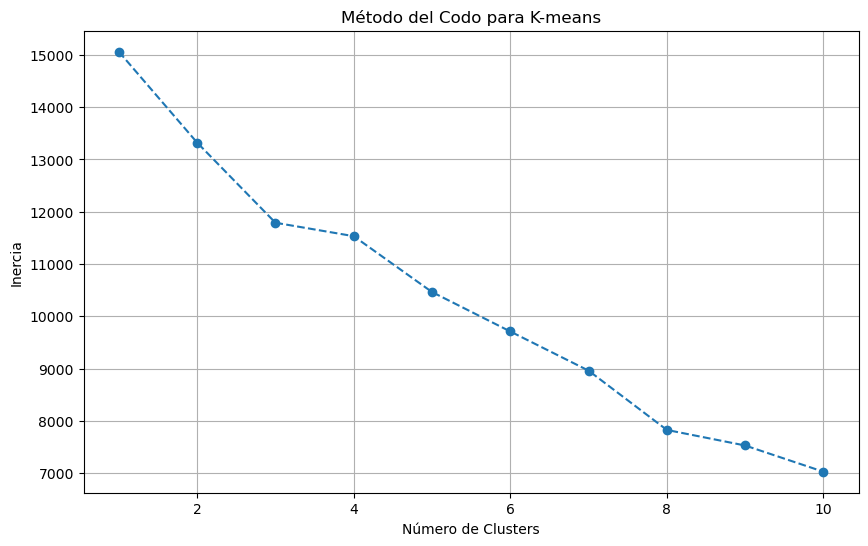

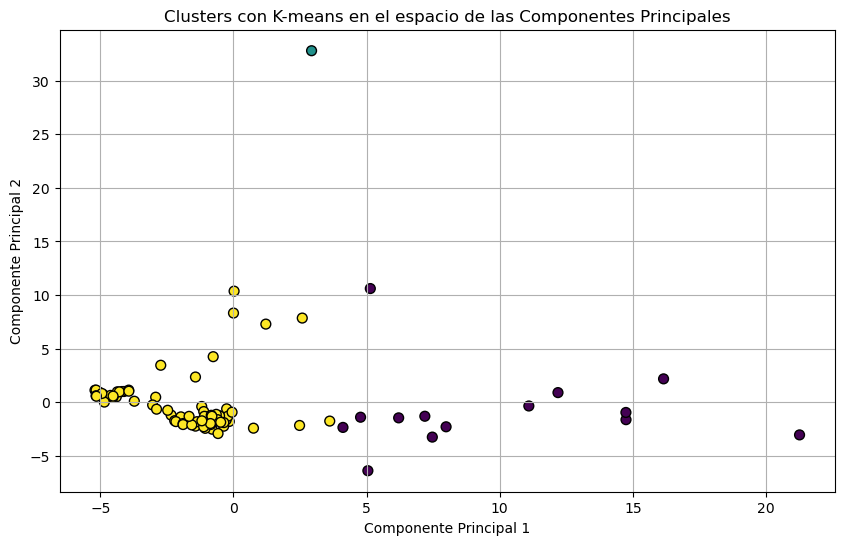

Número de clusters: 0
Número de puntos de ruido: 92


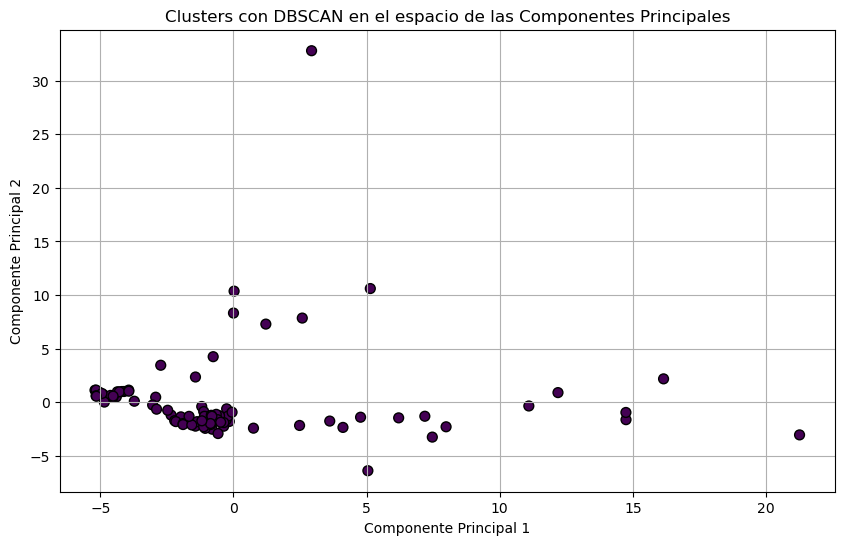

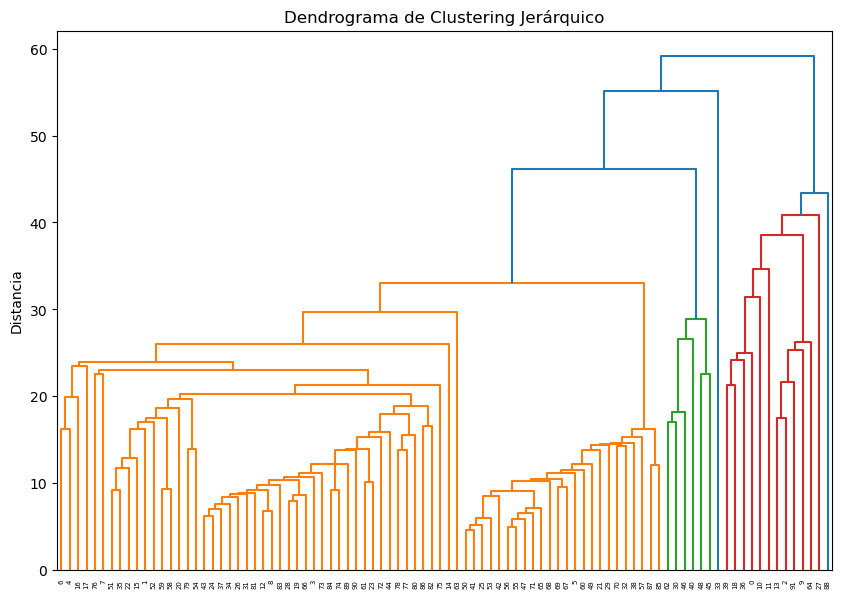

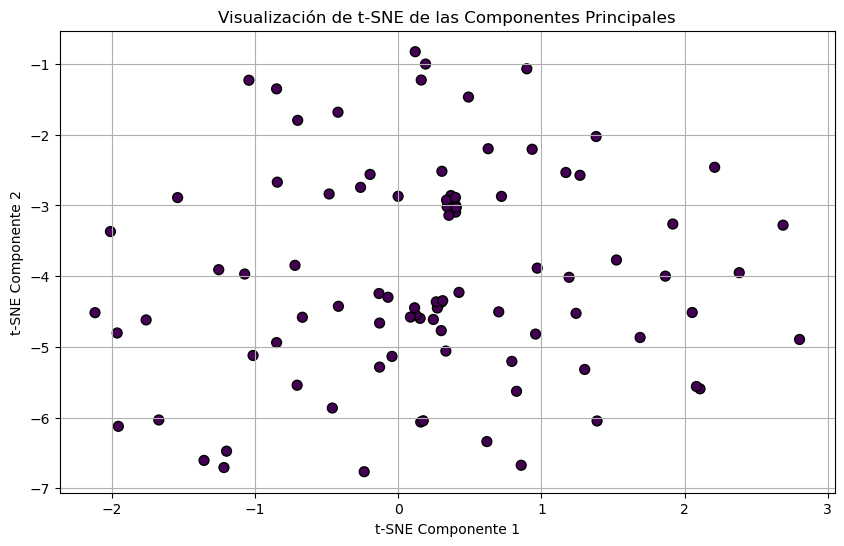

In [709]:
from sklearn.cluster import DBSCAN
# df de manga gastrica
df = pd.read_csv("C:/Users/Ignacio/Tesis Ignacio/Cirugias tipo panel/Manga_Gastrica.csv", sep=';')
# Separar variables categóricas y numéricas
categorical_features = ['INGRESO','AMB_HOSP', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO']
numerical_features = [col for col in df.columns if col not in categorical_features]

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Aplicar preprocesamiento y transformación PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=None))
])

# Ajustar y transformar los datos
df_transformed = pipeline.fit_transform(df)

# Crear un DataFrame de los datos transformados
pca = pipeline.named_steps['pca']
df_pca = pd.DataFrame(df_transformed, columns=[f'PC{i+1}' for i in range(df_transformed.shape[1])])

# Gráfico de la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)
plt.show()

# Seleccionar el número de componentes principales para explicar el 80% de la varianza
n_components = next(x[0] for x in enumerate(explained_variance) if x[1] >= 0.80) + 1
print(f'Número de componentes para explicar el 80% de la varianza: {n_components}')

# Reducir dimensionalidad con el número seleccionado de componentes
pca = PCA(n_components=n_components)
df_reduced = pca.fit_transform(df_transformed)

# Método del codo para determinar el número óptimo de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_reduced)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.grid(True)
plt.show()

# Seleccionar el número óptimo de clusters (por ejemplo, 3)
optimal_clusters = 3

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df_reduced)

# Visualización de los clusters en 2D (usando las dos primeras componentes principales)
plt.figure(figsize=(10, 6))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters con K-means en el espacio de las Componentes Principales')
plt.grid(True)
plt.show()
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(df_transformed)

# Contar el número de clusters y puntos de ruido
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)

print(f'Número de clusters: {n_clusters}')
print(f'Número de puntos de ruido: {n_noise}')

# Visualización de los clusters en 2D (usando las dos primeras componentes principales)
plt.figure(figsize=(10, 6))
plt.scatter(df_transformed[:, 0], df_transformed[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters con DBSCAN en el espacio de las Componentes Principales')
plt.grid(True)
plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage

# Realizar el clustering jerárquico
linked = linkage(df_transformed, 'ward')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de Clustering Jerárquico')
# plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

from sklearn.manifold import TSNE

# Reducir dimensionalidad a 2D usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_transformed)

# Visualización de los datos en 2D con t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.title('Visualización de t-SNE de las Componentes Principales')
plt.grid(True)
plt.show()

ANOVA para INGRESO: F=nan, p=nan
ANOVA para ESPECIALIDAD_MEDICO: F=3.313196397882318, p=0.07204963336199237
ANOVA para COMUNA: F=1.7605517642785422, p=0.02868823920513749
ANOVA para ASEGURADOR: F=2.853721474633816, p=0.013982117031732267
ANOVA para IPLAN: F=1.858008288302471, p=0.048486386847568556
ANOVA para Nombre_CIRUJANO: F=1.7965433781702846, p=0.08123034630659604
ANOVA para EDAD: F=1.2302192300286703, p=0.24038155483460757
ANOVA para DURPAB: F=1.1086193941259985, p=0.3595632442609797


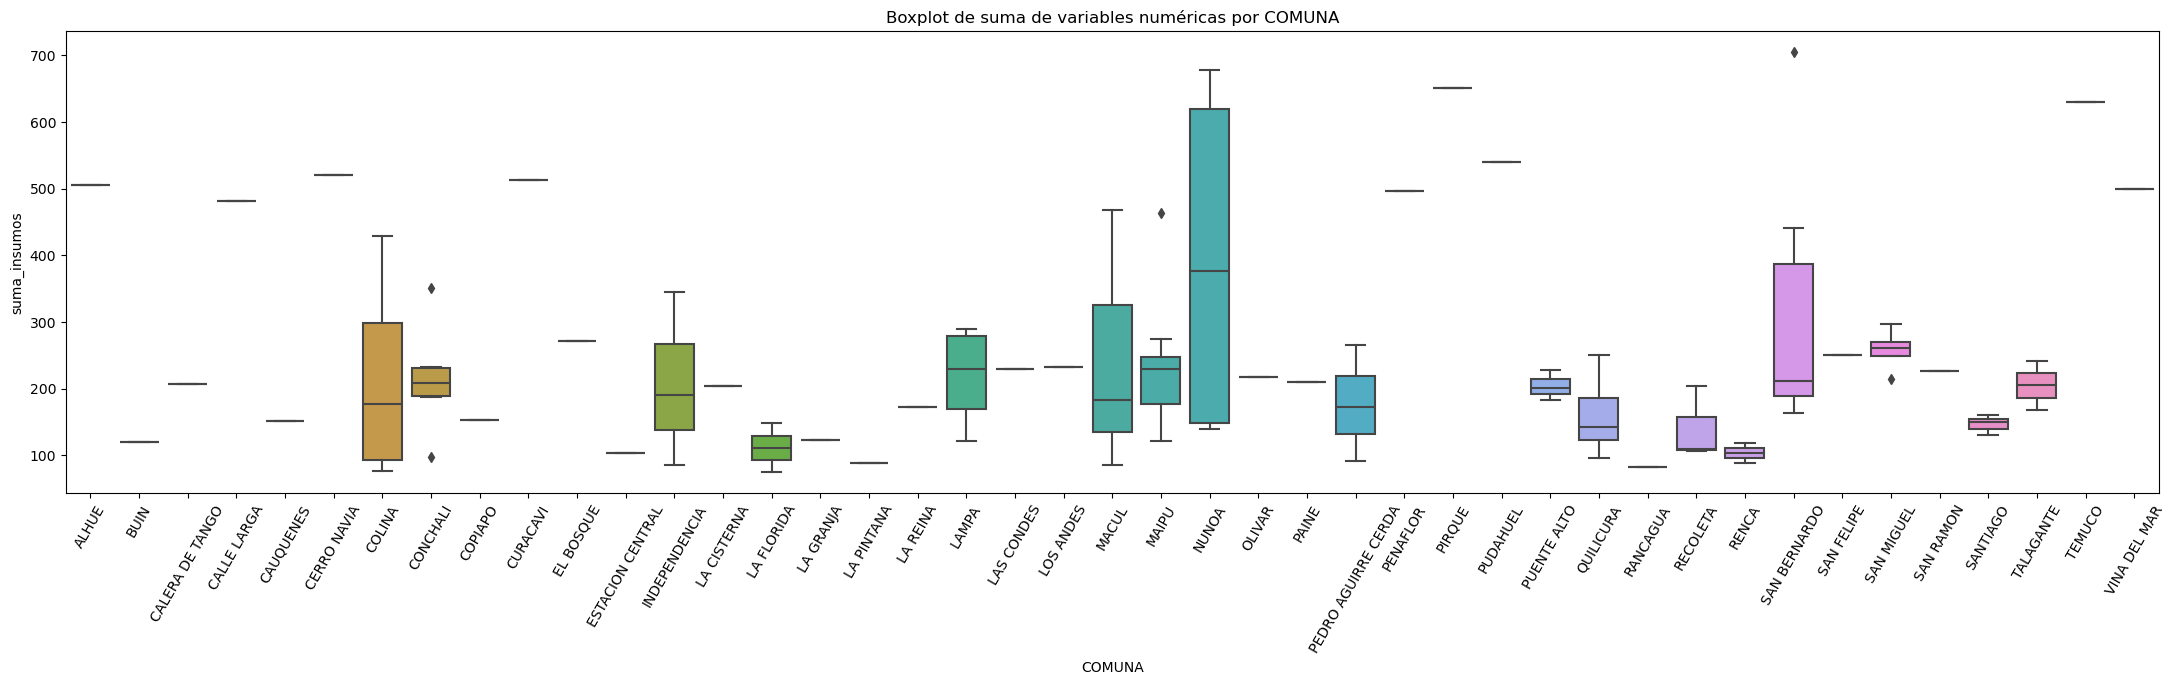

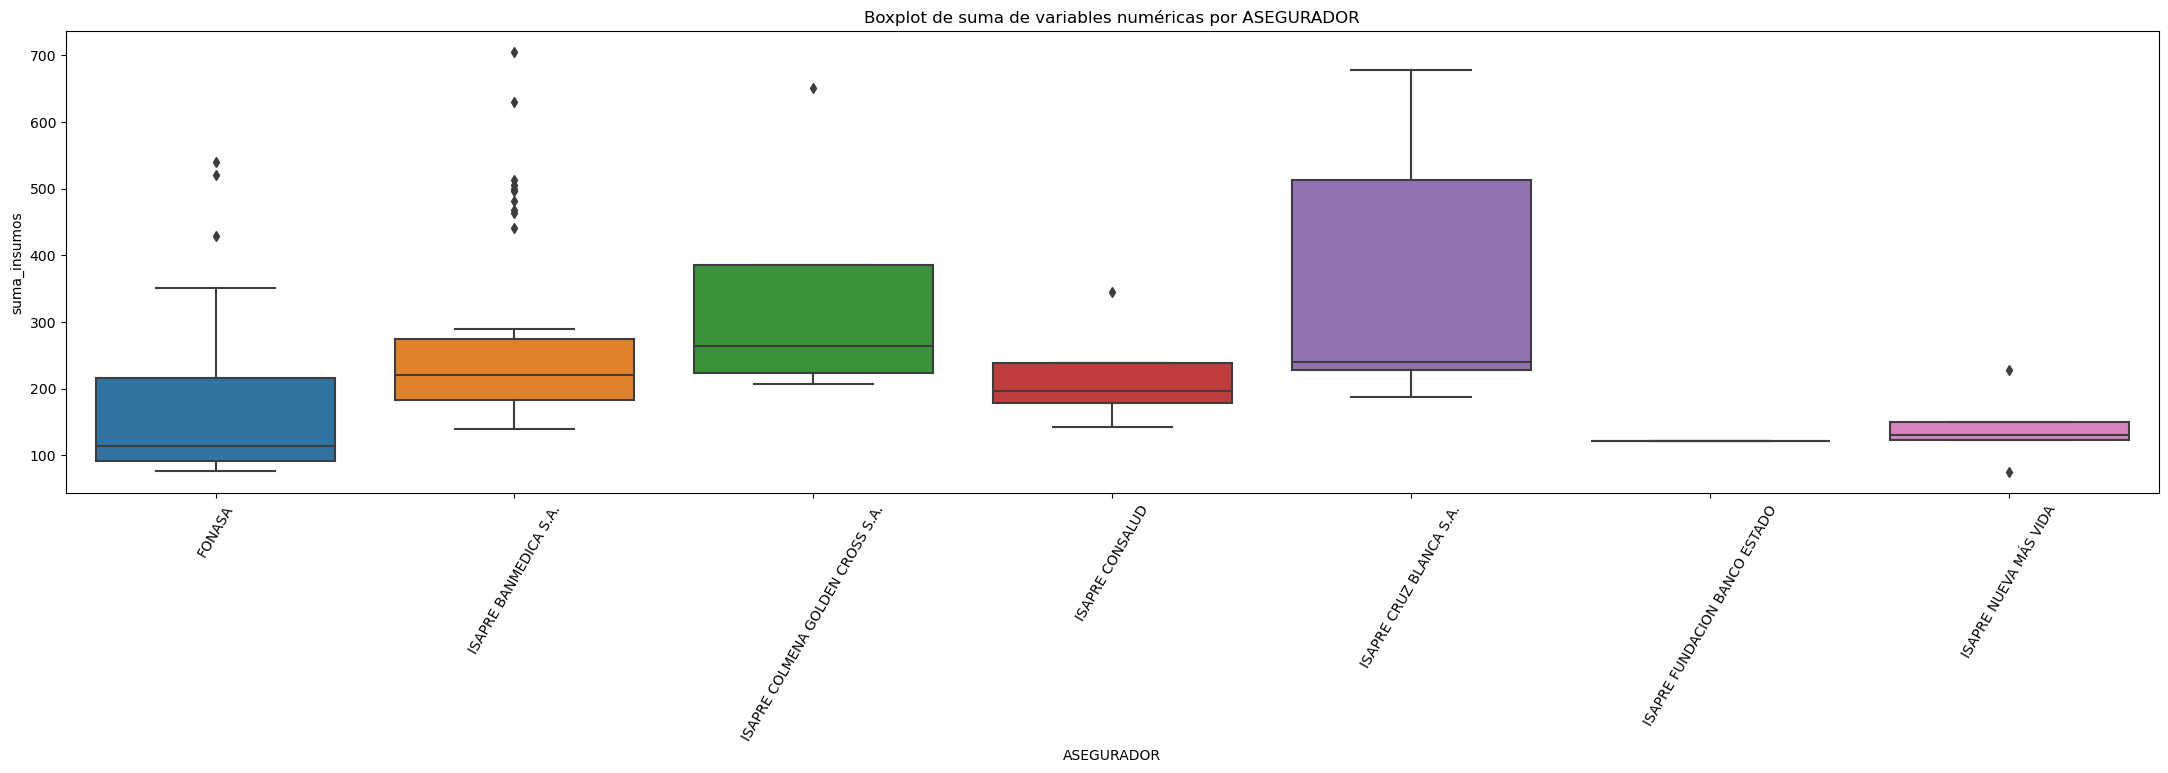

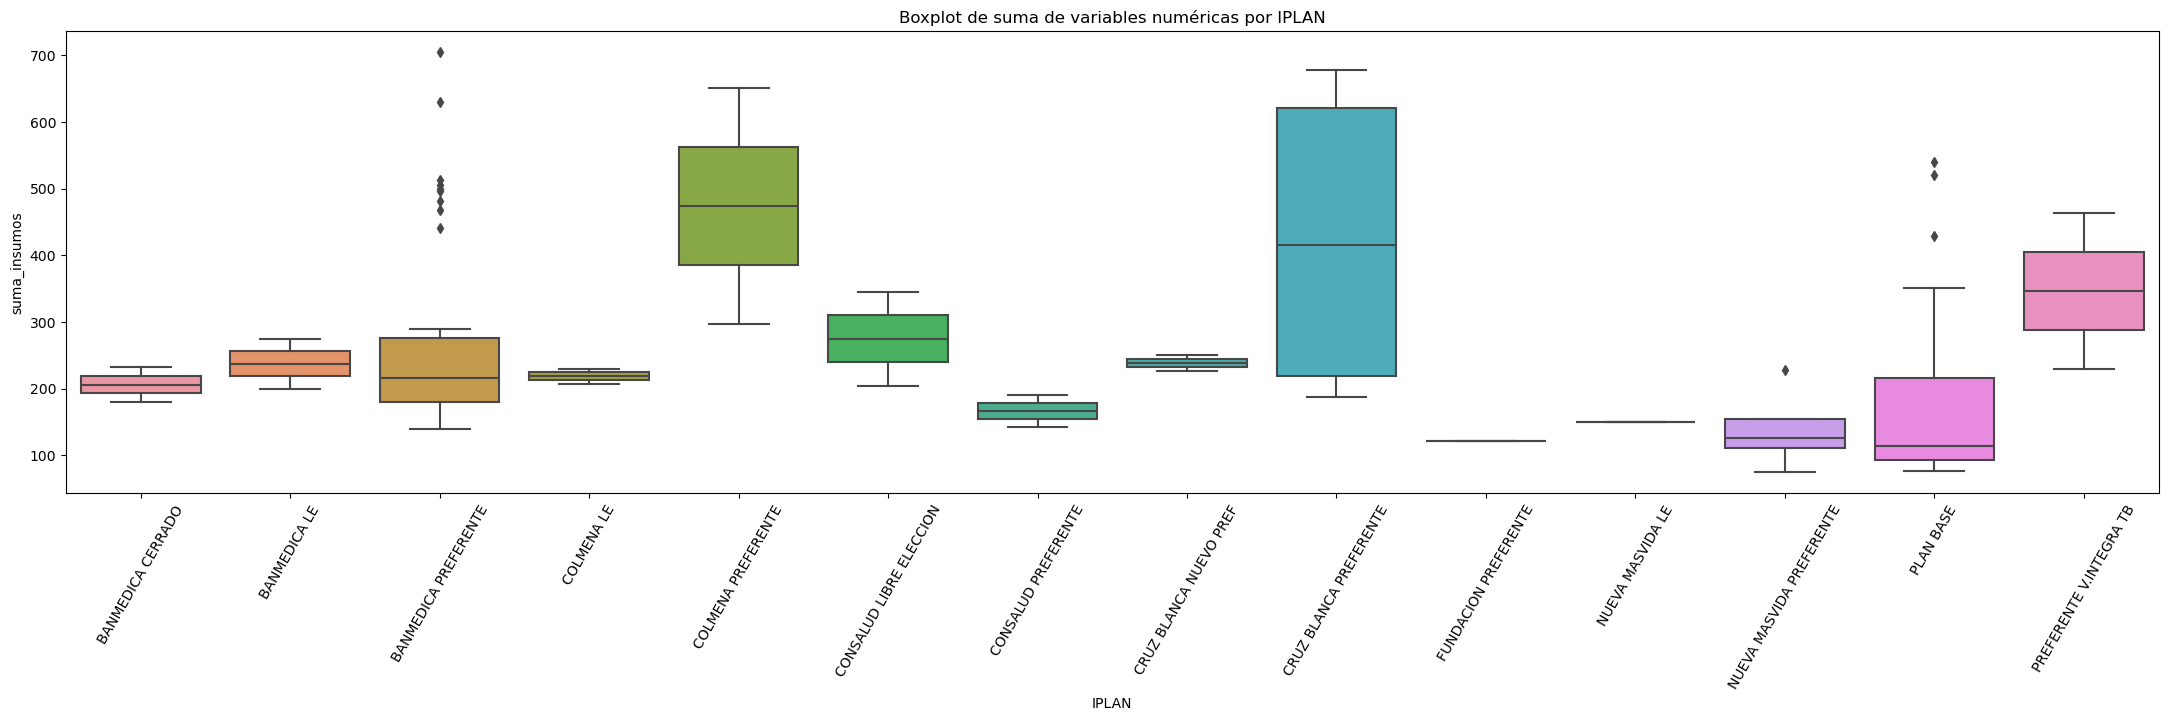

In [756]:
from scipy import stats
# df de manga gastrica
df = pd.read_csv("C:/Users/Ignacio/Tesis Ignacio/Cirugias tipo panel/Manga_Gastrica.csv", sep=';')

# Identificar las características categóricas y numéricas
categorical_features = ['INGRESO','AMB_HOSP', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO','EDAD','DURPAB']
numerical_features = [col for col in df.columns if col not in categorical_features]

# Asegurarse de que las variables categóricas son de tipo 'category'
for col in categorical_features:
    df[col] = df[col].astype('category')

# Sumar las variables numéricas por paciente
df['suma_insumos'] = df[numerical_features].sum(axis=1)

# Filtrar variables categóricas con al menos dos niveles
categorical_features_filtered = [cat for cat in categorical_features if len(df[cat].unique()) > 1]

# Realizar ANOVA
anova_results = {}
for cat in categorical_features_filtered:
    anova_results[cat] = stats.f_oneway(
        *[df['suma_insumos'][df[cat] == level] for level in df[cat].unique()]
    )

# Mostrar resultados del ANOVA
for cat, result in anova_results.items():
    print(f"ANOVA para {cat}: F={result.statistic}, p={result.pvalue}")

# Variables categóricas significativas = p-valor < 0.05
significant_vars = [cat for cat, result in anova_results.items() if result.pvalue < 0.05]

# Crear gráficos
for cat in significant_vars:
    plt.figure(figsize=(27, 6))
    sns.boxplot(x=cat, y='suma_insumos', data=df)
    plt.title(f'Boxplot de suma de variables numéricas por {cat}')
    plt.xticks(rotation=60)
    plt.show()

## Modelo Neuronal

In [864]:
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.model_selection import train_test_split
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.callbacks import EarlyStopping

# Cargar los datos
df = pd.read_csv("C:/Users/Ignacio/Tesis Ignacio/Cirugias tipo panel/Manga_Gastrica.csv", sep=';')

df.drop(columns=['INGRESO','STAFF'], inplace=True)
# Definir las variables categóricas y numéricas
categorical_features = ['AMB_HOSP', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO']
numerical_features = ['EDAD', 'DURPAB']

# Verificar y ajustar las columnas categóricas
categorical_features = [col for col in categorical_features if col in df.columns]

# Preprocesar las variables categóricas
for col in categorical_features:
    df[col] = df[col].astype('category')

# Separar las variables independientes (X) y dependientes (y)
X = df[categorical_features + numerical_features]
y = df.drop(columns=categorical_features + numerical_features)  # Todas las columnas restantes son las de los insumos

# Preprocesar los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar y transformar los datos de entrenamiento y prueba
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(202, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(101, activation='relu'))
#model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1], activation='linear'))  # Capa de salida con activación lineal para predecir cantidades de insumos

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=62, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f'MAE en conjunto de prueba: {mae}')

# Hacer predicciones
predicciones = model.predict(X_test)

# Mostrar algunas predicciones y sus valores reales
for i in range(2):
    print(f'Predicción: {predicciones[i]}, Real: {y_test.iloc[i].values}')

Epoch 1/62
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - loss: 49.2982 - mae: 1.3396 - val_loss: 33.7429 - val_mae: 1.1612
Epoch 2/62
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 44.7430 - mae: 1.2745 - val_loss: 33.6321 - val_mae: 1.1551
Epoch 3/62
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 45.2095 - mae: 1.2907 - val_loss: 33.5142 - val_mae: 1.1508
Epoch 4/62
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 42.4461 - mae: 1.2340 - val_loss: 33.3808 - val_mae: 1.1468
Epoch 5/62
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 49.9204 - mae: 1.3170 - val_loss: 33.2272 - val_mae: 1.1420
Epoch 6/62
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 48.2694 - mae: 1.2779 - val_loss: 33.0474 - val_mae: 1.1351
Epoch 7/62
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 44.0687 - mae: 1.2897 - val_loss: 32.8387 - val_mae: 1.1266
Epoch 8/62
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 48.1756 - mae: 1.2768 - val_loss: 32.5963 - val_mae: 1.1164
Epoch 9/62
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 42.612

In [868]:
#import tkinter as tk
#from tkinter import ttk


# Suponiendo que los insumos empiezan en la columna con índice 8
insumo_start_index = 8
nombres_insumos = df.columns[insumo_start_index:].tolist()

# Crear la GUI para seleccionar las características del nuevo paciente
class PatientInputForm:
    def __init__(self, master):
        self.master = master
        self.master.title("Seleccionar características del paciente")
        
        self.entries = {}
        for i, feature in enumerate(categorical_features + numerical_features):
            tk.Label(master, text=feature).grid(row=i, column=0)
            if feature in categorical_features:
                values = df[feature].unique().tolist()
                self.entries[feature] = ttk.Combobox(master, values=values)
            else:
                self.entries[feature] = tk.Entry(master)
            self.entries[feature].grid(row=i, column=1)
        
        self.submit_button = tk.Button(master, text="Predecir", command=self.submit)
        self.submit_button.grid(row=len(categorical_features + numerical_features), column=0, columnspan=2)
        
        self.result_label = tk.Label(master, text="")
        self.result_label.grid(row=len(categorical_features + numerical_features) + 1, column=0, columnspan=2)
        
    def submit(self):
        nuevo_paciente = {feature: self.entries[feature].get() for feature in categorical_features}
        for feature in numerical_features:
            nuevo_paciente[feature] = int(self.entries[feature].get())
        
        df_nuevo = pd.DataFrame([nuevo_paciente])
        for col in categorical_features:
            df_nuevo[col] = df_nuevo[col].astype('category')
        
        X_nuevo = df_nuevo[categorical_features + numerical_features]
        X_nuevo = preprocessor.transform(X_nuevo)
        prediccion_nuevo = model.predict(X_nuevo)
        
        resultados = {nombre: int(prediccion_nuevo[0][i]) for i, nombre in enumerate(nombres_insumos)}
        self.result_label.config(text=str(resultados))
        
        df_resultados = pd.DataFrame([resultados])
        df_resultados.to_csv('prediccion_insumos.csv', index=False, sep=';')
        print('Predicción guardada en el archivo: prediccion_insumos.csv')

# Inicializar la GUI
root = tk.Tk()
app = PatientInputForm(root)
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicción guardada en el archivo: prediccion_insumos.csv


In [866]:
#preguntas para modelo

nuevo_paciente = {
    'AMB_HOSP': 'HOSP',
    'ESPECIALIDAD_MEDICO': 'CIRUGIA ADULTO',
    'COMUNA': 'MAIPU',
    'ASEGURADOR': 'FONASA',
    'IPLAN': 'PLAN BASE',
    'Nombre_CIRUJANO': 'GAMBOA CESPEDES CRISTIAN',
    'EDAD': 45,
    'DURPAB': 65
}

# Convertir a df
df_nuevo = pd.DataFrame([nuevo_paciente])

# Aplicar preprocesamiento a los nuevos datos
X_nuevo = df_nuevo[categorical_features + numerical_features]  # Usar las mismas variables que se usaron en el modelo
X_nuevo = preprocessor.transform(X_nuevo)

# Hacer la predicción
prediccion_nuevo = model.predict(X_nuevo)

# Suponiendo que los insumos empiezan en la columna con índice 8 (columna 9)
insumo_start_index = 8

# Obtener los nombres de las columnas de insumos a partir del índice
nombres_insumos = df.columns[insumo_start_index:].tolist()

# Preparar los resultados
resultados = {
    nombre_insumo: int(prediccion_nuevo[0][i]) for i, nombre_insumo in enumerate(nombres_insumos)
}

# Convertir los resultados a un DataFrame
df_resultados = pd.DataFrame([resultados])

# Guardar los resultados en formato CSV
df_resultados.to_csv('prediccion_insumos.csv', index=False, sep=';')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


## Formato para disminuir dimensiones

In [479]:
#Prueba 1
#1 COLE
# Filtrar por df
# Filtrar y procesar los datos
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '18-02-081-00') & 
    (cruce_final['COD_CIRUGIAS'] == '18-02-081-00|-1|-1|-1')&
    (cruce_final['TIPO_CONSUMO'].isin(['PAB','PABELLON']))&
    (cruce_final['NOMBRE_GRUPO_ABA'] != ' ')
]

# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(
    ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
)['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=[
    'ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
cirugias_filtradas['cantidad_insumos'].replace("", np.nan, inplace=True) #pasando valores en blanco a na
cirugias_filtradas['cantidad_insumos'].fillna(0, inplace=True) #poniendo 0 en los valores na
# eliminar columnas innecesarias
cirugias_filtradas.drop(['ID_INGRESO','ELEC_URG','CODCIRUGIA', 'COD_CIRUGIAS',
                         'Cantidad_Cirugias', 'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO',
                         'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE_EMBALAJE', 'CANTIDAD','TIPO_CONSUMO'], axis=1, inplace=True)
#agrupar
cirugias_filtradas = cirugias_filtradas.groupby(
    ['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
     'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO','NOMBRE']
)['cantidad_insumos'].sum().reset_index()

# pivot tabla
tabla_pivote = cirugias_filtradas.pivot_table(
    index=['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
           'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO'],
    columns='NOMBRE', 
    values='cantidad_insumos',
    aggfunc='sum'
).reset_index()

tabla_pivote.fillna(0, inplace=True) #Poniendo valores na en 0

tabla_pivote.to_csv('Cole.csv', index=False, sep=';')

In [483]:
#2 Hernia
# Filtrar por df
# Filtrar y procesar los datos
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '18-02-001-00') & 
    (cruce_final['COD_CIRUGIAS'] == '18-02-001-00|-1|-1|-1')&
    (cruce_final['TIPO_CONSUMO'].isin(['PAB','PABELLON']))&
    (cruce_final['NOMBRE_GRUPO_ABA'] != ' ')
]

# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(
    ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
)['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=[
    'ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
cirugias_filtradas['cantidad_insumos'].replace("", np.nan, inplace=True) #pasando valores en blanco a na
cirugias_filtradas['cantidad_insumos'].fillna(0, inplace=True) #poniendo 0 en los valores na
# eliminar columnas innecesarias
cirugias_filtradas.drop(['ID_INGRESO','ELEC_URG','CODCIRUGIA', 'COD_CIRUGIAS',
                         'Cantidad_Cirugias', 'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO',
                         'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE_EMBALAJE', 'CANTIDAD','TIPO_CONSUMO'], axis=1, inplace=True)
#agrupar
cirugias_filtradas = cirugias_filtradas.groupby(
    ['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
     'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO','NOMBRE']
)['cantidad_insumos'].sum().reset_index()

# pivot tabla
tabla_pivote = cirugias_filtradas.pivot_table(
    index=['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
           'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO'],
    columns='NOMBRE', 
    values='cantidad_insumos',
    aggfunc='sum'
).reset_index()

tabla_pivote.fillna(0, inplace=True) #Poniendo valores na en 0

tabla_pivote.to_csv('Hernia.csv', index=False, sep=';')

In [485]:
#3 Vasectomia
# Filtrar por df
# Filtrar y procesar los datos
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '19-02-076-00') & 
    (cruce_final['COD_CIRUGIAS'] == '19-02-076-00|-1|-1|-1')&
    (cruce_final['TIPO_CONSUMO'].isin(['PAB','PABELLON']))&
    (cruce_final['NOMBRE_GRUPO_ABA'] != ' ')
]

# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(
    ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
)['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=[
    'ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
cirugias_filtradas['cantidad_insumos'].replace("", np.nan, inplace=True) #pasando valores en blanco a na
cirugias_filtradas['cantidad_insumos'].fillna(0, inplace=True) #poniendo 0 en los valores na
# eliminar columnas innecesarias
cirugias_filtradas.drop(['ID_INGRESO','ELEC_URG','CODCIRUGIA', 'COD_CIRUGIAS',
                         'Cantidad_Cirugias', 'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO',
                         'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE_EMBALAJE', 'CANTIDAD','TIPO_CONSUMO'], axis=1, inplace=True)
#agrupar
cirugias_filtradas = cirugias_filtradas.groupby(
    ['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
     'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO','NOMBRE']
)['cantidad_insumos'].sum().reset_index()

# pivot tabla
tabla_pivote = cirugias_filtradas.pivot_table(
    index=['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
           'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO'],
    columns='NOMBRE', 
    values='cantidad_insumos',
    aggfunc='sum'
).reset_index()

tabla_pivote.fillna(0, inplace=True) #Poniendo valores na en 0

tabla_pivote.to_csv('Vasectomia.csv', index=False, sep=';')

In [487]:
#4 Cesarea
# Filtrar por df
# Filtrar y procesar los datos
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '20-04-006-00') & 
    (cruce_final['COD_CIRUGIAS'] == '20-04-006-00|-1|-1|-1')&
    (cruce_final['TIPO_CONSUMO'].isin(['PAB','PABELLON']))&
    (cruce_final['NOMBRE_GRUPO_ABA'] != ' ')
]

# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(
    ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
)['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=[
    'ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
cirugias_filtradas['cantidad_insumos'].replace("", np.nan, inplace=True) #pasando valores en blanco a na
cirugias_filtradas['cantidad_insumos'].fillna(0, inplace=True) #poniendo 0 en los valores na
# eliminar columnas innecesarias
cirugias_filtradas.drop(['ID_INGRESO','ELEC_URG','CODCIRUGIA', 'COD_CIRUGIAS',
                         'Cantidad_Cirugias', 'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO',
                         'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE_EMBALAJE', 'CANTIDAD','TIPO_CONSUMO'], axis=1, inplace=True)
#agrupar
cirugias_filtradas = cirugias_filtradas.groupby(
    ['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
     'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO','NOMBRE']
)['cantidad_insumos'].sum().reset_index()

# pivot tabla
tabla_pivote = cirugias_filtradas.pivot_table(
    index=['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
           'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO'],
    columns='NOMBRE', 
    values='cantidad_insumos',
    aggfunc='sum'
).reset_index()

tabla_pivote.fillna(0, inplace=True) #Poniendo valores na en 0

tabla_pivote.to_csv('Cesarea.csv', index=False, sep=';')

In [489]:
#5 Amigdalectomia
# Filtrar por df
# Filtrar y procesar los datos
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '13-02-029-00') & 
    (cruce_final['COD_CIRUGIAS'] == '13-02-029-00|-1|-1|-1')&
    (cruce_final['TIPO_CONSUMO'].isin(['PAB','PABELLON']))&
    (cruce_final['NOMBRE_GRUPO_ABA'] != ' ')
]

# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(
    ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
)['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=[
    'ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
cirugias_filtradas['cantidad_insumos'].replace("", np.nan, inplace=True) #pasando valores en blanco a na
cirugias_filtradas['cantidad_insumos'].fillna(0, inplace=True) #poniendo 0 en los valores na
# eliminar columnas innecesarias
cirugias_filtradas.drop(['ID_INGRESO','ELEC_URG','CODCIRUGIA', 'COD_CIRUGIAS',
                         'Cantidad_Cirugias', 'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO',
                         'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE_EMBALAJE', 'CANTIDAD','TIPO_CONSUMO'], axis=1, inplace=True)
#agrupar
cirugias_filtradas = cirugias_filtradas.groupby(
    ['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
     'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO','NOMBRE']
)['cantidad_insumos'].sum().reset_index()

# pivot tabla
tabla_pivote = cirugias_filtradas.pivot_table(
    index=['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
           'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO'],
    columns='NOMBRE', 
    values='cantidad_insumos',
    aggfunc='sum'
).reset_index()

tabla_pivote.fillna(0, inplace=True) #Poniendo valores na en 0

tabla_pivote.to_csv('Amigdalectomia.csv', index=False, sep=';')

In [491]:
#6 Circuncision
# Filtrar por df
# Filtrar y procesar los datos
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '19-02-082-00') & 
    (cruce_final['COD_CIRUGIAS'] == '19-02-082-00|-1|-1|-1')&
    (cruce_final['TIPO_CONSUMO'].isin(['PAB','PABELLON']))&
    (cruce_final['NOMBRE_GRUPO_ABA'] != ' ')
]

# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(
    ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
)['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=[
    'ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
cirugias_filtradas['cantidad_insumos'].replace("", np.nan, inplace=True) #pasando valores en blanco a na
cirugias_filtradas['cantidad_insumos'].fillna(0, inplace=True) #poniendo 0 en los valores na
# eliminar columnas innecesarias
cirugias_filtradas.drop(['ID_INGRESO','ELEC_URG','CODCIRUGIA', 'COD_CIRUGIAS',
                         'Cantidad_Cirugias', 'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO',
                         'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE_EMBALAJE', 'CANTIDAD','TIPO_CONSUMO'], axis=1, inplace=True)
#agrupar
cirugias_filtradas = cirugias_filtradas.groupby(
    ['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
     'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO','NOMBRE']
)['cantidad_insumos'].sum().reset_index()

# pivot tabla
tabla_pivote = cirugias_filtradas.pivot_table(
    index=['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
           'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO'],
    columns='NOMBRE', 
    values='cantidad_insumos',
    aggfunc='sum'
).reset_index()

tabla_pivote.fillna(0, inplace=True) #Poniendo valores na en 0

tabla_pivote.to_csv('Circuncision.csv', index=False, sep=';')

In [493]:
#7 Meniscectomia
# Filtrar por df
# Filtrar y procesar los datos
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '21-04-159-00') & 
    (cruce_final['COD_CIRUGIAS'] == '21-04-159-00|-1|-1|-1')&
    (cruce_final['TIPO_CONSUMO'].isin(['PAB','PABELLON']))&
    (cruce_final['NOMBRE_GRUPO_ABA'] != ' ')
]

# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(
    ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
)['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=[
    'ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
cirugias_filtradas['cantidad_insumos'].replace("", np.nan, inplace=True) #pasando valores en blanco a na
cirugias_filtradas['cantidad_insumos'].fillna(0, inplace=True) #poniendo 0 en los valores na
# eliminar columnas innecesarias
cirugias_filtradas.drop(['ID_INGRESO','ELEC_URG','CODCIRUGIA', 'COD_CIRUGIAS',
                         'Cantidad_Cirugias', 'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO',
                         'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE_EMBALAJE', 'CANTIDAD','TIPO_CONSUMO'], axis=1, inplace=True)
#agrupar
cirugias_filtradas = cirugias_filtradas.groupby(
    ['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
     'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO','NOMBRE']
)['cantidad_insumos'].sum().reset_index()

# pivot tabla
tabla_pivote = cirugias_filtradas.pivot_table(
    index=['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
           'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO'],
    columns='NOMBRE', 
    values='cantidad_insumos',
    aggfunc='sum'
).reset_index()

tabla_pivote.fillna(0, inplace=True) #Poniendo valores na en 0

tabla_pivote.to_csv('Meniscectomia.csv', index=False, sep=';')

In [495]:
#8 Facoeresis
# Filtrar por df
# Filtrar y procesar los datos
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '12-02-064-00') & 
    (cruce_final['COD_CIRUGIAS'] == '12-02-064-00|-1|-1|-1')&
    (cruce_final['TIPO_CONSUMO'].isin(['PAB','PABELLON']))&
    (cruce_final['NOMBRE_GRUPO_ABA'] != ' ')
]

# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(
    ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
)['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=[
    'ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
cirugias_filtradas['cantidad_insumos'].replace("", np.nan, inplace=True) #pasando valores en blanco a na
cirugias_filtradas['cantidad_insumos'].fillna(0, inplace=True) #poniendo 0 en los valores na
# eliminar columnas innecesarias
cirugias_filtradas.drop(['ID_INGRESO','ELEC_URG','CODCIRUGIA', 'COD_CIRUGIAS',
                         'Cantidad_Cirugias', 'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO',
                         'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE_EMBALAJE', 'CANTIDAD','TIPO_CONSUMO'], axis=1, inplace=True)
#agrupar
cirugias_filtradas = cirugias_filtradas.groupby(
    ['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
     'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO','NOMBRE']
)['cantidad_insumos'].sum().reset_index()

# pivot tabla
tabla_pivote = cirugias_filtradas.pivot_table(
    index=['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
           'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO'],
    columns='NOMBRE', 
    values='cantidad_insumos',
    aggfunc='sum'
).reset_index()

tabla_pivote.fillna(0, inplace=True) #Poniendo valores na en 0

tabla_pivote.to_csv('Facoeresis.csv', index=False, sep=';')

In [497]:
#9 Rinoplastia
# Filtrar por df
# Filtrar y procesar los datos
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '13-50-053-00') & 
    (cruce_final['COD_CIRUGIAS'] == '13-50-053-00|-1|-1|-1')&
    (cruce_final['TIPO_CONSUMO'].isin(['PAB','PABELLON']))&
    (cruce_final['NOMBRE_GRUPO_ABA'] != ' ')
]

# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(
    ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
)['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=[
    'ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
cirugias_filtradas['cantidad_insumos'].replace("", np.nan, inplace=True) #pasando valores en blanco a na
cirugias_filtradas['cantidad_insumos'].fillna(0, inplace=True) #poniendo 0 en los valores na
# eliminar columnas innecesarias
cirugias_filtradas.drop(['ID_INGRESO','ELEC_URG','CODCIRUGIA', 'COD_CIRUGIAS',
                         'Cantidad_Cirugias', 'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO',
                         'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE_EMBALAJE', 'CANTIDAD','TIPO_CONSUMO'], axis=1, inplace=True)
#agrupar
cirugias_filtradas = cirugias_filtradas.groupby(
    ['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
     'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO','NOMBRE']
)['cantidad_insumos'].sum().reset_index()

# pivot tabla
tabla_pivote = cirugias_filtradas.pivot_table(
    index=['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
           'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO'],
    columns='NOMBRE', 
    values='cantidad_insumos',
    aggfunc='sum'
).reset_index()

tabla_pivote.fillna(0, inplace=True) #Poniendo valores na en 0

tabla_pivote.to_csv('Rinoplastia.csv', index=False, sep=';')

In [499]:
#10 Manga Gastrica
# Filtrar por df
# Filtrar y procesar los datos
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '18-50-006-00') & 
    (cruce_final['COD_CIRUGIAS'] == '18-50-006-00|-1|-1|-1')&
    (cruce_final['TIPO_CONSUMO'].isin(['PAB','PABELLON']))&
    (cruce_final['NOMBRE_GRUPO_ABA'] != ' ')
]

# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(
    ['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']
)['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=[
    'ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
cirugias_filtradas['cantidad_insumos'].replace("", np.nan, inplace=True) #pasando valores en blanco a na
cirugias_filtradas['cantidad_insumos'].fillna(0, inplace=True) #poniendo 0 en los valores na
# eliminar columnas innecesarias
cirugias_filtradas.drop(['ID_INGRESO','ELEC_URG','CODCIRUGIA', 'COD_CIRUGIAS',
                         'Cantidad_Cirugias', 'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO',
                         'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE_EMBALAJE', 'CANTIDAD','TIPO_CONSUMO'], axis=1, inplace=True)
#agrupar
cirugias_filtradas = cirugias_filtradas.groupby(
    ['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
     'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO','NOMBRE']
)['cantidad_insumos'].sum().reset_index()

# pivot tabla
tabla_pivote = cirugias_filtradas.pivot_table(
    index=['INGRESO', 'AMB_HOSP', 'DURPAB', 'STAFF', 'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 
           'ASEGURADOR', 'IPLAN', 'Nombre_CIRUJANO'],
    columns='NOMBRE', 
    values='cantidad_insumos',
    aggfunc='sum'
).reset_index()

tabla_pivote.fillna(0, inplace=True) #Poniendo valores na en 0

tabla_pivote.to_csv('Manga_Gastrica.csv', index=False, sep=';')

## Tablas Dinamicas Revisadas con Estadisticos

In [371]:
#1 COLE
# Filtrar por df
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '18-02-081-00') & 
    (cruce_final['COD_CIRUGIAS']=='18-02-081-00|-1|-1|-1')]
# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
# Contar la cantidad de pacientes por grupo
cantidad_pacientes = cirugias_filtradas.groupby(
    ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE']
)['ID_INGRESO'].nunique().reset_index(name='total_pacientes')
# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    sum_insumos='sum',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Merge para añadir el total de pacientes a las estadísticas
estadisticas = estadisticas.merge(cantidad_pacientes, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])
#promedio_insumo
estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / 925 #925 es el numero total de pacientes 'INGRESO'

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
from pivottablejs import pivot_ui
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_colecistectomia.html')


In [347]:
#2 HERNIA
# Filtrar por df
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '18-02-001-00') & 
    (cruce_final['COD_CIRUGIAS']=='18-02-001-00|-1|-1|-1')]
# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
# Contar la cantidad de pacientes por grupo
cantidad_pacientes = cirugias_filtradas.groupby(
    ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE']
)['ID_INGRESO'].nunique().reset_index(name='total_pacientes')
# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    sum_insumos='sum',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Merge para añadir el total de pacientes a las estadísticas
estadisticas = estadisticas.merge(cantidad_pacientes, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])
#promedio_insumo
estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / 401 #401 es el numero total de pacientes 'INGRESO'

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
from pivottablejs import pivot_ui
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_Hernia_Diafragmatica.html')


In [369]:
#3 Vasectomia
# Filtrar por df
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '19-02-076-00') & 
    (cruce_final['COD_CIRUGIAS']=='19-02-076-00|-1|-1|-1')]
# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
# Contar la cantidad de pacientes por grupo
cantidad_pacientes = cirugias_filtradas.groupby(
    ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE']
)['ID_INGRESO'].nunique().reset_index(name='total_pacientes')
# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    sum_insumos='sum',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Merge para añadir el total de pacientes a las estadísticas
estadisticas = estadisticas.merge(cantidad_pacientes, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])
#promedio_insumo
estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / 393 #393 es el numero total de pacientes 'INGRESO'

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
from pivottablejs import pivot_ui
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_Vasectomia.html')

In [353]:
#4 CESAREA
# Filtrar por df
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '20-04-006-00') & 
    (cruce_final['COD_CIRUGIAS']=='20-04-006-00|-1|-1|-1')]
# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
# Contar la cantidad de pacientes por grupo
cantidad_pacientes = cirugias_filtradas.groupby(
    ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE']
)['ID_INGRESO'].nunique().reset_index(name='total_pacientes')
# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    sum_insumos='sum',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Merge para añadir el total de pacientes a las estadísticas
estadisticas = estadisticas.merge(cantidad_pacientes, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])
#promedio_insumo
estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / 272 #272 es el numero total de pacientes 'INGRESO'

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
from pivottablejs import pivot_ui
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_Cesarea.html')

In [357]:
#5 Amigdalectomia
# Filtrar por df
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '13-02-029-00') & 
    (cruce_final['COD_CIRUGIAS']=='13-02-029-00|-1|-1|-1')]
# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
# Contar la cantidad de pacientes por grupo
cantidad_pacientes = cirugias_filtradas.groupby(
    ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE']
)['ID_INGRESO'].nunique().reset_index(name='total_pacientes')
# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    sum_insumos='sum',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Merge para añadir el total de pacientes a las estadísticas
estadisticas = estadisticas.merge(cantidad_pacientes, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])
#promedio_insumo
estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / 307 #307 es el numero total de pacientes 'INGRESO'

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
from pivottablejs import pivot_ui
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_Amigdalectomia.html')

In [359]:
#6 Circunsicion
# Filtrar por df
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '19-02-082-00') & 
    (cruce_final['COD_CIRUGIAS']=='19-02-082-00|-1|-1|-1')]
# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
# Contar la cantidad de pacientes por grupo
cantidad_pacientes = cirugias_filtradas.groupby(
    ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE']
)['ID_INGRESO'].nunique().reset_index(name='total_pacientes')
# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    sum_insumos='sum',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Merge para añadir el total de pacientes a las estadísticas
estadisticas = estadisticas.merge(cantidad_pacientes, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])
#promedio_insumo
estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / 279 #279 es el numero total de pacientes 'INGRESO'

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
from pivottablejs import pivot_ui
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_Circuncision.html')

In [361]:
#7 Meniscectomia
# Filtrar por df
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '21-04-159-00') & 
    (cruce_final['COD_CIRUGIAS']=='21-04-159-00|-1|-1|-1')]
# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
# Contar la cantidad de pacientes por grupo
cantidad_pacientes = cirugias_filtradas.groupby(
    ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE']
)['ID_INGRESO'].nunique().reset_index(name='total_pacientes')
# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    sum_insumos='sum',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Merge para añadir el total de pacientes a las estadísticas
estadisticas = estadisticas.merge(cantidad_pacientes, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])
#promedio_insumo
estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / 198 #198 es el numero total de pacientes 'INGRESO'

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
from pivottablejs import pivot_ui
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_Meniscectomia.html')

In [363]:
#8 Facoeresis
# Filtrar por df
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '12-02-064-00') & 
    (cruce_final['COD_CIRUGIAS']=='12-02-064-00|-1|-1|-1')]
# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
# Contar la cantidad de pacientes por grupo
cantidad_pacientes = cirugias_filtradas.groupby(
    ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE']
)['ID_INGRESO'].nunique().reset_index(name='total_pacientes')
# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    sum_insumos='sum',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Merge para añadir el total de pacientes a las estadísticas
estadisticas = estadisticas.merge(cantidad_pacientes, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])
#promedio_insumo
estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / 234 #234 es el numero total de pacientes 'INGRESO'

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
from pivottablejs import pivot_ui
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_Facoeresis.html')

In [365]:
#9 Rinoplastia
# Filtrar por df
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '13-50-053-00') & 
    (cruce_final['COD_CIRUGIAS']=='13-50-053-00|-1|-1|-1')]
# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
# Contar la cantidad de pacientes por grupo
cantidad_pacientes = cirugias_filtradas.groupby(
    ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE']
)['ID_INGRESO'].nunique().reset_index(name='total_pacientes')
# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    sum_insumos='sum',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Merge para añadir el total de pacientes a las estadísticas
estadisticas = estadisticas.merge(cantidad_pacientes, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])
#promedio_insumo
estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / 177 #177 es el numero total de pacientes 'INGRESO'

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
from pivottablejs import pivot_ui
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_Rinoplastia.html')

In [367]:
#10 Manga Gastrica
# Filtrar por df
cirugias_filtradas = cruce_final[
    (cruce_final['CODCIRUGIA'] == '18-50-006-00') & 
    (cruce_final['COD_CIRUGIAS']=='18-50-006-00|-1|-1|-1')]
# Sumar la cantidad de insumos por paciente y por insumo
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])['CANTIDAD'].sum().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])
# Contar la cantidad de pacientes por grupo
cantidad_pacientes = cirugias_filtradas.groupby(
    ['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE']
)['ID_INGRESO'].nunique().reset_index(name='total_pacientes')
# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    sum_insumos='sum',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Merge para añadir el total de pacientes a las estadísticas
estadisticas = estadisticas.merge(cantidad_pacientes, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])
#promedio_insumo
estadisticas['promedio_insumo'] = estadisticas['sum_insumos'] / 140 #140 es el numero total de pacientes 'INGRESO'

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
from pivottablejs import pivot_ui
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_Manga_Gastrica.html')

## Tablas Dinamicas Sin revisar:

In [279]:
#1 Colecistectomia:
#df codigo cirugia
codigos_cirugias = ['18-02-081-00|-1|-1|-1']

#filtrar por df
cirugias_filtradas = cruce_final[cruce_final['COD_CIRUGIAS'].isin(codigos_cirugias)]

#cantidad de insumos por paciente
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']).size().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])

# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE']) #PARA QUE LOS ESTADISTICOS SE HAGAN POR TIPO ELIMINAR 'NOMBRE'

# Crear la tabla dinámica usando pivottablejs
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_colecistectomia.html')


In [277]:
#2 hernia:
#df codigo cirugia
codigos_cirugias = ['18-02-001-00|-1|-1|-1']

#filtrar por df
cirugias_filtradas = cruce_final[cruce_final['COD_CIRUGIAS'].isin(codigos_cirugias)]

#cantidad de insumos por paciente
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']).size().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])

# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_hernia.html')


In [275]:
#3 vasectomia:
#df codigo cirugia
codigos_cirugias = ['19-02-076-00|-1|-1|-1']

#filtrar por df
cirugias_filtradas = cruce_final[cruce_final['COD_CIRUGIAS'].isin(codigos_cirugias)]

#cantidad de insumos por paciente
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']).size().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])

# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_vasectomia.html')


In [273]:
#4 cesarea:
#df codigo cirugia
codigos_cirugias = ['20-04-006-00|-1|-1|-1']

#filtrar por df
cirugias_filtradas = cruce_final[cruce_final['COD_CIRUGIAS'].isin(codigos_cirugias)]

#cantidad de insumos por paciente
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']).size().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])

# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_cesarea.html')


In [271]:
#5 amigdalectomia:
#df codigo cirugia
codigos_cirugias = ['13-02-029-00|-1|-1|-1']

#filtrar por df
cirugias_filtradas = cruce_final[cruce_final['COD_CIRUGIAS'].isin(codigos_cirugias)]

#cantidad de insumos por paciente
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']).size().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])

# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_amigdalectomia.html')


In [269]:
#6 circuncision:
#df codigo cirugia
codigos_cirugias = ['19-02-082-00|-1|-1|-1']

#filtrar por df
cirugias_filtradas = cruce_final[cruce_final['COD_CIRUGIAS'].isin(codigos_cirugias)]

#cantidad de insumos por paciente
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']).size().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])

# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_circuncision.html')


In [267]:
#7 meniscectomia:
#df codigo cirugia
codigos_cirugias = ['21-04-159-00|-1|-1|-1']

#filtrar por df
cirugias_filtradas = cruce_final[cruce_final['COD_CIRUGIAS'].isin(codigos_cirugias)]

#cantidad de insumos por paciente
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']).size().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])

# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_meniscectomia.html')


In [265]:
#8 facoeresis:
#df codigo cirugia
codigos_cirugias = ['12-02-064-00|-1|-1|-1']

#filtrar por df
cirugias_filtradas = cruce_final[cruce_final['COD_CIRUGIAS'].isin(codigos_cirugias)]

#cantidad de insumos por paciente
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']).size().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])

# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_facoeresis.html')


In [263]:
#9 rinoplastia:
#df codigo cirugia
codigos_cirugias = ['13-50-053-00|-1|-1|-1']

#filtrar por df
cirugias_filtradas = cruce_final[cruce_final['COD_CIRUGIAS'].isin(codigos_cirugias)]

#cantidad de insumos por paciente
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']).size().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])

# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_rinoplastia.html')


In [261]:
#10 manga gastrica:
#df codigo cirugia
codigos_cirugias = ['18-50-006-00|-1|-1|-1']

#filtrar por df
cirugias_filtradas = cruce_final[cruce_final['COD_CIRUGIAS'].isin(codigos_cirugias)]

#cantidad de insumos por paciente
cantidad_insumos_paciente = cirugias_filtradas.groupby(['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA']).size().reset_index(name='cantidad_insumos')

# Unir la cantidad de insumos de nuevo a cirugias_filtradas
cirugias_filtradas = cirugias_filtradas.merge(cantidad_insumos_paciente, on=['ID_INGRESO', 'Nombre_CIRUJANO', 'NOMBRE', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'CODCIRUGIA'])

# Calcular las estadísticas por cirugía a nivel de paciente
estadisticas = cantidad_insumos_paciente.groupby(['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])['cantidad_insumos'].agg(
    valor_minimo='min',
    valor_maximo='max',
    valor_promedio='mean',
    coeficiente_variacion=lambda x: (x.std() / x.mean()) if x.mean() != 0 else 0
).reset_index()

# Unir las estadísticas de nuevo al DataFrame
cirugias_filtradas = cirugias_filtradas.merge(estadisticas, on=['CODCIRUGIA', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA','NOMBRE'])

# Crear la tabla dinámica usando pivottablejs
pivot_ui(cirugias_filtradas, outfile_path='Estadisticos_manga_gastrica.html')


In [7]:
#Importar "COSTOS"

archivos = ['01-03 22.xlsx', '04-06 22.xlsx', '07-09 22.xlsx', '10-12 22.xlsx',
            '01-03 23.xlsx', '04-06 23.xlsx', '07-09 23.xlsx', '10-12 23.xlsx']

dataframes_concatenados = {}

for archivo in archivos:
    excel_file = pd.ExcelFile(archivo)
    hojas = excel_file.sheet_names[:-1]  # Excluir la última hoja
    dfs = []
    for hoja in hojas:
        df = pd.read_excel(excel_file, sheet_name=hoja)
        dfs.append(df)
    dataframes_concatenados[archivo] = pd.concat(dfs, ignore_index=True)
    excel_file.close()

tabla_final = pd.concat(dataframes_concatenados.values(), ignore_index=True)

In [4]:
#tabla_final.head(5) #Comprobacion de la consolidacion de los archivos

In [9]:
#Extraer Solo las Columnas deseadas:
columnas_deseadas1 = ["ID_INGRESO", "DV_ID_INGRESO", "DESC_ITEM", "ID_CONSUMO", 
                     "TIPO_CONSUMO", "NOMBRE_GRUPO_ABA", "NOMBRE_TIPO_ABA", 
                     "NOMBRE", "NOMBRE_EMBALAJE","CANTIDAD"]

# Seleccionar solo las columnas deseadas de tabla_final
Costos_Final = tabla_final.loc[:, columnas_deseadas1]


In [11]:
#Cruce entre los Dataframes de Consumos y Datos Pacientes de "Tratamiento de Datos"
Cruce_Final = pd.merge(Trat_Dat_Final, Costos_Final, on="ID_INGRESO", how="inner")

# Guardar el DataFrame como un archivo Excel
#Cruce_Final_Ex = "Cruce_Final_Ex.xlsx"
#Cruce_Final.to_excel(Cruce_Final_Ex, index=False) #NO SE PUDO POR EXCEDER EL NUMERO MAX DE FILAS (7.112.622, 22)

In [13]:
# Guarda el DataFrame como un archivo CSV

Cruce_Final_Ex = "Cruce_Final_Ex.csv"

Cruce_Final.to_csv(Cruce_Final_Ex, index=False)


In [15]:
print(Cruce_Final.columns)

Index(['INGRESO', 'ID_INGRESO', 'ELEC_URG', 'AMB_HOSP', 'DURPAB', 'STAFF',
       'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 'ASEGURADOR', 'IPLAN',
       'CODCIRUGIA', 'COD_CIRUGIAS', 'Nombre_CIRUJANO', 'Cantidad_Cirugias',
       'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO', 'TIPO_CONSUMO',
       'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE', 'NOMBRE_EMBALAJE',
       'CANTIDAD'],
      dtype='object')


In [3]:
# Sacando los datos de "Cruce_Final"para definir el top 10 de 'COD_CIRUGIAS' y su correspondiente promedio, min, max y devest de "DURPAB"

# Top 10 'COD_CIRUGIAS' más frecuentes
top_10_cirugias = Cruce_Final['COD_CIRUGIAS'].value_counts().head(10).sort_values(ascending=False)

# Filtro del DataFrame original para obtener solo las filas del top 10 cirugías más frecuentes
datos_top_10 = Cruce_Final[Cruce_Final['COD_CIRUGIAS'].isin(top_10_cirugias.index.tolist())]

# Promedio, mínimo, máximo, la desviación estándar y la frecuencia de 'DURPAB' para estas top 10 cirugías
top_10_stats = datos_top_10.groupby('COD_CIRUGIAS')['DURPAB'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index().sort_values(by='count', ascending=False)

# Cambiando el nombre de las columnas con sus respectivos estadisticos
top_10_stats.columns = ['COD_CIRUGIAS', 'Promedio_DURPAB', 'Min_DURPAB', 'Max_DURPAB', 'Desviacion_Estandar_DURPAB', 'Frecuencia']

# Guardado de resultados en un DataFrame 'Top_10_Cirugias'
Top_10_Cirugias = top_10_stats.copy()

# Mostramos el DataFrame para probarlo:
print(Top_10_Cirugias)


NameError: name 'Cruce_Final' is not defined

In [12]:
#Para una tabla bonita:

from tabulate import tabulate

print(tabulate(top_10_stats, headers='keys', tablefmt='pretty', showindex=False))



+-----------------------------------------------------+--------------------+------------+------------+----------------------------+------------+
|                    COD_CIRUGIAS                     |  Promedio_DURPAB   | Min_DURPAB | Max_DURPAB | Desviacion_Estandar_DURPAB | Frecuencia |
+-----------------------------------------------------+--------------------+------------+------------+----------------------------+------------+
|                17-50-061-00|-1|-1|-1                | 108.84615384615384 |     30     |    410     |     96.39973834074368      |   916110   |
|                11-03-042-00|-1|-1|-1                | 107.28312348009882 |     27     |    148     |      43.6025989405941      |   518537   |
|      11-03-011-00|11-03-015-00|11-03-005-00|-1      | 74.61538461538461  |     14     |    150     |     45.885440589743055     |   339456   |
|                18-02-081-00|-1|-1|-1                | 63.338527350192415 |     14     |    300     |     34.40996281088456      

In [7]:
#Ahora que ya tengo el cruce en "csv" para ahorrar tiempo:

import pandas as pd

cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Top 10 'COD_CIRUGIAS' más frecuentes
top_10_cirugias = cruce_final['COD_CIRUGIAS'].value_counts().head(10).sort_values(ascending=False)

# Filtro del DataFrame original para obtener solo las filas del top 10 cirugías más frecuentes
datos_top_10 = cruce_final[cruce_final['COD_CIRUGIAS'].isin(top_10_cirugias.index.tolist())]

# Promedio, mínimo, máximo, la desviación estándar y la frecuencia de 'DURPAB' para estas top 10 cirugías
top_10_stats = datos_top_10.groupby('COD_CIRUGIAS')['DURPAB'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index().sort_values(by='count', ascending=False)

# Cambiando el nombre de las columnas con sus respectivos estadísticos
top_10_stats.columns = ['COD_CIRUGIAS', 'Promedio_DURPAB', 'Min_DURPAB', 'Max_DURPAB', 'Desviacion_Estandar_DURPAB', 'Frecuencia']

# Guardado de resultados en un DataFrame 'Top_10_Cirugias'
top_10_cirugias_df = top_10_stats.copy()

# Mostramos el DataFrame para probarlo:
print(top_10_cirugias_df)


C:\Users\Ignacio\AppData\Local\Temp\ipykernel_7296\2709278494.py:5: DtypeWarning: Columns (12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  cruce_final = pd.read_csv("Cruce_Final_Ex.csv")


                                        COD_CIRUGIAS  Promedio_DURPAB  \
4                              17-50-061-00|-1|-1|-1       108.846154   
2                              11-03-042-00|-1|-1|-1       107.283123   
0          11-03-011-00|11-03-015-00|11-03-005-00|-1        74.615385   
8                              18-02-081-00|-1|-1|-1        63.338527   
3                    11-03-043-00|11-03-043-00|-1|-1       137.611225   
9                              18-50-004-00|-1|-1|-1        91.521344   
1                              11-03-026-00|-1|-1|-1       234.410905   
6  17-50-207-00|11-50-027-12|17-50-210-00|17-50-2...       102.222222   
7                              18-02-001-00|-1|-1|-1        62.899734   
5                              17-50-062-00|-1|-1|-1       165.750000   

   Min_DURPAB  Max_DURPAB  Desviacion_Estandar_DURPAB  Frecuencia  
4          30         410                   96.399738      916110  
2          27         148                   43.602599      5

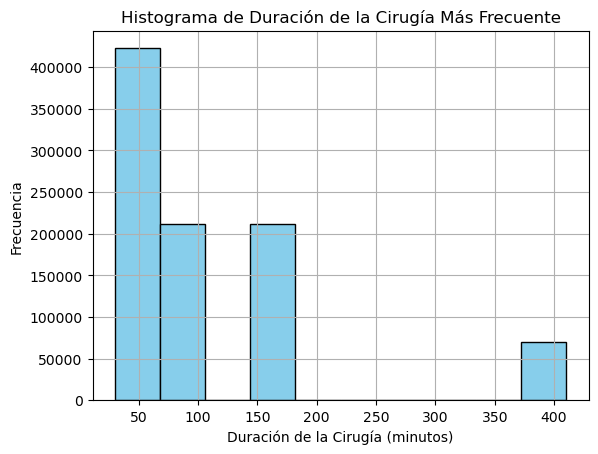

In [6]:
#Histograma del Top1 Cirugia:

# Filtrar el DataFrame para la cirugía más frecuente (top 1)
top_1_cirugia = top_10_stats.iloc[0]['COD_CIRUGIAS']
cirugia_mas_frecuente = cruce_final[cruce_final['COD_CIRUGIAS'] == top_1_cirugia]

# Crear el histograma de la duración de la cirugía más frecuente
plt.hist(cirugia_mas_frecuente['DURPAB'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Duración de la Cirugía (horas)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duración de la Cirugía Más Frecuente')
plt.grid(True)
plt.show()

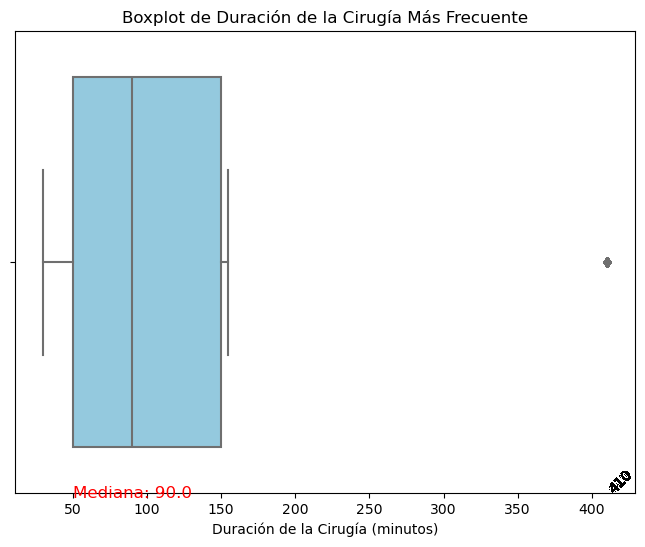

In [8]:
#Boxplot de la cirugia mas frecuente con respecto a su duracion en pabellon:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=cirugia_mas_frecuente['DURPAB'], color='skyblue')

# Rotulos outliers
outliers = cirugia_mas_frecuente['DURPAB'][cirugia_mas_frecuente['DURPAB'] > cirugia_mas_frecuente['DURPAB'].quantile(0.75) + 1.5 * (cirugia_mas_frecuente['DURPAB'].quantile(0.75) - cirugia_mas_frecuente['DURPAB'].quantile(0.25))] 
for outlier in outliers:
    plt.text(outlier, 0.5, f'{outlier}', rotation=45)

# Rotulos mediana
median = cirugia_mas_frecuente['DURPAB'].median()
plt.text(median, 0.5, f'Mediana: {median}', ha='center', va='center', color='red', fontsize=12)

plt.xlabel('Duración de la Cirugía (horas)')
plt.title('Boxplot de Duración de la Cirugía Más Frecuente')
plt.show()


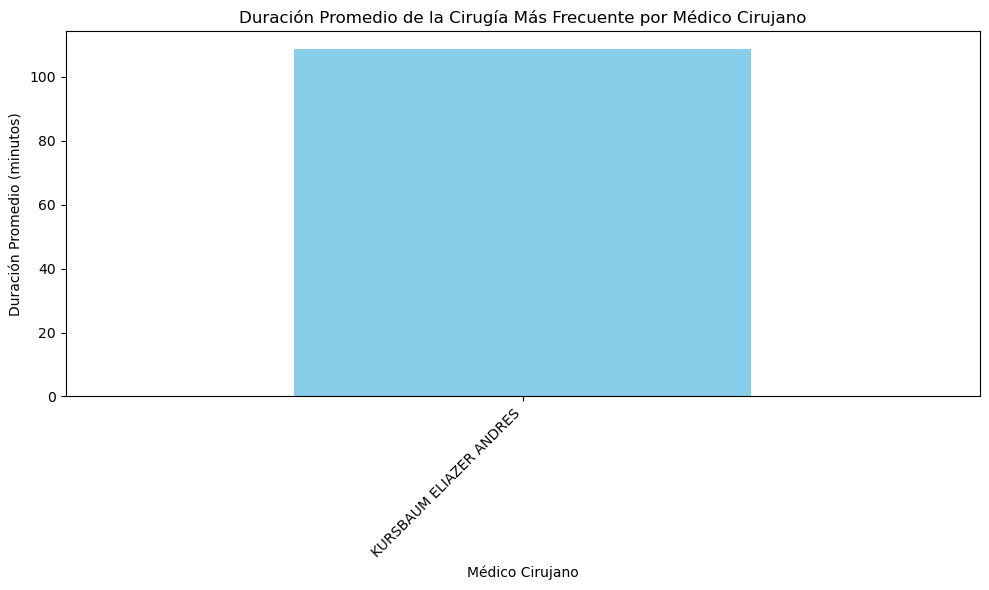

In [9]:
#Duracion promedio de cirugia por medico:
promedio_duración_por_medico = cirugia_mas_frecuente.groupby('Nombre_CIRUJANO')['DURPAB'].mean().sort_values(ascending=False)

# Tendencia de duración promedio de la cirugía para cada médico.
plt.figure(figsize=(10, 6))
promedio_duración_por_medico.plot(kind='bar', color='skyblue')
plt.title('Duración Promedio de la Cirugía Más Frecuente por Médico Cirujano')
plt.xlabel('Médico Cirujano')
plt.ylabel('Duración Promedio (horas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [13]:
cirugia_mas_frecuente.head()

INGRESO  ID_INGRESO ELEC_URG AMB_HOSP  DURPAB STAFF  \
1221541  1096872-0     1096872     ELEC     HOSP      30     S   
1221542  1096872-0     1096872     ELEC     HOSP      30     S   
1221543  1096872-0     1096872     ELEC     HOSP      30     S   
1221544  1096872-0     1096872     ELEC     HOSP      30     S   
1221545  1096872-0     1096872     ELEC     HOSP      30     S   

        ESPECIALIDAD_MEDICO    COMUNA  EDAD       ASEGURADOR         IPLAN  \
1221541       CIRUGIA TORAX  CONCHALI    50  ISAPRE CONSALUD  CONSALUD GES   
1221542       CIRUGIA TORAX  CONCHALI    50  ISAPRE CONSALUD  CONSALUD GES   
1221543       CIRUGIA TORAX  CONCHALI    50  ISAPRE CONSALUD  CONSALUD GES   
1221544       CIRUGIA TORAX  CONCHALI    50  ISAPRE CONSALUD  CONSALUD GES   
1221545       CIRUGIA TORAX  CONCHALI    50  ISAPRE CONSALUD  CONSALUD GES   

           CODCIRUGIA           COD_CIRUGIAS          Nombre_CIRUJANO  \
1221541  13-02-072-00  17-50-061-00|-1|-1|-1  KURSBAUM ELIAZER ANDRES   
1221542  13-02-072-00  17-50-061-00|-1|-1|-1  KURSBAUM ELIAZER ANDRES   
1221543  13-02-072-00  17-50-061-00|-1|-1|-1  KURSBAUM ELIAZER ANDRES   
1221544  13-02-072-00  17-50-061-00|-1|-1|-1  KURSBAUM ELIAZER ANDRES   
1221545  13-02-072-00  17-50-061-00|-1|-1|-1  KURSBAUM ELIAZER ANDRES   

         Cantidad_Cirugias DV_ID_INGRESO          DESC_ITEM   ID_CONSUMO  \
1221541                  1             0  CENTROS DE COSTOS          NaN   
1221542                  1             0  PABELLÓN CENTRAL   377704738.0   
1221543                  1             0  PABELLÓN CENTRAL           NaN   
1221544                  1             0  PABELLÓN CENTRAL           NaN   
1221545                  1             0      BANCO SANGRE   377684978.0   

        TIPO_CONSUMO NOMBRE_GRUPO_ABA NOMBRE_TIPO_ABA  \
1221541          NaN                                    
1221542      INSUMOS                                    
1221543      INSUMOS                                    
1221544      INSUMOS                                    
1221545          EXA                                    

                                           NOMBRE NOMBRE_EMBALAJE  
1221541                                                            
1221542                         PACK EPP PABELLON                  
1221543                                                            
1221544                                                            
1221545  ISOINMUNIZACION, INVESTIGACION DE. (PROC

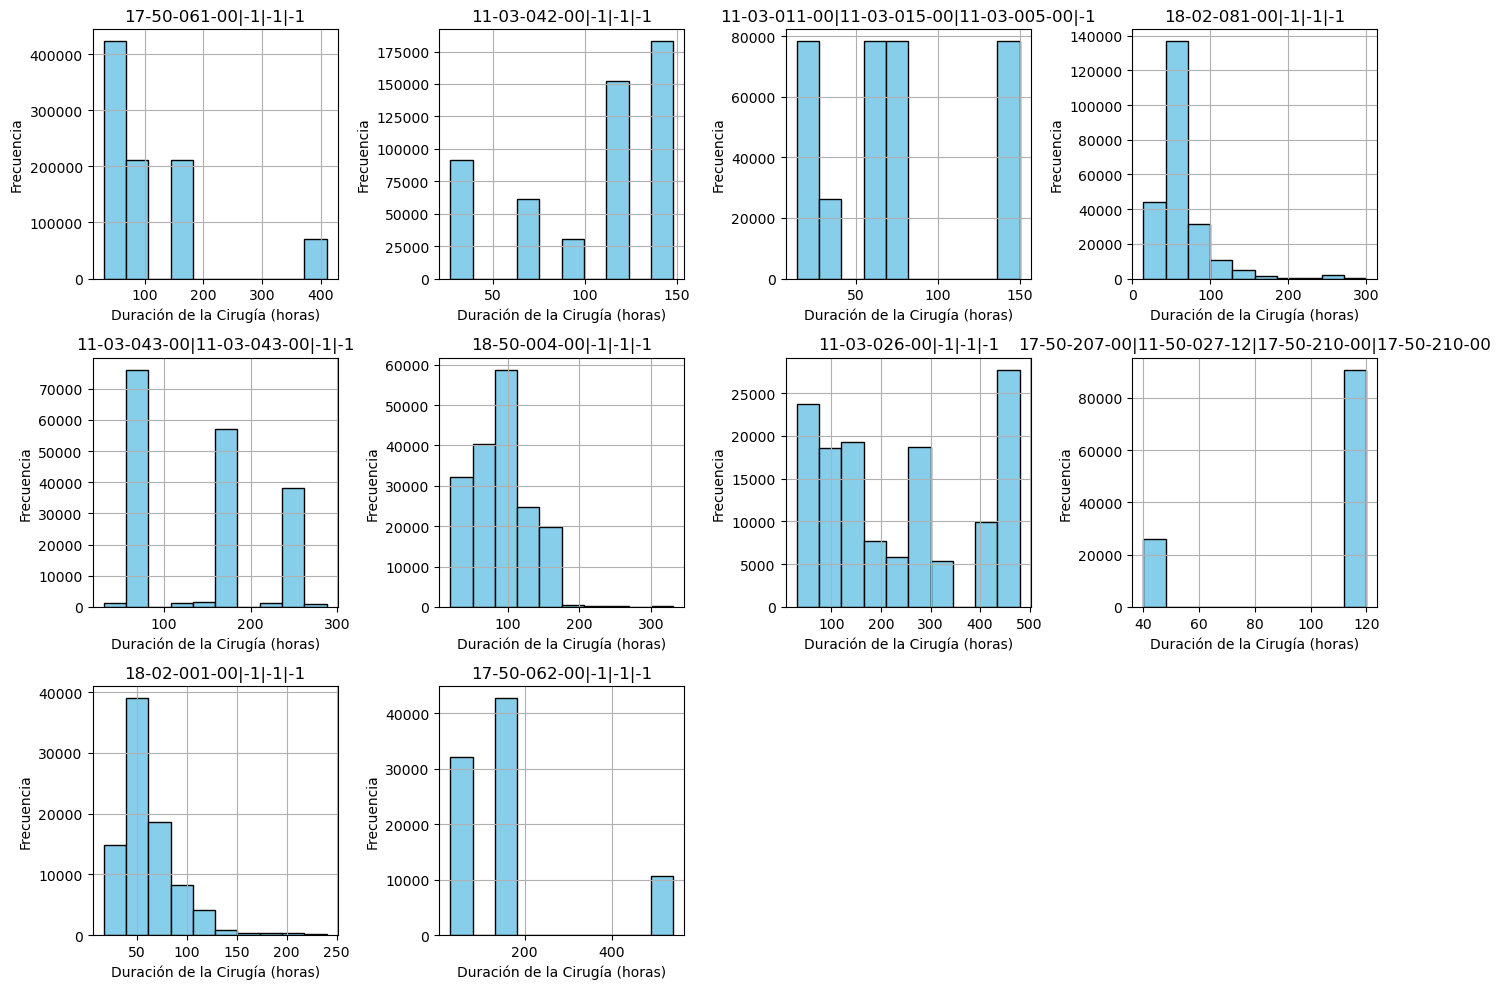

In [23]:
#Lo mismo para el top10 cirugias:
top_10_cirugias = top_10_stats['COD_CIRUGIAS']

#cirugías top10:
cirugias_mas_frecuentes = cruce_final[cruce_final['COD_CIRUGIAS'].isin(top_10_cirugias)]

# Crear histogramas para cada cirugía más frecuente en el top 10:
plt.figure(figsize=(14, 10))
for i, cirugia in enumerate(top_10_cirugias):
    plt.subplot(3, 4, i + 1)
    datos_cirugia = cirugias_mas_frecuentes[cirugias_mas_frecuentes['COD_CIRUGIAS'] == cirugia]
    plt.hist(datos_cirugia['DURPAB'], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel('Duración de la Cirugía (horas)')
    plt.ylabel('Frecuencia')
    plt.title(f'{cirugia}')
    plt.grid(True)

plt.tight_layout()
plt.show()

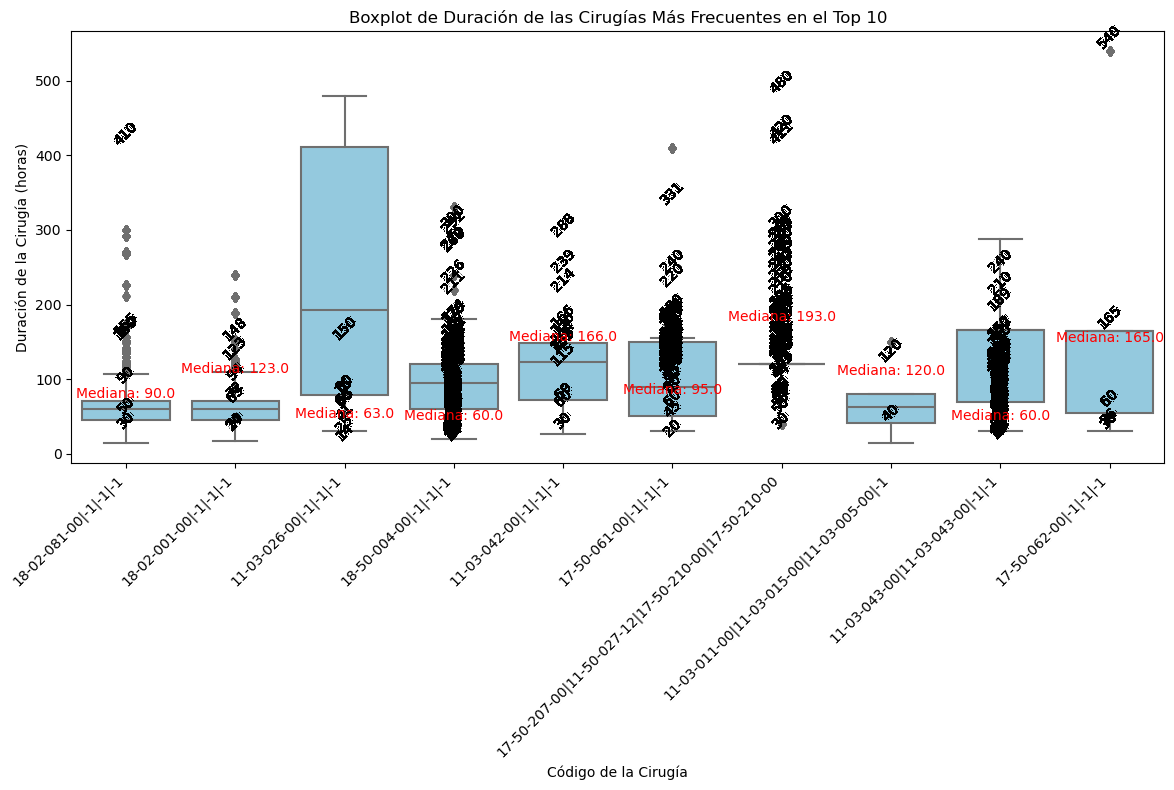

In [24]:
# Boxplot 10 cirugías más frecuentes:
plt.figure(figsize=(12, 8))
sns.boxplot(x='COD_CIRUGIAS', y='DURPAB', data=cirugias_mas_frecuentes, color='skyblue')

# Añadir etiquetas a los outliers
for i in range(len(top_10_cirugias)):
    cod_cirugia = top_10_cirugias.iloc[i]
    outliers = cirugias_mas_frecuentes.loc[cirugias_mas_frecuentes['COD_CIRUGIAS'] == cod_cirugia, 'DURPAB']
    for outlier in outliers:
        plt.text(i, outlier, f'{outlier}', ha='center', va='bottom', rotation=45)

# Añadir etiqueta de la mediana
for i, cod_cirugia in enumerate(top_10_cirugias):
    median = cirugias_mas_frecuentes.loc[cirugias_mas_frecuentes['COD_CIRUGIAS'] == cod_cirugia, 'DURPAB'].median()
    plt.text(i, median, f'Mediana: {median}', ha='center', va='top', color='red', fontsize=10)

# Configurar ejes y título
plt.xlabel('Código de la Cirugía')
plt.ylabel('Duración de la Cirugía (horas)')
plt.title('Boxplot de Duración de las Cirugías Más Frecuentes en el Top 10')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el boxplot
plt.tight_layout()
plt.show()


In [9]:
#!pip install pivottablejs
from pivottablejs import pivot_ui

#el limite de procesamiento ~10.000 filas:
top5000_cirugias = cruce_final[['ID_INGRESO', 'NOMBRE', 'COD_CIRUGIAS', 'TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']].value_counts().head(5000).sort_values(ascending=False)

# Crear tabla dinámica con filtros interactivos
pivot_ui(top5000_cirugias, 
         rows=['ID_INGRESO'], 
         cols=['NOMBRE'], 
         aggregatorName='Count', 
         rendererName='Table', 
         rowOrder='value_z_to_a',
         colOrder='value_z_to_a',
#        filter=['TIPO_CONSUMO', 'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'Nombre_CIRUJANO', 'ESPECIALIDAD_MEDICO', 'STAFF', 'ASEGURADOR']
        )


In [67]:
print(top1000_cirugias.shape)

(1000,)
